


# Exploring Data Analysis with Python: CUF Thesis
## 2017-2020


#### Made by:
* Teresa Marcelino (teresamarcelino98@gmail.com)

## Table of Contents

* [1. Imports](#1)
* [2. Reading the Data](#2)


* [Tranformations](#300)
    * [Some Tranformations](#300)
    * [More Tranformations- Second part](#301)


* [3. Reading Complement Datasets](#3)
    * [3.1. TOM Codes](#3.1)
    * [3.2. Diagnostic](#3.2)

* [4. Explore data in the DataFrame](#4)
    * [4.1. N_REG_OPER](#4.1)
    * [4.2. FLG_AMB_INT](#4.2)
    * [4.3. Anesthesia](#4.3)
    * [4.4. FLG_PROG_URG](#4.4)
* [5. Patients Information](#5)
    * [5.1. Gender](#5.1)
    * [5.2. Number of surgeries per patient](#5.2)
    * [5.3. Ages](#5.3)
* [6. Procedures](#6)
    * [6.1. Analyze of each procedure](#6.1)
    * [6.2. Check if all procedures are present in TOM codes documents](#6.2)
    * [6.3. Create a column with the number of procedures in each surgery](#6.3)
* [7. Doctors Information](#7)
    * [7.1. Number of doctors working in each department](#7.1)
    * [7.2. Professionals and the number of Units where they work](#7.2)
    * [7.3. Professionals and Number of services where they work](#7.3)
    * [7.4. Variation between doctors inside each type of surgery](#7.4)
* [8. Units Information](#8)
    * [8.1. Number of Units](#8.1)
    * [8.2. Number of blocks and rooms in each unit](#8.2)
    * [8.3. Services distribution per unit](#8.3)
* [9. Services Information](#9)
    * [9.1. Services distribution](#9.1)
    * [9.2. General overview for each service](#9.2)
* [10. Time Series Analysis](#10)
    * [10.1. Week day distribution](#10.1)
    * [10.2. Month distribution](#10.2)
    * [10.3. Daily distribution ](#10.3)
* [11. Procedures-part 2](#11)
    * [11.add. Distribution of performed surgeries by procedures](#11.add)
    * [11.1. Distribution of performed surgeries by procedures](#11.1)
    * [11.2. Probability of a second procedure knowing the first](#11.2)
        * [11.2.1 Some calculations with probabilities](#11.2.1)
    * [11.3. Probability of a third procedure knowing the second one](#11.3)
    * [11.4. Probability of a fourth procedure knowing the third one](#11.4)
    * [11.5. How many surgeries each doctor have with a specific procedure?](#11.5)
* [12. Analyses of some columns](#12)
    * [12.1. Real Time Recovery Room](#12.1)
    * [12.2. OR Real Time](#12.2)
    * [12.3. Expected Time (Planned) ](#12.3)
    * [12.4. Expected Time  vs Real Time (OR per service)](#12.4)
    * [12.5. Variation in usage of operating room based on gender ](#12.5)
    * [12.6. Variation in usage of operating room based on age  ](#12.6)
* [13. Spearman Correlation Matrix](#13)
    * [13.1. Update Metric and Non-Metric Variables](#13.1)
    * [13.2. General Heat Map](#13.2)
    * [13.3. Heat Map for a particular surgery - Ophthalmology ](#13.3)
* [14. Time Series Analysis - Graphs](#14)
    * [14.1. Time Series in 2019 - General Overview ](#14.1)
    * [14.2. Time Series in 2019 - In a specific Unit](#14.2)
* [15. Gaussian Mixture Model](#15)
    * [15.1. Clean data to introduce in Gaussian Mixture](#15.1)
    * [15.2. Take a  Sample](#15.2)
    * [15.3. Gaussian Mixture Model ](#15.3)
* [16. Fb-prophet - Forecast](#16)
    * [16.1. General Forecasting](#16.1)
    * [16.2. General Forecasting -remove all the weekends from our data](#16.2)
    * [16.3. Forecasting including an Exceptional season (Covid)](#16.3)
* [17. Distribution of predicting error](#17)
* [18. Visualise Data Distribution](#18)
    * [18.1. Distribution of the error with month](#18.1)
    * [18.2. Distribution of the error with Service](#18.2)
    * [18.3. Distribution of the error with year](#18.3)
    * [18.4. Distribution of the OR usage with month and year in a specific service (ORTOPEDIA)](#18.4)
* [19. PYCARET](#19)
    * [19.1. Data Load](#19.1)


    
    
 


    
    





    


# 1. Imports <a class="anchor" id="1"></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns
import math


#book
import thinkplot
import thinkstats2#Representing histograms with Think Stats Book


#times
from datetime import datetime
from dateutil.relativedelta import relativedelta
#from pandas_profiling import ProfileReport 


#Gaussian mixtures
from sklearn.mixture import GaussianMixture as GMM
from pandas import DataFrame 
from sklearn import datasets 

#Time Analysis


import itertools
import plotly.offline as pyoff
import plotly.graph_objs as go
from sklearn import preprocessing
from scipy.stats import boxcox
from scipy.special import inv_boxcox
pd.set_option('display.max_row', 1000)

#Visualize Data Distributions
from joypy import joyplot
from pandas.api.types import CategoricalDtype




# 2. Reading the Data <a class="anchor" id="2"></a>

In [ ]:
df_cuf_2017 = pd.read_excel('data_2017.xls',header='infer')
df_cuf_2018 = pd.read_excel('data_2018.xls',header='infer')
df_cuf_2019 = pd.read_excel('data_2019.xls',header='infer')
df_cuf_2020 = pd.read_excel('data_2020.xls',header='infer')

df_cuf = pd.DataFrame()

df_cuf = df_cuf.append(df_cuf_2017,ignore_index=True)
df_cuf = df_cuf.append(df_cuf_2018,ignore_index=True)
df_cuf = df_cuf.append(df_cuf_2019,ignore_index=True)
df_cuf = df_cuf.append(df_cuf_2020,ignore_index=True)

df_cuf_TOM = pd.read_excel('CódigosTOM.xls',header='infer') 

In [ ]:
df_cuf_diagnostic = pd.read_excel('diagnosticos_20172020.xls',header='infer') 

Number of data provided in 2019

In [ ]:
df_cuf.shape #shape of data, columns and rows

Type of data for each column provided in 2019

In [ ]:
# check df data types:
df_cuf.dtypes

In [6]:
df_cuf['DOENTE_LOCAL'].value_counts()

6857740    21
2268830    16
1826415    15
2680690    15
5753285    13
           ..
5012545     1
5360790     1
3265685     1
7323165     1
1326520     1
Name: DOENTE_LOCAL, Length: 149063, dtype: int64

In [7]:
#convert to category type
df_cuf['DESCR_SERVICO'] = df_cuf['DESCR_SERVICO'].astype("category")

df_cuf['DT_OPER']=pd.to_datetime(df_cuf['DT_OPER'])
df_cuf['HR_FIM_RECOBRO']=pd.to_datetime(df_cuf['HR_FIM_RECOBRO']) #conversion to datatime
df_cuf['HR_INI_RECOBRO']=pd.to_datetime(df_cuf['HR_INI_RECOBRO']) #conversion to datatime
df_cuf['HR_ENTRADA_SALA']=pd.to_datetime(df_cuf['HR_ENTRADA_SALA']) #conversion to datatime
df_cuf['HR_SAIDA_SALA']=pd.to_datetime(df_cuf['HR_SAIDA_SALA']) #conversion to datatime


df_cuf['HR_INI_INDUCAO_ANES']=pd.to_datetime(df_cuf['HR_INI_INDUCAO_ANES']) #conversion to datatime
df_cuf['HR_INI_CIRURGIA']=pd.to_datetime(df_cuf['HR_INI_CIRURGIA']) #conversion to datatime
df_cuf['HR_FIM_CIRURGIA']=pd.to_datetime(df_cuf['HR_FIM_CIRURGIA']) #conversion to datatime
df_cuf['HR_FIM_INDUCAO_ANEST']=pd.to_datetime(df_cuf['HR_FIM_INDUCAO_ANEST']) #conversion to datatime

In [8]:
# checking descriptive statistics:
df_cuf.describe().T

count          mean           std        min  \
COD_UNIDADE        191046.0  1.426114e+01  2.114384e+00        2.0   
N_REG_OPER         191046.0  1.627668e+05  7.904820e+04    30685.0   
DOENTE_LOCAL       191046.0  3.497232e+06  2.199863e+06       45.0   
DOENTE_UNICO       190177.0  1.812800e+08  1.472273e+08     2010.0   
I1                 191046.0  3.731933e+07  8.476454e+06        1.0   
I2                  73304.0  3.553226e+07  7.403802e+06  2000015.0   
I3                  25588.0  3.489843e+07  8.767012e+06  2000015.0   
I4                   9402.0  3.538420e+07  8.583637e+06  2000015.0   
I5                   3208.0  3.512590e+07  8.612627e+06  6000015.0   
I6                   1722.0  3.273619e+07  1.273090e+07  6000016.0   
DUR_SALA_REAL      191046.0  8.151671e+01  6.169092e+01       10.0   
DUR_CIRURGIA_REAL  186044.0  5.530327e+01  5.109823e+01        0.0   

                           25%          50%           75%          max  
COD_UNIDADE              13.00         14.0  1.500000e+01         21.0  
N_REG_OPER            90973.50     162792.5  2.321728e+05     305297.0  
DOENTE_LOCAL        1653691.25    3108015.0  5.146635e+06    8796945.0  
DOENTE_UNICO       70828505.00  163269030.0  2.337010e+08  732233505.0  
I1                 33060215.00   39040004.0  4.204000e+07  300000082.0  
I2                 33040103.00   34000007.0  3.915001e+07  300000082.0  
I3                 33030149.75   33100212.0  3.904000e+07  300000082.0  
I4                 33030150.00   33100217.0  3.507010e+07   66050003.0  
I5                 33030150.00   33100217.0  3.507010e+07   66050003.0  
I6                 33030116.00   33100208.0  3.501022e+07   66050003.0  
DUR_SALA_REAL            39.00         66.0  1.050000e+02       1144.0  
DUR_CIRURGIA_REAL        21.00         40.0  7.200000e+01       1134.0

In [9]:
df_cuf.head()

COD_UNIDADE   DESCR_SERVICO  N_REG_OPER      MEDICO  DOENTE_LOCAL  \
0           11  CIRURGIA GERAL       57172  |132273102        508345   
1           11    OFTALMOLOGIA       59413  |093935231        510545   
2           11        UROLOGIA       56967  |775653212        510545   
3           11        UROLOGIA       58039  |462002202        510545   
4           11        UROLOGIA       58735  |462002202        510545   

   DOENTE_UNICO SEXO DT_NASCIMENTO    DT_OPER BLOCO  ... HR_INI_INDUCAO_ANES  \
0     7821535.0    M    1952-02-11 2017-04-18   BOC  ... 2017-04-18 14:34:00   
1     4597035.0    M    1946-03-31 2017-07-26   BOC  ... 2017-07-26 10:20:00   
2     4597035.0    M    1946-03-31 2017-04-06   BOC  ... 2017-04-06 12:02:00   
3     4597035.0    M    1946-03-31 2017-05-22   BOC  ... 2017-05-22 18:16:00   
4     4597035.0    M    1946-03-31 2017-06-26   BOC  ... 2017-06-26 17:53:00   

      HR_INI_CIRURGIA     HR_FIM_CIRURGIA HR_FIM_INDUCAO_ANEST  \
0 2017-04-18 14:42:00 2017-04-18 15:11:00  2017-04-18 15:11:00   
1 2017-07-26 10:24:00 2017-07-26 10:48:00  2017-07-26 10:48:00   
2 2017-04-06 12:07:00 2017-04-06 12:25:00  2017-04-06 12:25:00   
3 2017-05-22 18:20:00 2017-05-22 19:07:00  2017-05-22 19:07:00   
4 2017-06-26 17:55:00 2017-06-26 18:01:00  2017-06-26 18:01:00   

        HR_SAIDA_SALA      HR_INI_RECOBRO      HR_FIM_RECOBRO  DUR_SALA_REAL  \
0 2017-04-18 15:11:00 2017-04-18 15:26:00                 NaT             41   
1 2017-07-26 10:48:00 2017-07-26 11:06:00                 NaT             32   
2 2017-04-06 12:27:00 2017-04-06 12:37:00                 NaT             27   
3 2017-05-22 19:07:00 2017-05-22 19:16:00 2017-05-22 21:30:00             55   
4 2017-06-26 18:02:00 2017-06-26 18:17:00 2017-06-26 19:54:00             12   

   DUR_CIRURGIA_REAL  DUR_PLANEADA  
0               29.0      01:00:00  
1               24.0      01:00:00  
2               18.0      01:00:00  
3               47.0      01:00:00  
4                6.0      01:00:00  

[5 rows x 31 columns]

-------

# Some transformations <a class="anchor" id="300"></a>

In [10]:


types_of_services=df_cuf.DESCR_SERVICO.unique()


df_cuf['TIME_RECOVERYROOM']=pd.NA;

for i in range(len(df_cuf)):
    
    if ((df_cuf['HR_FIM_RECOBRO'].isnull()).iloc[i] == False) and ((df_cuf['HR_INI_RECOBRO'].isnull()).iloc[i] == False):
        delta=(df_cuf['HR_FIM_RECOBRO'][i]-df_cuf['HR_INI_RECOBRO'][i]).seconds
        df_cuf['TIME_RECOVERYROOM'][i]=delta/60
    
df_cuf['TIME_RECOVERYROOM']=pd.to_numeric(df_cuf['TIME_RECOVERYROOM'], errors='coerce')

<ipython-input-10-580d1f1d61ff>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



* ### Generate a Recovery Room Time Column and a Planned Duration column in minutes

* Some patients have ':' instead of NaN value

In [11]:

patients_nan=df_cuf[df_cuf['DUR_PLANEADA']==':']
for i in range(len(patients_nan)):
    df_cuf['DUR_PLANEADA'][patients_nan.index[i]]=pd.NA

<ipython-input-11-ff00e13e6389>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [12]:
df_cuf['DUR_PLANEADA_m']=pd.NA

for i in range(len(df_cuf)):
    if ((df_cuf['DUR_PLANEADA'].isnull())[i] == False):
        df_cuf['DUR_PLANEADA_m'][i]=df_cuf['DUR_PLANEADA'][i].minute + df_cuf['DUR_PLANEADA'][i].hour*60
    
df_cuf['DUR_PLANEADA_m']=df_cuf.DUR_PLANEADA_m.astype('Int64')

<ipython-input-12-e271d01d9df3>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



* Removing doctor 0009 -Information provided from CUF (is a doctor used to test plataform)

In [13]:
df_cuf=df_cuf[df_cuf.MEDICO!= '0009'].reset_index(drop=True)

* ### Checking for duplicates and missing data:

In [14]:
df_cuf.isnull().sum()

COD_UNIDADE                  0
DESCR_SERVICO                0
N_REG_OPER                   0
MEDICO                       0
DOENTE_LOCAL                 0
DOENTE_UNICO               869
SEXO                       869
DT_NASCIMENTO              869
DT_OPER                      0
BLOCO                        0
SALA                         1
ANESTESIA                    9
FLG_PROG_URG                 0
FLG_AMB_INT                 10
I1                           0
I2                      117742
I3                      165458
I4                      181644
I5                      187838
I6                      189324
HR_ENTRADA_SALA              0
HR_INI_INDUCAO_ANES      19320
HR_INI_CIRURGIA           4856
HR_FIM_CIRURGIA           4987
HR_FIM_INDUCAO_ANEST     22071
HR_SAIDA_SALA                0
HR_INI_RECOBRO           41045
HR_FIM_RECOBRO           45299
DUR_SALA_REAL                0
DUR_CIRURGIA_REAL         5002
DUR_PLANEADA             20312
TIME_RECOVERYROOM        46143
DUR_PLAN

In [15]:
cols = df_cuf.columns[df_cuf.isnull().mean() >= 0]

display(pd.DataFrame(df_cuf[cols].isnull().mean()*100, columns=['% Missing Values']).sort_values(by='% Missing Values',ascending=False))

% Missing Values
I6                           99.098646
I5                           98.320823
I4                           95.078672
I3                           86.606367
I2                           61.630183
TIME_RECOVERYROOM            24.152822
HR_FIM_RECOBRO               23.711043
HR_INI_RECOBRO               21.484355
HR_FIM_INDUCAO_ANEST         11.552715
DUR_PLANEADA                 10.631994
DUR_PLANEADA_m               10.631994
HR_INI_INDUCAO_ANES          10.112748
DUR_CIRURGIA_REAL             2.618218
HR_FIM_CIRURGIA               2.610366
HR_INI_CIRURGIA               2.541796
DT_NASCIMENTO                 0.454864
DOENTE_UNICO                  0.454864
SEXO                          0.454864
FLG_AMB_INT                   0.005234
ANESTESIA                     0.004711
SALA                          0.000523
HR_ENTRADA_SALA               0.000000
DT_OPER                       0.000000
FLG_PROG_URG                  0.000000
BLOCO                         0.000000
DESCR_SERVICO                 0.000000
HR_SAIDA_SALA                 0.000000
DOENTE_LOCAL                  0.000000
DUR_SALA_REAL                 0.000000
I1                            0.000000
MEDICO                        0.000000
N_REG_OPER                    0.000000
COD_UNIDADE                   0.000000

In [16]:
df_cuf.rename(columns = {'DUR_PLANEADA_m':'CUFPlannedDuration',
                         'DUR_SALA_REAL':'RealRoomDuration',
                         'AGE':'Age',
                         'DESCR_SERVICO':'Speciality',
                         'COD_UNIDADE':'CUF_Unit',
                         'MEDICO':'Doctor',
                         'ANESTESIA':'Anesthesia',
                        'TIME_RECOVERYROOM':'TimeRecoveryRoom',
                        'HR_FIM_RECOBRO':'HR_end_RR',
                        'HR_INI_RECOBRO':'HR_start_RR',
                        'DT_OPER':'Date_Surgery',
                        'HR_ENTRADA_SALA':'HR_start_Room',
                         'HR_SAIDA_SALA':'HR_end_Room',
                         'DOENTE_LOCAL':'Local_Patient',
                        'DOENTE_UNICO':'ID_Patient',
                        'DT_NASCIMENTO':'Birth',
                        'DUR_CIRURGIA_REAL':'RealSurgeryDuration',
                        'SALA':'Room',
                         'SEXO':'Gender',
                         'HR_FIM_CIRURGIA':'HR_end_Surgery',
                        'HR_INI_CIRURGIA':'HR_start_Surgery',
                         'HR_FIM_INDUCAO_ANEST':'HR_end_induction_ANEST',
                        'HR_INI_INDUCAO_ANES':'HR_start_induction_ANEST',
                        'BLOCO':'OR'}, inplace = True)


<AxesSubplot:>

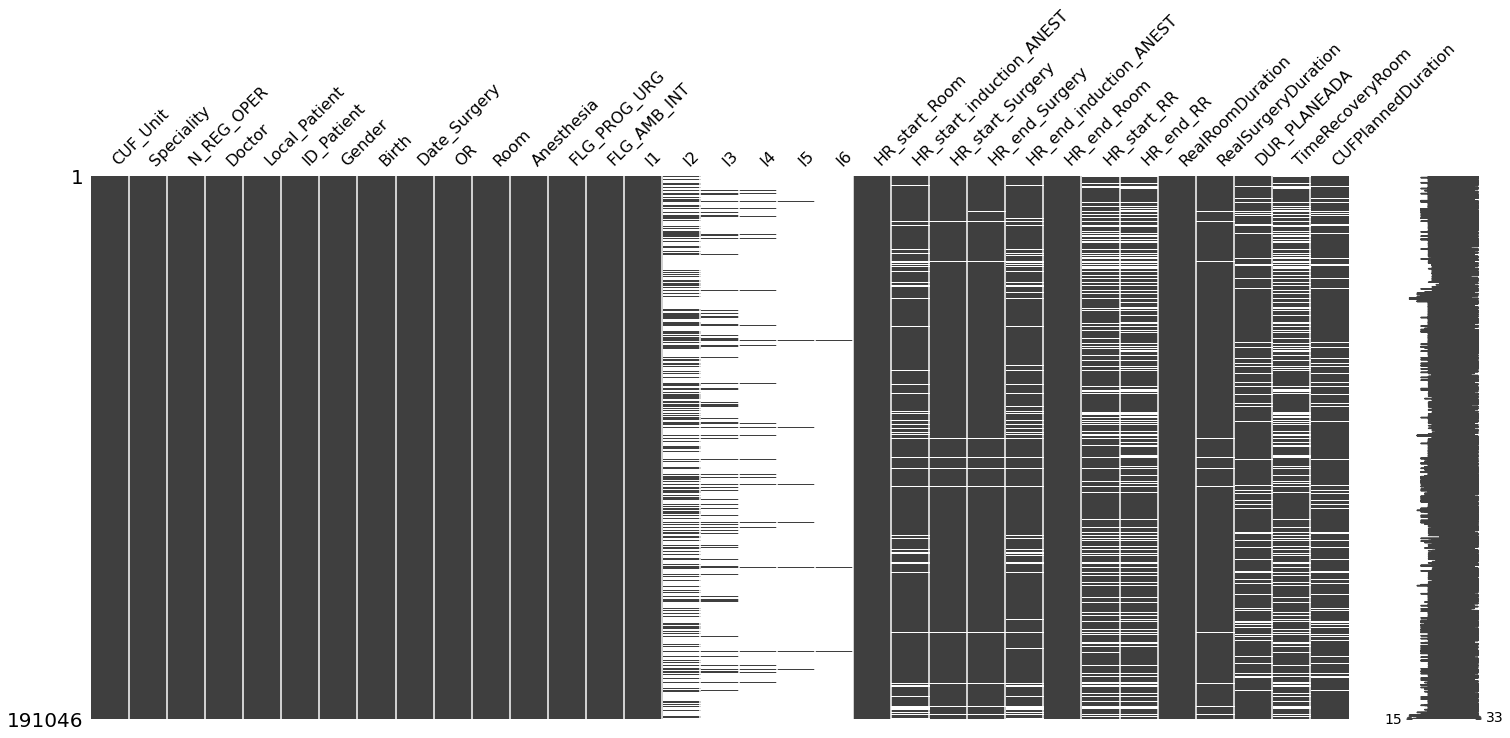

In [17]:
import missingno as msno
# Visualize missing values as a matrix
msno.matrix(df_cuf)

In [18]:
# Checking for duplicates:
df_cuf.duplicated().sum()

0

In [19]:
# generate count statistics of duplicate entries
if len(df_cuf[df_cuf.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(df_cuf[df_cuf.duplicated()]))
    print(df_cuf[df_cuf.duplicated(keep=False)].sort_values(by=list(df_cuf.columns)).head())
else:
    print("No duplicated entries found")

No duplicated entries found


In [20]:
#drop duplicates
df_cuf=df_cuf.drop_duplicates()
df_cuf = df_cuf.reset_index(drop=True)

* ### ⚠️⚠️ Clean People without DOENTE_UNICO - CUF said me data referes to a hospital where there aren't surgeries (need to check this to overall years) ⚠️⚠️

In [21]:
#df_cuf=df_cuf.dropna(subset = ['DOENTE_UNICO'])
#df_cuf = df_cuf.reset_index(drop=True)

* ### Convert doctor to string and remove the 'l'

In [22]:
df_cuf['Doctor']=df_cuf['Doctor'].astype(str)

In [23]:
df_cuf['Doctor']=df_cuf['Doctor'].str[1:]

* ### Metric and Non-Metric Variables:

In [24]:
def update_metric_feat(df):
    metric_features = df.select_dtypes(include=np.number).columns
    non_metric_features = df.select_dtypes(exclude=np.number).columns
    return metric_features.tolist(),non_metric_features.tolist()


metric_features = update_metric_feat(df_cuf)[0]
non_metric_features = update_metric_feat(df_cuf)[1]

-----

# 3. Reading Complement Datasets  <a class="anchor" id="3"></a>


### 3.1 TOM Codes  <a class="anchor" id="3.1"></a>

Some procedures have duplicates

In [25]:
df_cuf_TOM=df_cuf_TOM.drop_duplicates(subset=['Procedure'])
df_cuf_TOM = df_cuf_TOM.reset_index(drop=True)

In [26]:
df_cuf_TOM.head()

Procedure                                  Type_of_procedure
0    8020003  RESPOSTAS DE TRONCO CEREBRAL - TRACADO E PROTO...
1    9020003                      Cateterismo Cardíaco Esquerdo
2    9040209  ENCERRAMENTO PERCUTANEO DE COMUNICACAO INTERAU...
3    9050308                     REMOCAO DE SISTEMA "PACEMAKER"
4   10000002               EXSUFLACAO DE PNEUMOTORAX EXPONTANEO

Correction of the procedures with length 7 - put a 0 before

In [27]:
tom_string=df_cuf_TOM.Procedure.astype(str)
tom_len=tom_string.str.len()
tom_len.value_counts()

8    2613
7     136
9       3
1       2
4       1
Name: Procedure, dtype: int64

In [28]:
# convert again to string to concatenate
df_cuf_TOM['Procedure']=df_cuf_TOM.Procedure.astype(str)
d_len_tom=df_cuf_TOM.Procedure.str.len()

for i in range(df_cuf_TOM.shape[0]):
    if (d_len_tom[i]==7):
        df_cuf_TOM['Procedure'][i]='0'+df_cuf_TOM.Procedure[i]

In [29]:
tom_len=df_cuf_TOM.Procedure.str.len()
tom_len.value_counts()

8    2749
9       3
1       2
4       1
Name: Procedure, dtype: int64

### 3.2 Diagnostic Data <a class="anchor" id="3.2"></a> 

In [30]:
df_cuf_diagnostic.shape

(65535, 10)

In [31]:
df_cuf_diagnostic.head(5)

N_REG_OPER  COD_UNIDADE  DOENTE                      DT_OPER  \
0       61077           11  509975  2017-10-25 00:00:00.0000000   
1       61539           11  513200  2017-11-16 00:00:00.0000000   
2       61688           11  515190  2017-11-22 00:00:00.0000000   
3       61601           11  517345  2017-11-18 00:00:00.0000000   
4       61601           11  517345  2017-11-18 00:00:00.0000000   

                        DT_INT                      DT_ALTA CODIFICACAO  \
0  2017-10-25 00:00:00.0000000  2017-10-25 00:00:00.0000000      ICD-18   
1  2017-11-16 00:00:00.0000000  2017-11-16 00:00:00.0000000      ICD-18   
2  2017-11-22 00:00:00.0000000  2017-11-22 00:00:00.0000000      ICD-18   
3  2017-11-18 00:00:00.0000000  2017-11-19 00:00:00.0000000      ICD-18   
4  2017-11-18 00:00:00.0000000  2017-11-19 00:00:00.0000000      ICD-18   

  FLAG_DIAG_PRINC CODIGO                                          DESCRICAO  
0               S   H269                               Unspecified cataract  
1               S   H259                   Unspecified age-related cataract  
2               S   H259                   Unspecified age-related cataract  
3               S   J353  Hypertrophy of tonsils with hypertrophy of ade...  
4               N   Q992                               Fragile X chromosome

In [32]:
df_cuf_diagnostic['DESCRICAO'].value_counts()

Essential (primary) hypertension                                                                          3189
Hyperlipidemia, unspecified                                                                               1993
Single live birth                                                                                         1245
Type 2 diabetes mellitus without complications                                                             989
Obesity, unspecified                                                                                       717
                                                                                                          ... 
Type 2 diabetes mellitus with mild nonproliferative diabetic retinopathy with macular edema, right eye       1
Acute ethmoidal sinusitis, unspecified                                                                       1
Fistula, left knee                                                                                           1
U

In [33]:
df_cuf_diagnostic['CODIFICACAO'].value_counts()

ICD-18    65535
Name: CODIFICACAO, dtype: int64

In [34]:
df_cuf_diagnostic['CODIGO'].value_counts()

I10        3189
E785       1993
Z370       1245
E119        989
E669        717
           ... 
M67471        1
I613          1
S0121XA       1
Z3A28         1
M1610         1
Name: CODIGO, Length: 4927, dtype: int64

------

# 4. Explore data in the DataFrame   <a class="anchor" id="4"></a> 

* ### 4.1. Number of different N_REG_OPER <a class="anchor" id="4.1"></a>

It is like an ID, it's a unique key --> N_REG_OPER + UNIDADE

In [35]:
N_REG_OPER_counts=df_cuf['N_REG_OPER'].value_counts()

#should be unique inside of each hospital and it is

Check if there are the same N_REG_OPER in same unit

In [36]:
N_REG_OPER=df_cuf['N_REG_OPER'].unique()
t=[]

for i in range(len(N_REG_OPER)):
    if (N_REG_OPER_counts[N_REG_OPER[i]]==2):
        count_units=df_cuf[df_cuf['N_REG_OPER']==N_REG_OPER[i]]['CUF_Unit'].value_counts()
        if (len(count_units)!=2):
            t=t+[N_REG_OPER[i]]
            
        

There are some duplicates: I will remove them

In [37]:
#df_cuf[df_cuf.N_REG_OPER==215243]

In [38]:
df_cuf=df_cuf.drop_duplicates(subset=['CUF_Unit','N_REG_OPER', 'Doctor','Local_Patient','Gender','Date_Surgery'], keep='last')
df_cuf = df_cuf.reset_index(drop=True)

In [39]:
df_intermedium=df_cuf.copy() #keep dataset until this moment

In [40]:
table_duplicates=df_cuf[df_cuf.duplicated(subset=['Doctor','ID_Patient','Gender','Date_Surgery','Birth','HR_start_Room'],keep=False)]
t=0
while not table_duplicates.empty:
    
    
    unit=table_duplicates['CUF_Unit'].iloc[0]
    doente=table_duplicates['ID_Patient'].iloc[0]
    hour=table_duplicates['HR_start_Room'].iloc[0]
    doctor=table_duplicates['Doctor'].iloc[0]
    speaciality=table_duplicates['Speciality'].iloc[0]
    
    table=table_duplicates[table_duplicates.Doctor==doctor][table_duplicates.HR_start_Room==hour]
    check2=True
    check1=True
    for t in range(len(table)-1):
        l=t+1
        if unit!=table['CUF_Unit'].iloc[l]:
            check1=False
            
        if speaciality!=table['Speciality'].iloc[l]:
            check2=False
    
    
    if check2==False or check1==False:
        
        for k in range(len(table)):
            if check1==False:
                df_cuf['CUF_Unit'][table.index[k]]=pd.NA
                
             
            if check2==False:
                
                df_cuf=df_cuf.drop(table.index[k])
        
    
    for u in range(len(table)):
        
        table_duplicates=table_duplicates.drop(table.index[u])

    
            
    
df_cuf = df_cuf.reset_index(drop=True)



<ipython-input-40-dbff190a4785>:12: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-40-dbff190a4785>:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [41]:
#WE DISCOVERED THE SAME PATIENT WITH A SURGERY AT THE SAME TIME IN DIFFERENT HOSPIATLS --> removeu 4000 cirugias
df_cuf=df_cuf.drop_duplicates(subset=['Doctor','ID_Patient','Gender','Date_Surgery','Birth','HR_start_Room'], keep='last')
df_cuf = df_cuf.reset_index(drop=True)

----

* ### 4.2. Values in FLG_AMB_INT <a class="anchor" id="4.2"></a>


In [42]:
df_cuf['FLG_AMB_INT'].value_counts()

I    114532
A     71815
C       623
Name: FLG_AMB_INT, dtype: int64

In [43]:
patients_C=df_cuf[df_cuf.FLG_AMB_INT =='C']
for i in range(len(patients_C)):
    df_cuf['FLG_AMB_INT'][patients_C.index[i]]='I'
    
#conversion from C to I

<ipython-input-43-cf990e2968de>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [44]:
df_cuf['FLG_AMB_INT'].value_counts()

I    115155
A     71815
Name: FLG_AMB_INT, dtype: int64

<AxesSubplot:xlabel='FLG_AMB_INT', ylabel='count'>

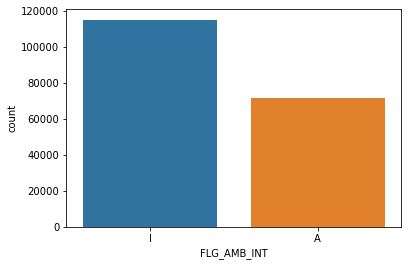

In [45]:
sns.countplot(data=df_cuf, x='FLG_AMB_INT')

Variation on orperating room time depending on type of surgery(Amb vs Int)
* case of orthopedic surgery

In [46]:
c1=df_cuf.RealRoomDuration[df_cuf.Speciality== 'ORTOPEDIA']
c2=df_cuf.FLG_AMB_INT[df_cuf.Speciality== 'ORTOPEDIA']

d_new = {"RealRoomDuration": c1,
               "FLG_AMB_INT": c2}

Dataframe_flg=pd.DataFrame(d_new)

Dataframe_flg=Dataframe_flg.dropna()

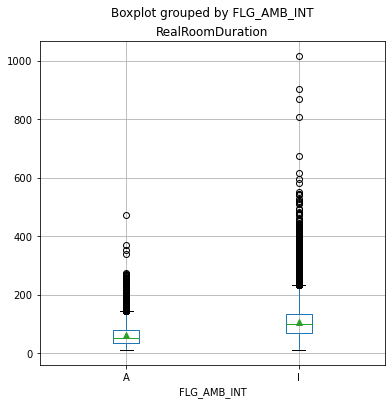

In [47]:

%matplotlib inline

features = ['RealRoomDuration']
for col in features:
    Dataframe_flg.boxplot(column=col, by='FLG_AMB_INT', figsize=(6,6), showmeans=True)
    plt.title(col)
plt.show()

----

* ### 4.3. Values in ANESTESIA <a class="anchor" id="4.3"></a>

In [48]:
df_cuf['Anesthesia'].value_counts()

AG      120423
ALOC     24920
SED      15992
RAQ      14023
AS        5094
APLE      3294
AE        2866
ALP        327
PAE         26
AP           2
PAG          2
PAR          1
Name: Anesthesia, dtype: int64

Type

* AE - ANESTESIA EPIDURAL
* AG - ANESTESIA GERAL
* AL - NÃO USAR - ANESTESIA LOCAL
* ALOC - ANESTESIA LOCAL
* ALP - ANESTESIA LOCAL / PLEXO
* ALR - NÃO USAR - ANESTESIA LOCO-REGIONAL
* AP - PARTOS - SEM ANESTESIA
* APLE - ANESTESIA PLEXO
* AS - ANESTESIA SEQUENCIAL
* PAE - PARTOS - ANESTESIA EPIDURAL
* PAG - PARTOS - ANESTESIA GERAL
* PAR - PARTOS - ANESTESIA RAQUI
* PAS - PARTOS - ANESTESIA SEQUENCIAL
* RAQ - ANESTESIA RAQUI
* SED - ANESTESIA SEDAÇÃO


<AxesSubplot:xlabel='Anesthesia', ylabel='count'>

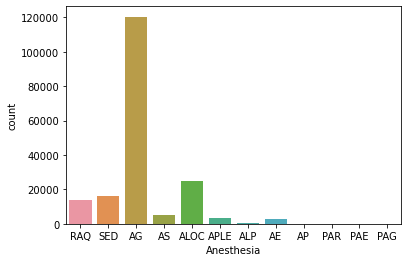

In [49]:
sns.countplot(data=df_cuf, x='Anesthesia')

Variation on orperating room time depending on type of surgery


In [50]:
grouped = df_cuf.groupby(["Anesthesia"])
grouped['RealRoomDuration'].mean() 


Anesthesia
AE       88.342289
AG       95.376523
ALOC     36.424759
ALP      65.816514
AP       45.000000
APLE     73.168488
AS      116.895367
PAE      72.423077
PAG      40.500000
PAR      68.000000
RAQ      80.152107
SED      35.077976
Name: RealRoomDuration, dtype: float64

In [33]:
sns.set(style="whitegrid")

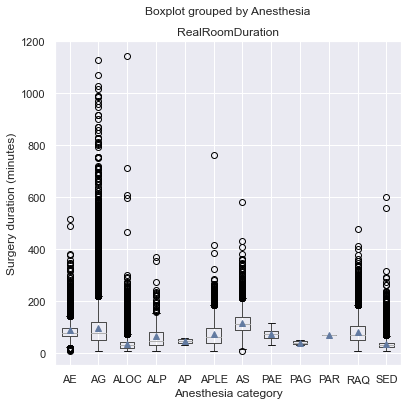

In [48]:

%matplotlib inline

features = ['RealRoomDuration']
for col in features:
    df_cuf.boxplot(column=col, by='Anesthesia', figsize=(6,6), showmeans=True,meanprops={'markeredgecolor':"#627aa1",'markerfacecolor':"#627aa1"})
    
  
    plt.title(col)
    plt.ylabel('Surgery duration (minutes)')
    plt.xlabel('Anesthesia category')
plt.show()

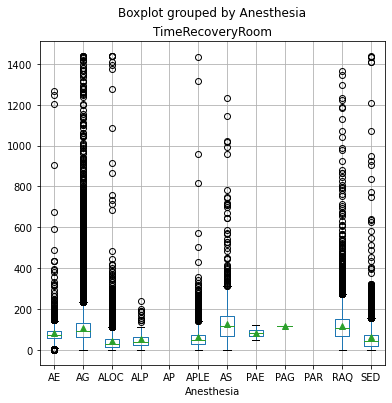

In [52]:

%matplotlib inline
features = ['TimeRecoveryRoom']
for col in features:
    df_cuf.boxplot(column=col, by='Anesthesia', figsize=(6,6), showmeans=True)
    plt.title(col)
plt.show()

----


* ### 4.4. Values in FLG_PROG_URG <a class="anchor" id="4.4"></a>


Programmed surgery vs urgent surgery

In [53]:
df_cuf['FLG_PROG_URG'].value_counts()

P    170537
U     16442
Name: FLG_PROG_URG, dtype: int64

<AxesSubplot:xlabel='FLG_PROG_URG', ylabel='count'>

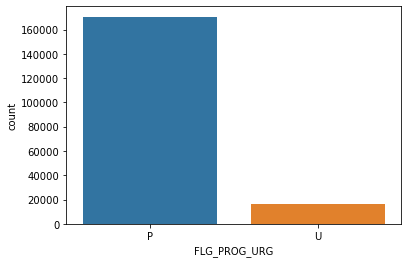

In [54]:
sns.countplot(data=df_cuf, x='FLG_PROG_URG')

Variation on orperating room time depending on type of surgery(P vs U)

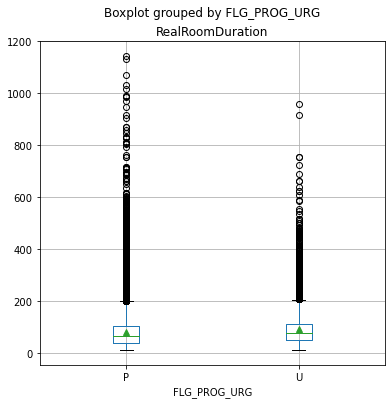

In [55]:
%matplotlib inline

features = ['RealRoomDuration']
for col in features:
    df_cuf.boxplot(column=col, by='FLG_PROG_URG', figsize=(6,6), showmeans=True)
    plt.title(col)
plt.show()

In [56]:
grouped = df_cuf.groupby(["FLG_PROG_URG"])
grouped['RealRoomDuration'].mean() 


FLG_PROG_URG
P    80.323795
U    90.858959
Name: RealRoomDuration, dtype: float64

* specific case of orthopedic surgery

In [57]:
df_flg_UG_ort= df_cuf.dropna(subset=['RealRoomDuration', 'FLG_PROG_URG'])
df_flg_UG_ort=df_flg_UG_ort[df_flg_UG_ort.Speciality=='ORTOPEDIA']

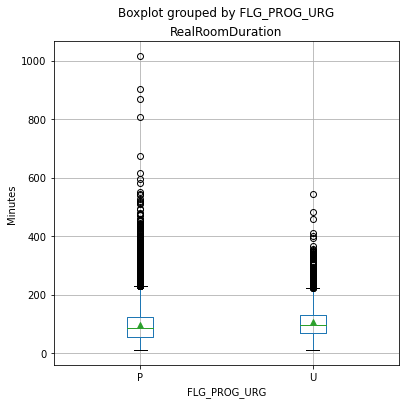

In [58]:

features = ['RealRoomDuration']
for col in features:
    df_flg_UG_ort.boxplot(column=col, by='FLG_PROG_URG', figsize=(6,6), showmeans=True)
    plt.title(col)
    plt.ylabel('Minutes')
plt.show()

------

### Data Transformation (Second part) <a class="anchor" id="301"></a>

#### Generate a two Columns: The surgery number of a doctor in that particular day and the surgery number of room in a particular day and 

* Daily Surgery number Column

In [59]:
df_cuf['SurgeryNumber']=pd.NA;

uniques_days=df_cuf['HR_start_Room'].dt.date.unique()

for i in range(len(uniques_days)):
    
    tableday=df_cuf[df_cuf.Date_Surgery.dt.date==uniques_days[i]]
    
    doctors=tableday['Doctor'].unique()
    
    for j in range(len(doctors)):
        doctor_table=tableday[tableday.Doctor==doctors[j]].sort_values(by='HR_start_Room',ascending=True)
        total=0
        for t in range(len(doctor_table)):
            total=total+1
            df_cuf['SurgeryNumber'][doctor_table.index[t]]=total
            
        

<ipython-input-59-b349c77a6f79>:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [27]:
df_cuf[df_cuf.Doctor=='132273102'][df_cuf.Date_Surgery=='2017-04-18']

<ipython-input-27-d3a8870e2001>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



CUF_Unit      Speciality  N_REG_OPER     Doctor  Local_Patient  \
0           11  CIRURGIA GERAL       57172  132273102         508345   
1540        11  CIRURGIA GERAL       57152  132273102        1835665   
5165        11  CIRURGIA GERAL       57159  132273102         910660   
14612       11  CIRURGIA GERAL       57165  132273102        1011145   

        ID_Patient Gender      Birth Date_Surgery   OR  ... TimeRecoveryRoom  \
0        7821535.0      M 1952-02-11   2017-04-18  BOC  ...              NaN   
1540   241709535.0      F 1940-07-21   2017-04-18  BOC  ...              NaN   
5165    44186535.0      F 1975-01-31   2017-04-18  BOC  ...              NaN   
14612  118820510.0      F 1980-12-08   2017-04-18  BOC  ...            104.0   

      CUFPlannedDuration SurgeryNumber SurgeryPerformed_perDoctor  \
0                     60             4                         78   
1540                 120             1                         75   
5165                  90             2                         76   
14612                 90             3                         77   

      DailySurgery_perOR   Age  Match Procedures_I day-of-week    part_of_day  
0                      5  65.0  False            1     Tuesday    Noon(13-16)  
1540                   1  75.0  False            1     Tuesday  Morning(9-12)  
5165                   3  42.0  False            1     Tuesday  Morning(9-12)  
14612                  4  35.0  False            1     Tuesday    Noon(13-16)  

[4 rows x 41 columns]

* Surgery Number performed by each doctor

In [60]:
df_cuf['SurgeryPerformed_perDoctor']=pd.NA;

uniques_doctors=df_cuf['Doctor'].unique()

for i in range(len(uniques_doctors)):
    
    doctor_table=df_cuf[df_cuf.Doctor==uniques_doctors[i]].sort_values(by='HR_start_Room',ascending=True)
    total=0
    for j in range(len(doctor_table)):
        total=total+1
        df_cuf['SurgeryPerformed_perDoctor'][doctor_table.index[j]]=total

<ipython-input-60-30be75a14274>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



* Surgery Number performed in each room in each day

In [61]:
df_cuf['DailySurgery_perOR']=pd.NA
uniques_days=df_cuf['HR_start_Room'].dt.date.unique()

for i in range(len(uniques_days)):
    
    tableday=df_cuf[df_cuf.Date_Surgery.dt.date==uniques_days[i]]
    
    units=tableday['CUF_Unit'].unique()
    
    for j in range(len(units)):
        blocos=tableday['Room'][df_cuf.CUF_Unit==units[j]].unique()
        
        for t in range(len(blocos)):
            OR_table=tableday[tableday.CUF_Unit==units[j]][tableday.Room==blocos[t]].sort_values(by='HR_start_Room',ascending=True)
            total=0
            
            for l in range(len(OR_table)):
                
                total=total+1
                df_cuf['DailySurgery_perOR'][OR_table.index[l]]=total

<ipython-input-61-becdc7073018>:14: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-61-becdc7073018>:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



----

# 5. Patients information <a class="anchor" id="5"></a>

#### Number of patients

In [62]:
number_of_patients=df_cuf['ID_Patient'].nunique()
print('Number of patients present in data: {:.2f} '.format(number_of_patients ))

Number of patients present in data: 151059.00 


* ### 5.1. Gender of patients <a class="anchor" id="5.1"></a>

In [63]:
patients_sex=df_cuf['Gender'].value_counts()

In [64]:
patients_sex

F    96097
M    89990
N       30
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

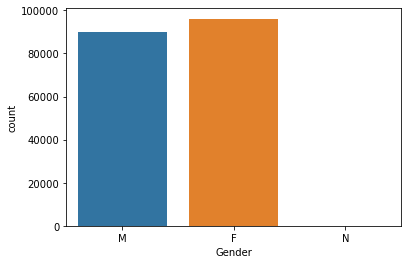

In [65]:

sns.countplot(data=df_cuf, x='Gender')

N-maybe by mistake --> correction --> deletion N 

In [66]:
patients_N=df_cuf[df_cuf.Gender =='N']
for i in range(len(patients_N)):
    df_cuf['Gender'][patients_N.index[i]]=pd.NA


<ipython-input-66-a8d48e425d40>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [8]:
df_cuf['Gender']

0           M
1           M
2           M
3           M
4           M
         ... 
186974    NaN
186975    NaN
186976    NaN
186977    NaN
186978    NaN
Name: Gender, Length: 186979, dtype: object

([<matplotlib.axis.XTick at 0x1edc00f7f70>,
 [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

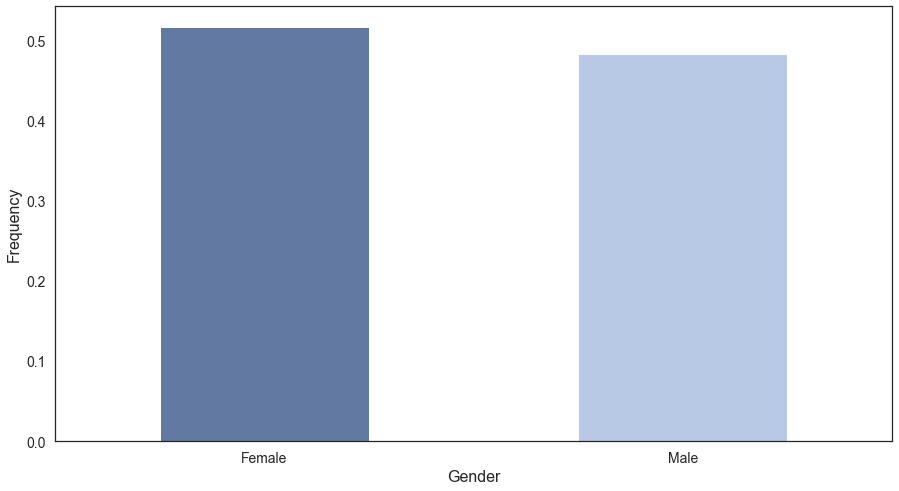

In [60]:
stacked_data=df_cuf['Gender'].value_counts(normalize=True)

stacked_data.plot(kind="bar",figsize=(15, 8),fontsize=14,color=['#627aa1',"#b7c9e5"])

plt.xlabel("Gender",fontsize=16)
plt.ylabel("Frequency",fontsize=16)
plt.xticks([0, 1],['Female','Male'],rotation=360)





Corrections of genders

* Check if I could have the gender of a patient in one operation and not in other

In [68]:
morethan_1_operation=df_cuf['ID_Patient'].value_counts()>1
patients=df_cuf['ID_Patient'].unique()
t=[]

for j in range(len(patients)):
    
    
    array_genders=df_cuf[df_cuf.ID_Patient ==patients[j]]['Gender'].unique() #cointain NaN
    indexes=df_cuf[df_cuf.ID_Patient ==patients[j]].index
    counts=df_cuf[df_cuf.ID_Patient ==patients[j]]['Gender'].value_counts()  #excludes people with M and F (no count NaN)        

    if(len(counts)>=2):
        t=t+[patients[j]]

In [69]:
patients_sex=df_cuf['Gender'].value_counts()
patients_sex


F    96097
M    89990
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

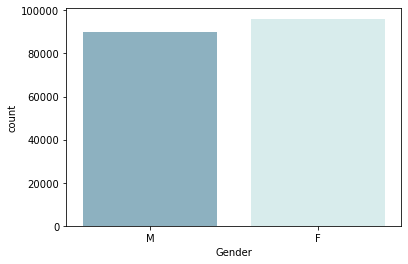

In [5]:
sns.countplot(data=df_cuf, x='Gender',palette=['#84B4C8',"#D4F0F0"])

* Number of patients with two genders registered

In [71]:
len(t)

0

Convertion of the gender to NaN

In [72]:
for j in range(len(t)):
    indexes=df_cuf[df_cuf.ID_Patient ==t[j]].index
    for i in range(len(indexes)):
        df_cuf['Gender'][indexes[i]]=pd.NA
            
    

Check if now there are again duplicates rows, the case of the N_REG_OPER==241066 was not deleated because had differnet genders

In [73]:
df_cuf=df_cuf.drop_duplicates(subset=['CUF_Unit','N_REG_OPER', 'Doctor','Local_Patient','Gender','Date_Surgery'], keep='last')
df_cuf = df_cuf.reset_index(drop=True) 

Remove Mens in Ginecologia, set gender to NaN

In [74]:
men_gine=df_cuf[df_cuf.Speciality=='GINECOLOGIA OBSTETRÍCIA'][df_cuf['Gender']=='M']

<ipython-input-74-4ed5a5241617>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [75]:
men_gine.index
for i in range(len(men_gine.index)):
             df_cuf['Gender'][men_gine.index[i]]=pd.NA

<ipython-input-75-745bde77818f>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



* ### 5.2. Number of surgeries per patient <a class="anchor" id="5.2"></a>

In [76]:
surgeries_per_patient=df_cuf['ID_Patient'].value_counts()
surgeries_per_patient.value_counts()

1     124514
2      21035
3       3843
4        996
5        363
6        157
7         67
8         41
9         16
10         9
11         5
12         5
13         4
15         2
16         1
19         1
Name: ID_Patient, dtype: int64

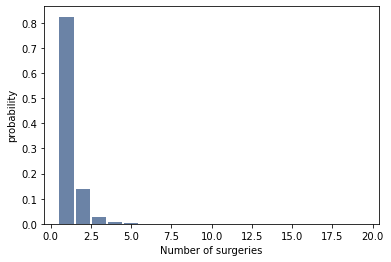

In [77]:
hist_n_surgeries = thinkstats2.Hist(surgeries_per_patient)
pmf_n_surgeries = thinkstats2.Pmf(hist_n_surgeries)
thinkplot.Hist(pmf_n_surgeries)
thinkplot.Config(xlabel='Number of surgeries',ylabel='probability')


* ### 5.3. Age of patients <a class="anchor" id="5.3"></a>

#### create a new column

In [78]:

df_cuf['Date_Surgery']=pd.to_datetime(df_cuf['Date_Surgery']) #conversion to datatime

In [79]:


from dateutil.relativedelta import relativedelta
df_cuf['Age']=pd.NA;

for i in range(len(df_cuf['Birth'])):

    if (((df_cuf['Birth'].isnull())[i] == False) & ((df_cuf['Date_Surgery'].isnull())[i] == False)):
        delta_months=df_cuf['Date_Surgery'][i].month-df_cuf['Birth'][i].month 
        if (delta_months >0):
            df_cuf['Age'][i]=relativedelta((df_cuf['Date_Surgery'][i]), (df_cuf['Birth'][i])).years
        if (delta_months < 0):
            df_cuf['Age'][i]=relativedelta((df_cuf['Date_Surgery'][i]), (df_cuf['Birth'][i])).years -1
        if (delta_months == 0):
            delta_days=df_cuf['Date_Surgery'][i].day-df_cuf['Birth'][i].day 
            if (delta_days >=0):
                df_cuf['Age'][i]=relativedelta((df_cuf['Date_Surgery'][i]), (df_cuf['Birth'][i])).years
            if (delta_days < 0):
                df_cuf['Age'][i]=relativedelta((df_cuf['Date_Surgery'][i]), (df_cuf['Birth'][i])).years -1 
        

df_cuf['Age'] = pd.to_numeric(df_cuf['Age'], errors='coerce')


<ipython-input-79-0e01c0235a46>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-79-0e01c0235a46>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-79-0e01c0235a46>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-79-0e01c0235a46>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

* Check if I could have the DT_NASCIMENTO of a patient in one operation and not in other

In [80]:
#morethan_1_operation=df_cuf['DOENTE_UNICO'].value_counts()>1
#patients=df_cuf['DOENTE_UNICO'].unique()
#t=[]

#for j in range(len(patients)):
    
    
#    array_date=df_cuf[df_cuf.DOENTE_UNICO ==patients[j]]['DT_NASCIMENTO'].unique() #cointain NaN
#    indexes=df_cuf[df_cuf.DOENTE_UNICO ==patients[j]].index
#    counts=df_cuf[df_cuf.DOENTE_UNICO ==patients[j]]['DT_NASCIMENTO'].value_counts()  #excludes people with M and F (no count NaN)
    
    
#    if ((morethan_1_operation[patients[j]]==True) & (len(array_date)==2) & (len(counts)==1)):
#        date=df_cuf[df_cuf.DOENTE_UNICO ==patients[j]]['DT_NASCIMENTO'].value_counts().index[0]
#        for i in range(len(indexes)):
#            print(patients[j])
#            if (df_cuf['DT_NASCIMENTO'][indexes[i]]!=date):
#                df_cuf['DT_NASCIMENTO'][indexes[i]]=date
            

#    if(len(counts)>=2):
#        t=t+[patients[j]]
        

###### t

In [82]:
number_different_ages=df_cuf['Age'].nunique()
print('Number of different ages present: {:.2f} '.format(number_different_ages))

Number of different ages present: 106.00 


#### Histogram distribution

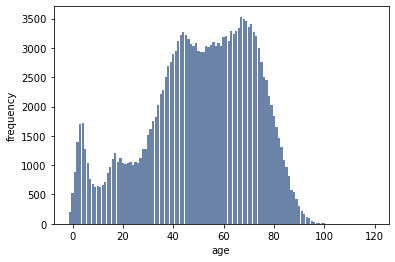

<Figure size 576x432 with 0 Axes>

In [15]:
age=df_cuf['Age']
hist_age = thinkstats2.Hist(age)
thinkplot.Hist(hist_age)
thinkplot.Show(xlabel='Age', ylabel='Frequency',color='#84B4C8')

In [55]:
mean = df_cuf.Age.mean()
var = df_cuf.Age.var()
std = df_cuf.Age.std()
print('Mean of age: {:.2f} \nVariance of age: {:.2f} \nStandard Deviation of age: {:.2f} '.format(mean,var,std ))

Mean of age: 50.67 
Variance of age: 458.34 
Standard Deviation of age: 21.41 


#### Normalization- probability mass function (PMF)
which maps from each value to its probability.

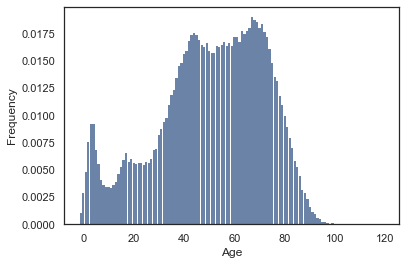

In [58]:
pmf_age = thinkstats2.Pmf(hist_age)

thinkplot.Hist(pmf_age)
thinkplot.Config(xlabel='Age',ylabel='Frequency',figsize=(15, 8))




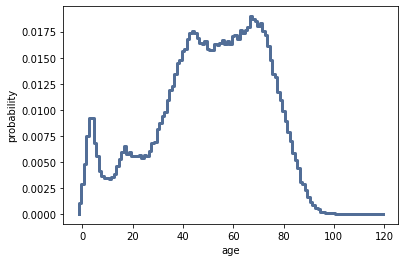

<Figure size 576x432 with 0 Axes>

In [86]:
thinkplot.Pmfs([pmf_age])
thinkplot.Show(xlabel='age',ylabel='probability')

#### CDF - cumulative distribution function

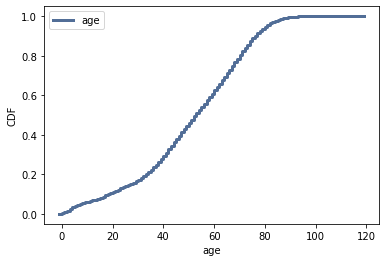

<Figure size 576x432 with 0 Axes>

In [87]:
cdf_age = thinkstats2.Cdf(age, label='age')
thinkplot.Cdf(cdf_age)
thinkplot.Show(xlabel='age', ylabel='CDF')

#### Age per gender

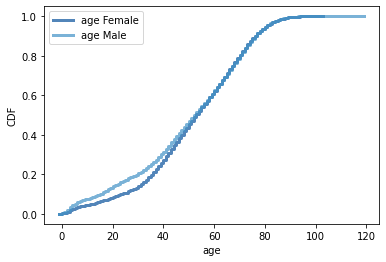

<Figure size 576x432 with 0 Axes>

In [88]:
AGE_f=df_cuf.Age[df_cuf.Gender=='F']
AGE_m=df_cuf.Age[df_cuf.Gender=='M']

cdf_f = thinkstats2.Cdf(AGE_f, label='age Female')
cdf_m = thinkstats2.Cdf(AGE_m, label='age Male')

thinkplot.PrePlot(2)
thinkplot.Cdfs([cdf_f, cdf_m])
thinkplot.Show(xlabel='age', ylabel='CDF')

the Pdf is a smooth function in contraste with Pmf

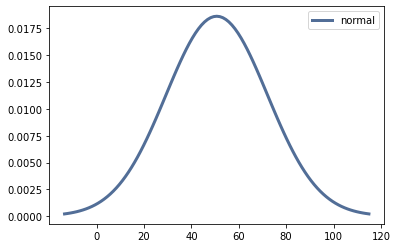

<Figure size 576x432 with 0 Axes>

In [89]:
pdf = thinkstats2.NormalPdf(mean, std)
pdf.Density(mean + std)

thinkplot.Pdf(pdf, label='normal')
thinkplot.Show()


#### Distribution of ages (General case)

In [90]:
c1=df_cuf.Age
c2=df_cuf.RealRoomDuration

d_new = {"Age": c1,
               "RealRoomDuration": c2}

Dataframe_age=pd.DataFrame(d_new)

Dataframe_age=Dataframe_age.dropna()

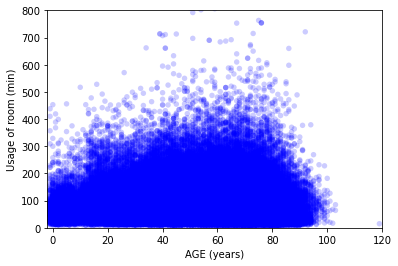

<Figure size 576x432 with 0 Axes>

In [91]:
thinkplot.Scatter(Dataframe_age['Age'], Dataframe_age['RealRoomDuration'])
thinkplot.Show(xlabel='AGE (years)',ylabel='Usage of room (min)',axis=[-2, 120, 0, 800])

Overlapping data points look darker, so darkness is proportional to density.

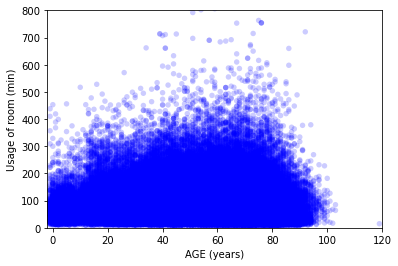

<Figure size 576x432 with 0 Axes>

In [92]:
thinkplot.Scatter(Dataframe_age['Age'], Dataframe_age['RealRoomDuration'],alpha=0.2)
thinkplot.Show(xlabel='AGE (years)',ylabel='Usage of room (min)',axis=[-2, 120, 0, 800])

#### Distribution of ages (Ortopedic case)

In [93]:
c1=df_cuf.Age[df_cuf.Speciality =='ORTOPEDIA']
c2=df_cuf.RealRoomDuration[df_cuf.Speciality =='ORTOPEDIA']

d_new = {"AGE": c1,
               "RealRoomDuration": c2}

Dataframe_age=pd.DataFrame(d_new)

Dataframe_age=Dataframe_age.dropna()

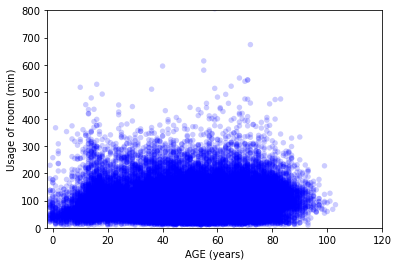

<Figure size 576x432 with 0 Axes>

In [94]:
thinkplot.Scatter(Dataframe_age['AGE'], Dataframe_age['RealRoomDuration'],alpha=0.2)
thinkplot.Show(xlabel='AGE (years)',ylabel='Usage of room (min)',axis=[-2, 120, 0, 800])

 -----------------------------------------------


# 6. Procedures (I)   <a class="anchor" id="6"></a> 


* Procedures are numbers with 8 numbers, separed per points (ex:80.00.22.00)
* Here the procedures are numbers, so if the number strart with 08, the python will read strating on 8.., so len(7).
* We convert to string in order to add 0, before some procedure code with len(7)
* Most of surgerical procedures between 30-49

* ### 6.1. Analyze of each procedure <a class="anchor" id="6.1"></a>


##### I1

In [95]:
df_cuf.I1.astype(str).str[:2]  #i'm grouping per group of 2 numbers

0         39
1         46
2         40
3         40
4         40
          ..
186974    46
186975    46
186976    33
186977    33
186978    30
Name: I1, Length: 186979, dtype: object

In [96]:
d=df_cuf.I1.astype(str) # convert to a string in order to measure the len()
d_len=d.str.len()
d_len.value_counts()



8    184263
7      2640
9        55
1        20
6         1
Name: I1, dtype: int64

Correction of procedures with length 7

In [97]:
# convert again to string to concatenate
df_cuf['I1']=df_cuf.I1.astype(str)
d_len_df_cuf=df_cuf.I1.str.len()

for i in range(df_cuf.shape[0]):
    if (d_len_df_cuf[i]==7):
        df_cuf['I1'][i]='0'+df_cuf.I1[i]
        


<ipython-input-97-07c805aaa411>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [98]:
d=df_cuf.I1
d=d.dropna()  # drop NaN (remove the count 3)

d_len=d.str.len()
d_len.value_counts()



8    186903
9        55
1        20
6         1
Name: I1, dtype: int64

Group of number present

In [99]:
d.astype(str).str[:2].unique()

array(['39', '46', '40', '41', '34', '30', '33', '47', '35', '42', '17',
       '45', '44', '31', '48', '06', '38', '36', '15', '21', '09', '12',
       '37', '25', '43', '18', '66', '50', '08', '60', '29', '16', '64',
       '07', '19', '14', '99', '1', '10', '02', '32', '96', '62'],
      dtype=object)

Text(0, 0.5, 'Type of Procedure')

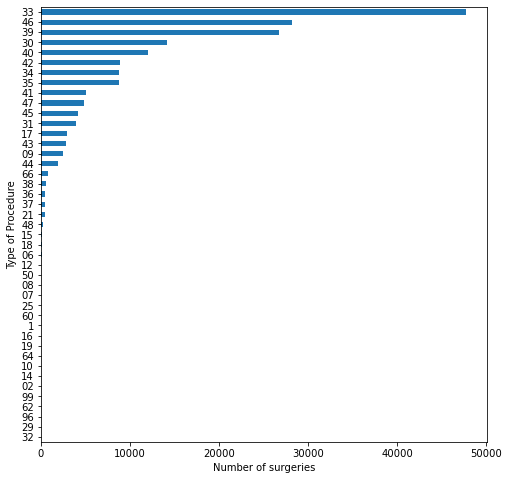

In [100]:
I1_counts=df_cuf.I1.astype(str).str[:2].value_counts()
plt.figure(figsize=(8,8))
I1_counts.plot(kind='barh')
plt.gca().invert_yaxis()
plt.xlabel('Number of surgeries')
plt.ylabel('Type of Procedure')


##### I2

In [101]:
# convert from float to string
#nan values as -1 (length=2)
df_cuf['I2'] = df_cuf['I2'].fillna(-1)
df_cuf['I2'] = df_cuf['I2'].astype(int)
df_cuf['I2'] = df_cuf['I2'].astype(str)

In [102]:
d=df_cuf.I2
d_len=d.str.len()
d_len.value_counts()

2    115578
8     70373
7      1021
9         7
Name: I2, dtype: int64

In [103]:
# convert again to string to concatenate
d_len_df_cuf=df_cuf.I2.str.len()

for i in range(df_cuf.shape[0]):
    if (d_len_df_cuf[i]==7):
        
        df_cuf['I2'][i]='0'+df_cuf.I2[i]
       

        

df_cuf['I2'] = df_cuf['I2'].replace('-1', np.nan)

<ipython-input-103-64a9f08d0979>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Correction of procedures with length 7

In [104]:
d=df_cuf.I2
d=d.dropna()  # drop NaN (remove the count 3)

d_len=d.str.len()
d_len.value_counts()

8    71394
9        7
Name: I2, dtype: int64

Group of number present

In [105]:
d.astype(str).str[:2].unique()

array(['40', '34', '33', '47', '39', '35', '42', '30', '17', '41', '44',
       '46', '45', '31', '21', '09', '48', '36', '38', '50', '15', '06',
       '18', '08', '66', '25', '43', '37', '16', '10', '60', '20', '02',
       '12', '19', '07', '62', '96'], dtype=object)

<AxesSubplot:>

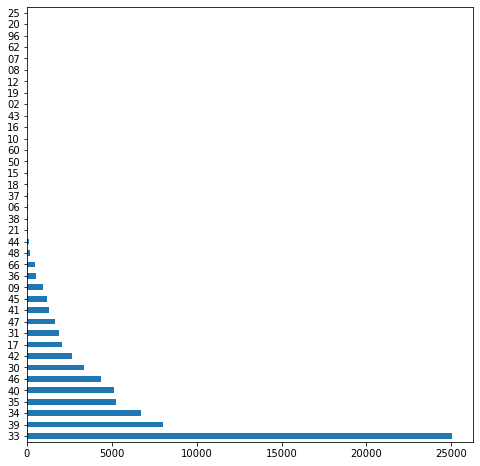

In [106]:
I2_counts=d.astype(str).str[:2].value_counts() #I used d in order to remove nan
plt.figure(figsize=(8,8))
I2_counts.plot(kind='barh')

##### I3

In [107]:
# convert from float to string
#nan values as -1 (length=2)
df_cuf['I3'] = df_cuf['I3'].fillna(-1)
df_cuf['I3'] = df_cuf['I3'].astype(int)
df_cuf['I3'] = df_cuf['I3'].astype(str)

In [108]:
d=df_cuf.I3.astype(str)
d_len=d.str.len()
d_len.value_counts()

#2 correspond to NaN values--> len(-1)=2

2    162207
8     23889
7       882
9         1
Name: I3, dtype: int64

Correction of procedures with length 7

In [109]:
# convert again to string to concatenate
d_len_df_cuf=df_cuf.I3.str.len()

for i in range(df_cuf.shape[0]):
    if (d_len_df_cuf[i]==7):
        
        df_cuf['I3'][i]='0'+df_cuf.I3[i]
       

        

df_cuf['I3'] = df_cuf['I3'].replace('-1', np.nan)

<ipython-input-109-444723aaf626>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [110]:
d=df_cuf.I3
d=d.dropna()  # drop NaN (remove the count 3)

d_len=d.str.len()
d_len.value_counts()

8    24771
9        1
Name: I3, dtype: int64

Group of number present

In [111]:
d.astype(str).str[:2].unique()

array(['40', '33', '34', '35', '39', '30', '45', '41', '42', '44', '21',
       '09', '17', '02', '46', '18', '66', '36', '31', '50', '06', '47',
       '25', '38', '43', '37', '16', '10', '48', '12', '60', '62', '07',
       '19', '15', '08', '20', '96'], dtype=object)

<AxesSubplot:>

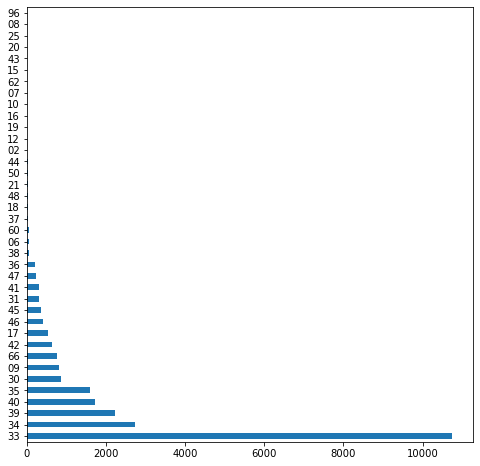

In [112]:
I3_counts=d.astype(str).str[:2].value_counts() #I used d in order to remove nan
plt.figure(figsize=(8,8))
I3_counts.plot(kind='barh')

###### I4

In [113]:
# convert from float to string
#nan values as -1 (length=2)
df_cuf['I4'] = df_cuf['I4'].fillna(-1)
df_cuf['I4'] = df_cuf['I4'].astype(int)
df_cuf['I4'] = df_cuf['I4'].astype(str)

In [114]:
d=df_cuf.I4.astype(str)
d_len=d.str.len()
d_len.value_counts()

2    177876
8      8931
7       172
Name: I4, dtype: int64

Correction of procedures with length 7

In [115]:
# convert again to string to concatenate
d_len_df_cuf=df_cuf.I4.str.len()

for i in range(df_cuf.shape[0]):
    if (d_len_df_cuf[i]==7):
        
        df_cuf['I4'][i]='0'+df_cuf.I4[i]
       

        

df_cuf['I4'] = df_cuf['I4'].replace('-1', np.nan)

<ipython-input-115-6f5a1898d7b3>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [116]:
d=df_cuf.I4
d=d.dropna()  # drop NaN (remove the count 3)

d_len=d.str.len()
d_len.value_counts()

8    9103
Name: I4, dtype: int64

Group of number present

In [117]:
d.astype(str).str[:2].unique()

array(['33', '39', '34', '40', '30', '17', '21', '35', '45', '46', '66',
       '47', '42', '41', '31', '09', '25', '18', '38', '36', '48', '50',
       '44', '06', '37', '10', '60', '07', '20', '19', '08', '62', '02'],
      dtype=object)

<AxesSubplot:>

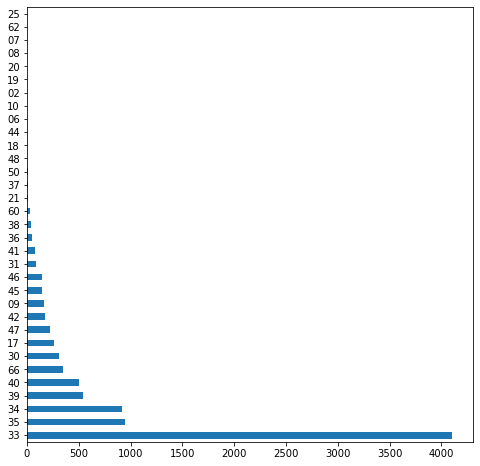

In [118]:
I4_counts=d.astype(str).str[:2].value_counts() #I used d in order to remove nan
plt.figure(figsize=(8,8))
I4_counts.plot(kind='barh')

##### I5

In [119]:
# convert from float to string
#nan values as -1 (length=2)
df_cuf['I5'] = df_cuf['I5'].fillna(-1)
df_cuf['I5'] = df_cuf['I5'].astype(int)
df_cuf['I5'] = df_cuf['I5'].astype(str)

In [120]:
d=df_cuf.I5.astype(str)
d_len=d.str.len()
d_len.value_counts()

2    183826
8      3068
7        85
Name: I5, dtype: int64

In [ ]:

x = Genenal_Dataset['TrainSet']['Real Room Duration']
plt.hist(x, bins = 60)
plt.show()

Correction of procedures with length 7

In [121]:
# convert again to string to concatenate
d_len_df_cuf=df_cuf.I5.str.len()

for i in range(df_cuf.shape[0]):
    if (d_len_df_cuf[i]==7):
        
        df_cuf['I5'][i]='0'+df_cuf.I5[i]
       

        

df_cuf['I5'] = df_cuf['I5'].replace('-1', np.nan)

<ipython-input-121-e98e20bad0ec>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [122]:
d=df_cuf.I5
d=d.dropna()  # drop NaN (remove the count 3)

d_len=d.str.len()
d_len.value_counts()

8    3153
Name: I5, dtype: int64

Group of number present

In [123]:
d.astype(str).str[:2].unique()

array(['33', '35', '39', '21', '17', '46', '45', '30', '34', '66', '50',
       '40', '42', '09', '25', '38', '36', '47', '41', '10', '31', '60',
       '37', '08', '06', '14', '44'], dtype=object)

<AxesSubplot:>

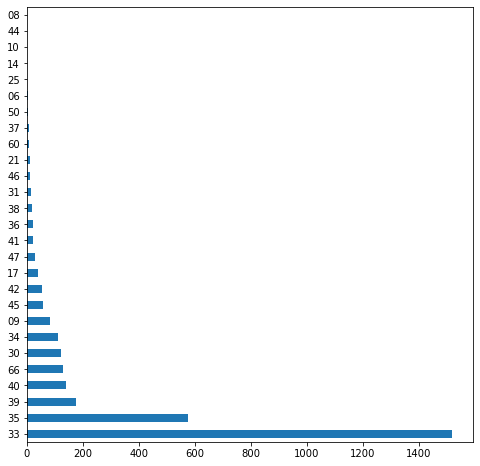

In [124]:
I5_counts=d.astype(str).str[:2].value_counts() #I used d in order to remove nan
plt.figure(figsize=(8,8))
I5_counts.plot(kind='barh')

##### I6

In [125]:
# convert from float to string
#nan values as -1 (length=2)
df_cuf['I6'] = df_cuf['I6'].fillna(-1)
df_cuf['I6'] = df_cuf['I6'].astype(int)
df_cuf['I6'] = df_cuf['I6'].astype(str)

In [126]:
d=df_cuf.I6.astype(str)
d_len=d.str.len()
d_len.value_counts()

2    185280
8      1463
7       236
Name: I6, dtype: int64

Correction of procedures with length 7

In [127]:
# convert again to string to concatenate
d_len_df_cuf=df_cuf.I6.str.len()

for i in range(df_cuf.shape[0]):
    if (d_len_df_cuf[i]==7):
        
        df_cuf['I6'][i]='0'+df_cuf.I6[i]
       

        

df_cuf['I6'] = df_cuf['I6'].replace('-1', np.nan)

<ipython-input-127-897a341ebfae>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [128]:
d=df_cuf.I6
d=d.dropna()  # drop NaN (remove the count 3)

d_len=d.str.len()
d_len.value_counts()

8    1699
Name: I6, dtype: int64

Group of number present

In [129]:
d.astype(str).str[:2].unique()

array(['33', '35', '46', '21', '30', '66', '45', '09', '38', '39', '34',
       '50', '40', '47', '41', '31', '17', '18', '42', '36', '60', '06',
       '14'], dtype=object)

<AxesSubplot:>

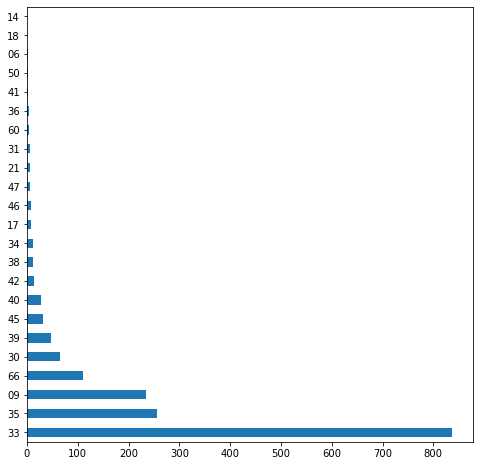

In [130]:
I6_counts=d.astype(str).str[:2].value_counts() #I used d in order to remove nan
plt.figure(figsize=(8,8))
I6_counts.plot(kind='barh')

------


* ### 6.2. Check if all procedures are present in TOM codes documents <a class="anchor" id="6.2"></a>

   


* if not remove those ones

#### I1

Match is a column with True or False, which dependes on if the procedure is present or not in the data

In [131]:
values = set(df_cuf['I1'])

In [132]:
df_cuf_TOM['Match'] = df_cuf_TOM['Procedure'].isin(values)

In [133]:
df_cuf_TOM['Match'].value_counts()

True     1839
False     916
Name: Match, dtype: int64

Match with Tom codes
* Every code in I1 needs to present in Tom codes document

In [134]:
values_df_cuf = set(df_cuf_TOM['Procedure'])

In [135]:
df_cuf['Match']=df_cuf['I1'].isin(values_df_cuf)

In [136]:
df_cuf['Match'].value_counts()

True     186976
False         3
Name: Match, dtype: int64

In [137]:
df_cuf['I1'].isnull().sum() #in order to understand if there is one that is not present

0

Set to NaN values, procedures with no existing values

In [138]:
lines_witherros=df_cuf[df_cuf['Match']==False].index

In [139]:
for i in range(len(lines_witherros)):
    df_cuf['I1'][lines_witherros[i]]=pd.NA

<ipython-input-139-bcac87046aa0>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### I2

Match is a column with True or False, which dependes on if the procedure is present or not in the data

In [140]:
values = set(df_cuf['I2'])

In [141]:
df_cuf_TOM['Match'] = df_cuf_TOM['Procedure'].isin(values)

In [142]:
df_cuf_TOM['Match'].value_counts()

True     1580
False    1175
Name: Match, dtype: int64

Match with Tom codes
* Every code in I2 needs to present in Tom codes document
* In this case all procedures are corrected 

In [143]:
values_df_cuf = set(df_cuf_TOM['Procedure'])


In [144]:
df_cuf['Match']=df_cuf['I2'].isin(values_df_cuf)

In [145]:
df_cuf['Match'].value_counts()

False    115579
True      71400
Name: Match, dtype: int64

In [146]:
df_cuf['I2'].isnull().sum()

115578

Set to NaN values, procedures with no existing values

In [147]:
lines_witherros=df_cuf[df_cuf['Match']==False].index
for i in range(len(lines_witherros)):
    df_cuf['I2'][lines_witherros[i]]=pd.NA

<ipython-input-147-778366e656b3>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### I3

Match is a column with True or False, which dependes on if the procedure is present or not in the data

In [148]:
values = set(df_cuf['I3'])
df_cuf_TOM['Match'] = df_cuf_TOM['Procedure'].isin(values)
df_cuf_TOM['Match'].value_counts()

False    1578
True     1177
Name: Match, dtype: int64

Match with Tom codes
* Every code in I3 needs to present in Tom codes document
* In this case all procedures are corrected 

In [149]:
values_df_cuf = set(df_cuf_TOM['Procedure'])
df_cuf['Match']=df_cuf['I3'].isin(values_df_cuf)
df_cuf['Match'].value_counts()

False    162210
True      24769
Name: Match, dtype: int64

In [150]:
df_cuf['I3'].isnull().sum()

162207

Set to NaN values, procedures with no existing values

In [151]:
lines_witherros=df_cuf[df_cuf['Match']==False].index
for i in range(len(lines_witherros)):
    df_cuf['I3'][lines_witherros[i]]=pd.NA

<ipython-input-151-c1ab0848839e>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### I4

Match is a column with True or False, which dependes on if the procedure is present or not in the data

In [152]:
values = set(df_cuf['I4'])
df_cuf_TOM['Match'] = df_cuf_TOM['Procedure'].isin(values)
df_cuf_TOM['Match'].value_counts()

False    1985
True      770
Name: Match, dtype: int64

Match with Tom codes
* Every code in I4 needs to present in Tom codes document
* In this case all procedures are corrected 

In [153]:
values_df_cuf = set(df_cuf_TOM['Procedure'])
df_cuf['Match']=df_cuf['I4'].isin(values_df_cuf)
df_cuf['Match'].value_counts()

False    177876
True       9103
Name: Match, dtype: int64

In [154]:
df_cuf['I4'].isnull().sum()

177876

Set to NaN values, procedures with no existing values

In [155]:
lines_witherros=df_cuf[df_cuf['Match']==False].index
for i in range(len(lines_witherros)):
    df_cuf['I4'][lines_witherros[i]]=pd.NA

<ipython-input-155-9419bd08caa7>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### I5

Match is a column with True or False, which dependes on if the procedure is present or not in the data

In [156]:
values = set(df_cuf['I5'])
df_cuf_TOM['Match'] = df_cuf_TOM['Procedure'].isin(values)
df_cuf_TOM['Match'].value_counts()

False    2271
True      484
Name: Match, dtype: int64

Match with Tom codes
* Every code in I5 needs to present in Tom codes document
* In this case all procedures are corrected 

In [157]:
values_df_cuf = set(df_cuf_TOM['Procedure'])
df_cuf['Match']=df_cuf['I5'].isin(values_df_cuf)
df_cuf['Match'].value_counts()

False    183826
True       3153
Name: Match, dtype: int64

In [158]:
df_cuf['I5'].isnull().sum()

183826

Set to NaN values, procedures with no existing values

In [159]:
lines_witherros=df_cuf[df_cuf['Match']==False].index
for i in range(len(lines_witherros)):
    df_cuf['I5'][lines_witherros[i]]=pd.NA

<ipython-input-159-64acdd38c46f>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### I6

Match is a column with True or False, which dependes on if the procedure is present or not in the data

In [160]:
values = set(df_cuf['I6'])
df_cuf_TOM['Match'] = df_cuf_TOM['Procedure'].isin(values)
df_cuf_TOM['Match'].value_counts()

False    2442
True      313
Name: Match, dtype: int64

Match with Tom codes
* Every code in I6 needs to present in Tom codes document
* In this case all procedures are corrected 

In [161]:
values_df_cuf = set(df_cuf_TOM['Procedure'])
df_cuf['Match']=df_cuf['I6'].isin(values_df_cuf)
df_cuf['Match'].value_counts()

False    185280
True       1699
Name: Match, dtype: int64

In [162]:
df_cuf['I6'].isnull().sum()

185280

Set to NaN values, procedures with no existing values

In [163]:
lines_witherros=df_cuf[df_cuf['Match']==False].index
for i in range(len(lines_witherros)):
    df_cuf['I6'][lines_witherros[i]]=pd.NA

<ipython-input-163-95325dc4161e>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



-----


* ### 6.3. Create a column with the number of procedures in each surgery <a class="anchor" id="6.3"></a>

In [164]:
I6_surgeries=df_cuf[df_cuf['I1'].isnull()==False][df_cuf['I2'].isnull()==False][df_cuf['I3'].isnull()==False][df_cuf['I4'].isnull()==False][df_cuf['I5'].isnull()==False][df_cuf['I6'].isnull()==False]
I5_surgeries=df_cuf[df_cuf['I1'].isnull()==False][df_cuf['I2'].isnull()==False][df_cuf['I3'].isnull()==False][df_cuf['I4'].isnull()==False][df_cuf['I5'].isnull()==False][df_cuf['I6'].isnull()==True]
I4_surgeries=df_cuf[df_cuf['I1'].isnull()==False][df_cuf['I2'].isnull()==False][df_cuf['I3'].isnull()==False][df_cuf['I4'].isnull()==False][df_cuf['I5'].isnull()==True][df_cuf['I6'].isnull()==True]
I3_surgeries=df_cuf[df_cuf['I1'].isnull()==False][df_cuf['I2'].isnull()==False][df_cuf['I3'].isnull()==False][df_cuf['I4'].isnull()==True][df_cuf['I5'].isnull()==True][df_cuf['I6'].isnull()==True]
I2_surgeries=df_cuf[df_cuf['I1'].isnull()==False][df_cuf['I2'].isnull()==False][df_cuf['I3'].isnull()==True][df_cuf['I4'].isnull()==True][df_cuf['I5'].isnull()==True][df_cuf['I6'].isnull()==True]
I1_surgeries=df_cuf[df_cuf['I1'].isnull()==False][df_cuf['I2'].isnull()==True][df_cuf['I3'].isnull()==True][df_cuf['I4'].isnull()==True][df_cuf['I5'].isnull()==True][df_cuf['I6'].isnull()==True]

df_cuf['Procedures_I']=pd.NA;

for i in range(len(I6_surgeries)):
    df_cuf['Procedures_I'][I6_surgeries.index[i]]=6;
    
for i in range(len(I5_surgeries)):
    df_cuf['Procedures_I'][I5_surgeries.index[i]]=5;
    
for i in range(len(I4_surgeries)):
    df_cuf['Procedures_I'][I4_surgeries.index[i]]=4;
    

for i in range(len(I3_surgeries)):
    df_cuf['Procedures_I'][I3_surgeries.index[i]]=3;
    
for i in range(len(I2_surgeries)):
    df_cuf['Procedures_I'][I2_surgeries.index[i]]=2;
    
for i in range(len(I1_surgeries)):
    df_cuf['Procedures_I'][I1_surgeries.index[i]]=1;
    

<ipython-input-164-a3c4a5a89f78>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-164-a3c4a5a89f78>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-164-a3c4a5a89f78>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-164-a3c4a5a89f78>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-164-a3c4a5a89f78>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-164-a3c4a5a89f78>:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-164-a3c4a5a89f78>:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-164-a3c4a5a89f78>:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-164-a3c4a5a89f78>:2: UserWarning:

Boolean Series key will be reindexed t

In [165]:
df_cuf['Procedures_I']=df_cuf.Procedures_I.astype('Int64')
df_cuf['Procedures_I'].value_counts()

1    115578
2     46629
3     15666
4      5950
6      1699
5      1453
Name: Procedures_I, dtype: Int64

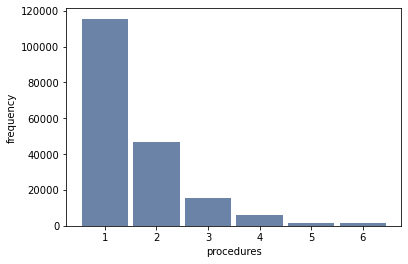

<Figure size 576x432 with 0 Axes>

In [166]:
procedures=df_cuf['Procedures_I']
hist_procedures = thinkstats2.Hist(procedures)
thinkplot.Hist(hist_procedures)
thinkplot.Show(xlabel='procedures', ylabel='frequency')

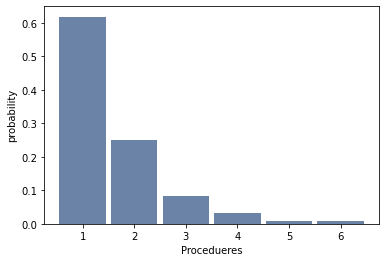

In [167]:
procedures=df_cuf['Procedures_I']
hist_procedures = thinkstats2.Hist(procedures)
pmf_procedures = thinkstats2.Pmf(hist_procedures)

thinkplot.Hist(pmf_procedures)
thinkplot.Config(xlabel='Procedueres',ylabel='probability')

##### Mean of operating room usage for each number of proccedures

* General Case

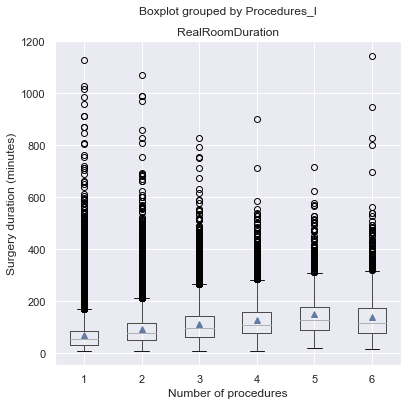

In [49]:

%matplotlib inline

features = ['RealRoomDuration']
for col in features:
    df_cuf.boxplot(column=col, by='Procedures_I', figsize=(6,6), showmeans=True,meanprops={'markeredgecolor':"#627aa1",'markerfacecolor':"#627aa1"})
    
    plt.title(col)
    plt.ylabel('Surgery duration (minutes)')
    plt.xlabel('Number of procedures')
plt.show()

In [ ]:

%matplotlib inline

features = ['RealRoomDuration']
for col in features:
    df_cuf.boxplot(column=col, by='Anesthesia', figsize=(6,6), showmeans=True,meanprops={'markeredgecolor':"#627aa1",'markerfacecolor':"#627aa1"})
    
  
    plt.title(col)
    plt.ylabel('Surgery duration (minutes)')
    plt.xlabel('Anesthesia category')
plt.show()

* Orthopedics Case

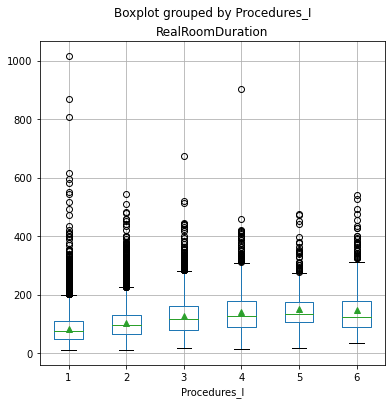

In [169]:


features = ['RealRoomDuration']
for col in features:
    df_cuf[df_cuf.Speciality=='ORTOPEDIA'].boxplot(column=col, by='Procedures_I', figsize=(6,6), showmeans=True)
    plt.title(col)
plt.show()

------

# 7. Doctors information   <a class="anchor" id="7"></a> 


#### Number of different doctors

In [170]:
number_of_doctors = df_cuf['Doctor'].nunique()
number_of_doctors

1497

In [171]:
df_cuf['Doctor'].value_counts()

1800005      2126
6030005      2096
9240005      1881
96440008     1618
5050005      1553
             ... 
351315102       1
006562712       1
541992831       1
290549212       1
996764311       1
Name: Doctor, Length: 1497, dtype: int64


* ### 7.1. Number of doctors working in each department<a class="anchor" id="7.1"></a>

In [172]:
types_of_services=df_cuf.Speciality.unique()
operations_per_service=[None] * len(types_of_services)
number_of_doctors=[None] * len(types_of_services)

for j in range(len(types_of_services)):
    service=df_cuf.loc[df_cuf['Speciality'] == types_of_services[j]]
    number_of_doctorss=service['Doctor'].nunique()
    operation_perservice=service['Speciality'].value_counts().unique()[0]
    
    operations_per_service[j]=operation_perservice
    number_of_doctors[j]=number_of_doctorss



In [173]:
d_surgeries = {"Types of Services": types_of_services, "Number of Operations": operations_per_service, "Number of doctors": number_of_doctors}

In [174]:
pd.DataFrame(d_surgeries).sort_values(by='Number of Operations',ascending=False)

Types of Services  Number of Operations  \
5                                  ORTOPEDIA                 40991   
0                             CIRURGIA GERAL                 29610   
1                               OFTALMOLOGIA                 28094   
3                       OTORRINOLARINGOLOGIA                 18402   
2                                   UROLOGIA                 17140   
8                    GINECOLOGIA OBSTETRÍCIA                 14055   
4                             NEURO-CIRURGIA                 10083   
9   CIR. PLÁSTICA E RECONSTRUTIVA E ESTÉTICA                  7391   
6                          CIRURGIA VASCULAR                  6851   
10                       CIRURGIA PEDIÁTRICA                  3947   
7                               DERMATOLOGIA                  3210   
16                               ANGIOGRAFIA                  3144   
11                    CIRURGIA MAXILO-FACIAL                  1680   
18                         CIRURGIA CARDÍACA                   684   
12                         CIRURGIA TORÁCICA                   667   
22                          MEDICINA INTERNA                   352   
14                               CARDIOLOGIA                   324   
13                         GASTROENTEROLOGIA                   156   
21                               PNEUMOLOGIA                    71   
15                         MEDICINA DENTÁRIA                    52   
17                            ANESTESIOLOGIA                    39   
24                               IMAGIOLOGIA                    15   
23                          HEMATO/ONCOLOGIA                    11   
25                              RADIOTERAPIA                     6   
20                 ADMINISTRAÇÃO REQUISIÇÕES                     3   
19                                NEUROLOGIA                     1   

    Number of doctors  
5                 267  
0                 258  
1                 230  
3                 165  
2                 126  
8                 299  
4                  94  
9                 104  
6                  68  
10                 31  
7                  56  
16                 62  
11                 33  
18                 13  
12                 20  
22                 52  
14                 18  
13                 23  
21                  8  
15                 12  
17                 18  
24                  5  
23                  8  
25                  4  
20                  3  
19                  1

* ### 7.2. Professionals and the number of Units where they work<a class="anchor" id="7.2"></a>


In [175]:
array_of_doctors=df_cuf['Doctor'].unique()
list_of_services_doctor=[None] * len(array_of_doctors)
list_of_units_doctor=[None] * len(array_of_doctors)
number_of_surgeries=[None] * len(array_of_doctors)

number_units_working=[None] * len(array_of_doctors)
number_of_services=[None] * len(array_of_doctors)

for i in range(len(array_of_doctors)):
    list_of_surgeries=df_cuf[df_cuf.Doctor==array_of_doctors[i]]
    number_of_surgeries[i]=len(list_of_surgeries)
    list_of_units_doctor[i]=list_of_surgeries['CUF_Unit'].unique()
    list_of_services_doctor[i]=list_of_surgeries['Speciality'].unique()
    
    number_units_working[i]=len(list_of_units_doctor[i])
    number_of_services[i]=len(list_of_services_doctor[i])
    
doctors = {"Doctor": array_of_doctors, "Number of surgeries": number_of_surgeries, "List of Units": list_of_units_doctor, "Units": number_units_working, "List of Services":list_of_services_doctor,"Services":number_of_services}
doctors_table=pd.DataFrame(doctors).sort_values(by='Number of surgeries',ascending=False)
doctors_table

Doctor  Number of surgeries     List of Units  Units  \
12      1800005                 2126  [11, 17, 13, 14]      4   
308     6030005                 2096      [11, 13, 14]      3   
654     9240005                 1881       [13, 14, 2]      3   
833    96440008                 1618           [14, 2]      2   
650     5050005                 1553              [13]      1   
...         ...                  ...               ...    ...   
1382    7710005                    1              [13]      1   
1052  889911702                    1              [12]      1   
1045  018038031                    1              [11]      1   
1044  746029822                    1              [11]      1   
1496      70714                    1               [8]      1   

                                       List of Services  Services  
12    ['CIRURGIA GERAL', 'GINECOLOGIA OBSTETRÍCIA', ...         5  
308   ['NEURO-CIRURGIA', 'MEDICINA INTERNA', 'PNEUMO...         4  
654   ['CIR. PLÁSTICA E RECONSTRUTIVA E ESTÉTICA', '...         6  
833   ['OFTALMOLOGIA', 'CIRURGIA GERAL']
Categories ...         2  
650   ['OFTALMOLOGIA']
Categories (1, object): ['OFT...         1  
...                                                 ...       ...  
1382  ['DERMATOLOGIA']
Categories (1, object): ['DER...         1  
1052  ['CARDIOLOGIA']
Categories (1, object): ['CARD...         1  
1045  ['OTORRINOLARINGOLOGIA']
Categories (1, object...         1  
1044  ['ORTOPEDIA']
Categories (1, object): ['ORTOPE...         1  
1496  ['DERMATOLOGIA']
Categories (1, object): ['DER...         1  

[1497 rows x 6 columns]

In [176]:
Number_of_surgeries = doctors_table['Number of surgeries']


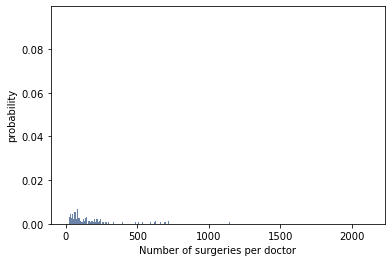

In [177]:
hist_procedures = thinkstats2.Hist(Number_of_surgeries)
pmf_procedures = thinkstats2.Pmf(hist_procedures)

thinkplot.Hist(pmf_procedures)
thinkplot.Config(xlabel='Number of surgeries per doctor',ylabel='probability')

Text(0, 0.5, 'Units')

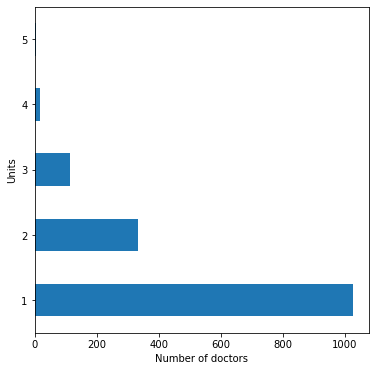

In [178]:
number_units_working = doctors_table['Units'].value_counts()
plt.figure(figsize=(6,6))
number_units_working.plot(kind='barh')
plt.xlabel('Number of doctors')
plt.ylabel('Units')



In [179]:
doctors_table['Units'].value_counts()

1    1028
2     333
3     114
4      18
5       4
Name: Units, dtype: int64

* ### 7.3. Professionals and Number of services where they work<a class="anchor" id="7.3"></a>


Text(0, 0.5, 'Services')

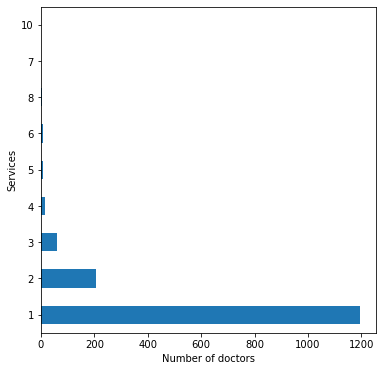

In [180]:
number_units_working = doctors_table['Services'].value_counts()
plt.figure(figsize=(6,6))
number_units_working.plot(kind='barh')
plt.xlabel('Number of doctors')
plt.ylabel('Services')


In [181]:
doctors_table['Services'].value_counts()

1     1194
2      206
3       61
4       15
5        9
6        6
8        3
7        2
10       1
Name: Services, dtype: int64

* ### 7.4. Variation between doctors inside each type of surgery<a class="anchor" id="7.4"></a>



#### Ortopedic example

In [182]:
ortopedic_doctors=df_cuf[df_cuf.Speciality=='ORTOPEDIA']

In [183]:
ortopedic_doctors

CUF_Unit Speciality  N_REG_OPER      Doctor  Local_Patient  \
11           11  ORTOPEDIA       62359  0094051011         523300   
16           11  ORTOPEDIA       61267   778279912        1199375   
21           11  ORTOPEDIA       62131     1470005        1223080   
32           11  ORTOPEDIA       60245  0094051011        2257130   
35           11  ORTOPEDIA       61344  0094051011        2264485   
...         ...        ...         ...         ...            ...   
186961        6  ORTOPEDIA       87901   489248032        2004105   
186966        6  ORTOPEDIA       87116   616043612         925925   
186968        6  ORTOPEDIA       89777   489248032        2458405   
186976        6  ORTOPEDIA       88554   381371271        2901575   
186977        6  ORTOPEDIA       87886   514138822        1321920   

         ID_Patient Gender      Birth Date_Surgery      OR  ...  \
11        9467535.0      M 1986-06-25   2017-12-19     BOC  ...   
16       45098515.0      F 1982-05-27   2017-11-03     BOC  ...   
21       73409450.0      F 1950-11-20   2017-12-11     BOC  ...   
32       79011520.0      F 1949-10-09   2017-09-19     BOC  ...   
35      205591460.0      M 1939-03-08   2017-11-07     BOC  ...   
...             ...    ...        ...          ...     ...  ...   
186961          NaN    NaN        NaT   2020-10-16  BOC010  ...   
186966          NaN    NaN        NaT   2020-09-23  BOC010  ...   
186968          NaN    NaN        NaT   2020-11-27  BOC010  ...   
186976          NaN    NaN        NaT   2020-11-04  BOC010  ...   
186977          NaN    NaN        NaT   2020-10-16  BOC010  ...   

       RealSurgeryDuration DUR_PLANEADA TimeRecoveryRoom CUFPlannedDuration  \
11                    15.0     01:00:00             98.0                 60   
16                    39.0     01:00:00            124.0                 60   
21                   144.0     01:30:00            254.0                 90   
32                    41.0     01:00:00            136.0                 60   
35                    60.0     02:00:00             43.0                120   
...                    ...          ...              ...                ...   
186961                70.0     01:30:00            236.0                 90   
186966                77.0     02:00:00              NaN                120   
186968                25.0     01:00:00            186.0                 60   
186976                92.0     02:00:00            253.0                120   
186977               109.0     02:00:00             14.0                120   

       SurgeryNumber SurgeryPerformed_perDoctor DailySurgery_perOR   Age  \
11                 1                        169                  5  31.0   
16                 1                         55                  4  35.0   
21                 1                        237                  5  67.0   
32                 2                        123                  8  66.0   
35                 1                        148                  6  78.0   
...              ...                        ...                ...   ...   
186961             3                        424                  2   NaN   
186966             2                         63                  2   NaN   
186968             1                        463                  2   NaN   
186976             1                         20                  2   NaN   
186977             1                        119                  1   NaN   

        Match Procedures_I  
11      False            1  
16      False            2  
21      False            4  
32      False            1  
35      False            2  
...       ...          ...  
186961  False            2  
186966  False            2  
186968  False            3  
186976  False            1  
186977  False            4  

[40991 rows x 39 columns]

In [184]:
doctors_more50_surgeries=ortopedic_doctors[ortopedic_doctors['Doctor'].map(ortopedic_doctors['Doctor'].value_counts()) > 100]

In [185]:
grouped=doctors_more50_surgeries.groupby(["Doctor"])

In [186]:
Ortopedic_doctors = {"OR Average Time": grouped['RealRoomDuration'].mean() ,"Surgery Average Time ":grouped['RealSurgeryDuration'].mean(),"Surgery St Deviation Time ":grouped['RealSurgeryDuration'].std(), "Average number of procedures": grouped['Procedures_I'].mean() ,"Mean age": grouped['Age'].mean(), "Number of surgeries":grouped['Procedures_I'].count(),"Units where work": grouped['CUF_Unit'].unique()}
pd.DataFrame(Ortopedic_doctors).sort_values(by='Number of surgeries',ascending=False)

OR Average Time  Surgery Average Time   \
Doctor                                               
996354981         77.960516              50.488990   
1900005          102.398230              61.467742   
2900005          101.517094              64.285470   
6150005           58.447668              39.760622   
8440005           83.085556              55.613333   
1470005           88.972098              61.166295   
824133941         77.928315              57.284689   
3800005           91.895969              46.352406   
027579712        104.288301              72.707521   
153353822         77.549107              57.760060   
6050005          135.779610              91.226727   
0250005          165.777108             117.811747   
081994791         62.944700              42.259601   
748284541         65.672868              47.369565   
0094051011        74.985623              48.937700   
9800005          100.773163              65.442492   
63840008          90.495114              64.939641   
7150005           73.898026              46.751645   
904648802         91.905473              67.376451   
072257981         74.221269              46.222985   
729119712        104.931153              71.763793   
5750005           99.039076              60.937611   
436499191         96.118705              63.193490   
561825761         94.967509              71.403131   
191824112         95.098881              60.149813   
675053605         89.026515              52.005682   
533382902        112.124748              74.814141   
489248032         64.580448              44.415133   
214224105        113.991803              78.960986   
078429522        120.099352              95.112311   
9480005          100.390830              73.925602   
347705712        106.500000              76.000000   
409362181         87.859688              54.515625   
6251005          127.774648              72.957746   
236710212        124.339623              92.716981   
344074591         98.524941              62.635492   
44240008          93.282974              60.165468   
19440008          87.723716              56.757946   
433329091         80.639098              54.724311   
730076771         87.669333              59.695187   
966758522        143.861190             107.213675   
941628122        162.274566             117.130058   
194195322         91.218563              53.483483   
191936571         84.858896              59.730061   
209057312        105.056604              65.553459   
999961932        138.958861             102.465190   
818282812         83.669903              59.611650   
7800005          179.386364             117.840909   
580959422         72.937705              49.468852   
218235551         84.026490              57.112957   
778279912         89.285185              61.988848   
117932702         78.123596              51.545113   
5431005           89.969349              56.773946   
58490008         165.100000             133.495833   
032419912         92.453782              62.894068   
522275322         94.282700              62.755274   
882568012        102.258475              66.165957   
8800005          199.207792             135.614719   
450753651        168.044444             125.031111   
3460005          100.968610              61.210762   
230966501         90.230769              63.954751   
717505461         67.191589              40.721698   
043045961         83.408654              56.985294   
063170722         73.835897              51.375000   
419588822        157.851282             115.235897   
083184212        152.729167             112.187500   
1340005           92.668421              59.126316   
827667505         81.417989              60.656085   
347550191        136.048128             103.700535   
366884942         97.268817              76.521505   
207762132         79.811828              49.913978   
147433211         63.378531              39.227273   
30840008        

----

# 8. Units information   <a class="anchor" id="8"></a> 

* ### 8.1. Number of Units<a class="anchor" id="8.1"></a>


In [187]:
number_surgeries_perunit=df_cuf['CUF_Unit'].value_counts()
number_surgeries_perunit

13    44148
14    43837
15    39054
11    15482
16    12511
17    12079
18     8724
12     4644
19     1129
2      1024
21      766
6       357
5        32
8        25
4        17
Name: CUF_Unit, dtype: int64

In [188]:
number_units=df_cuf['CUF_Unit'].nunique()
print('Number of units present: {:.2f} '.format(number_units))

Number of units present: 15.00 


#### Histogram distribution

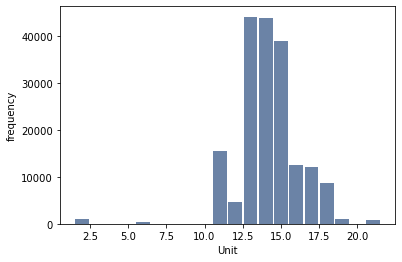

<Figure size 576x432 with 0 Axes>

In [189]:
Unit=df_cuf['CUF_Unit'].astype("category")
hist_unit = thinkstats2.Hist(Unit)
thinkplot.Hist(hist_unit)
thinkplot.Show(xlabel='Unit', ylabel='frequency')

#### Normalization- probability mass function (PMF)
which maps from each value to its probability.

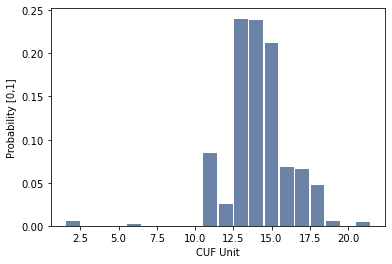

In [190]:
pmf_unit = thinkstats2.Pmf(hist_unit)

thinkplot.Hist(pmf_unit)
thinkplot.Config(xlabel='CUF Unit',ylabel='Probability [0,1]')


plt.savefig('books_read.png')

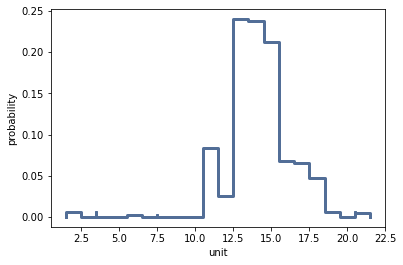

<Figure size 576x432 with 0 Axes>

In [191]:

thinkplot.Pmfs([pmf_unit])
thinkplot.Show(xlabel='unit',ylabel='probability')

#### CDF - cumulative distribution function

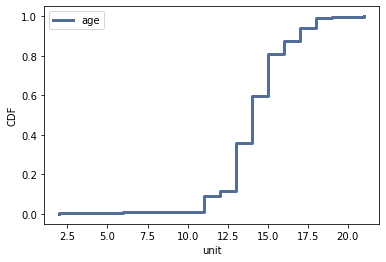

<Figure size 576x432 with 0 Axes>

In [192]:
cdf_unit = thinkstats2.Cdf(Unit, label='age')
thinkplot.Cdf(cdf_unit)
thinkplot.Show(xlabel='unit', ylabel='CDF')

* ### 8.2. Number of blocks and rooms in each unit<a class="anchor" id="8.2"></a>


In [193]:
units=df_cuf['CUF_Unit'].unique()
blocks=[None] * len(units)
room=[None] * len(units)

for i in range(len(units)):
    blocks[i]=df_cuf[df_cuf.CUF_Unit==units[i]]['OR'].nunique()
    
    
for i in range(len(units)):
    room[i]=df_cuf[df_cuf.CUF_Unit==units[i]]['Room'].nunique()

In [194]:
df_cuf['Room'].nunique()


71

In [195]:
d_blocks = {"Units": units, "Number of blocks": blocks,"Number of rooms": room}
pd.DataFrame(d_blocks).sort_values(by='Number of blocks',ascending=False)

Units  Number of blocks  Number of rooms
8     14                 6               24
3     15                 5               15
4     19                 4               13
7     13                 4               21
9      2                 4                8
13     6                 4                7
1     17                 3                4
6     18                 3                5
11     8                 3                8
12     4                 3                3
2     16                 2                3
10     5                 2                2
14    12                 2                4
0     11                 1                2
15    21                 1                3
5   <NA>                 0                0


* ### 8.3. Services distribution per unit<a class="anchor" id="8.3"></a>


D = {}

units=df_cuf['COD_UNIDADE'].unique()
for name in range(len(units)):
    D[name] = df_cuf[df_cuf.COD_UNIDADE==units[name]]


for i in range(len(units)):
    if i==0:
        result_proccedures=pd.DataFrame({D[i].COD_UNIDADE.unique()[0]: D[i]['DESCR_SERVICO'].value_counts()})
    else:
        df_procedures_part_of_day = pd.DataFrame({D[i].COD_UNIDADE.unique()[0]: D[i]['DESCR_SERVICO'].value_counts()})
        #if ((df_procedures_part_of_day.sum()> 50).bool()):
        result_proccedures = pd.concat([result_proccedures, df_procedures_part_of_day], axis=1)

result_proccedures=result_proccedures.transpose()

fig = plt.figure(figsize=(20,50))

for i, (name, row) in enumerate(result_proccedures.iterrows()):
    ax = plt.subplot(9,3, i+1)
    ax.set_title(row.name)
    ax.set_aspect('equal')
    ax.pie(row, labels=row.index)

plt.show()

------

# 9. Services information   <a class="anchor" id="9"></a> 


* ### 9.1. Services distribution <a class="anchor" id="9.1"></a>



In [197]:
nsurgery_service=df_cuf['Speciality'].value_counts()
nsurgery_service

ORTOPEDIA                                   40991
CIRURGIA GERAL                              29610
OFTALMOLOGIA                                28094
OTORRINOLARINGOLOGIA                        18402
UROLOGIA                                    17140
GINECOLOGIA OBSTETRÍCIA                     14055
NEURO-CIRURGIA                              10083
CIR. PLÁSTICA E RECONSTRUTIVA E ESTÉTICA     7391
CIRURGIA VASCULAR                            6851
CIRURGIA PEDIÁTRICA                          3947
DERMATOLOGIA                                 3210
ANGIOGRAFIA                                  3144
CIRURGIA MAXILO-FACIAL                       1680
CIRURGIA CARDÍACA                             684
CIRURGIA TORÁCICA                             667
MEDICINA INTERNA                              352
CARDIOLOGIA                                   324
GASTROENTEROLOGIA                             156
PNEUMOLOGIA                                    71
MEDICINA DENTÁRIA                              52


In [198]:
number_services=df_cuf['Speciality'].nunique()
print('Number of services present: {:.2f} '.format(number_services))

Number of services present: 26.00 


Text(0, 0.5, 'Specialty')

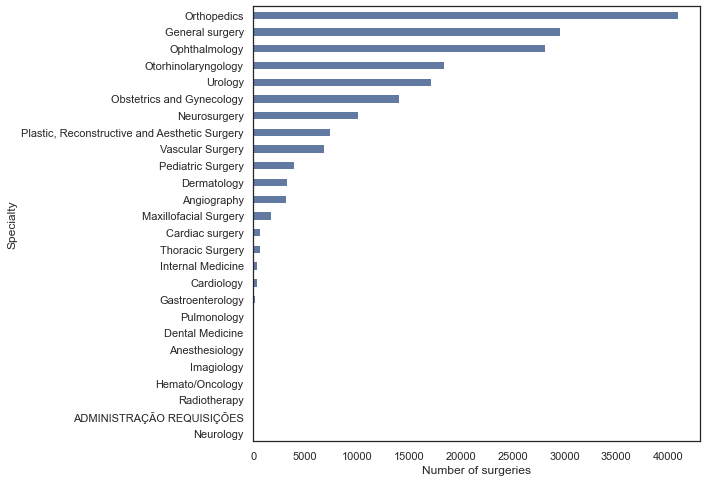

In [69]:
sns.set_theme(style="white")
plt.figure(figsize=(8,8))
df_cuf['Speciality'].value_counts().plot(kind='barh',color="#627aa1")
plt.gca().invert_yaxis()
plt.xlabel('Number of surgeries')
plt.ylabel('Specialty')



* ### 9.2. General overview for each service  <a class="anchor" id="9.2"></a>


In [200]:
df = df_cuf.dropna(subset=['Procedures_I'])
df['Procedures_I']=df['Procedures_I'].astype(int)
grouped = df.groupby(["Speciality"])

d_service = {"OR Average Time": grouped['RealRoomDuration'].mean(),"Surgery St Deviation Time ":grouped['RealSurgeryDuration'].std(),"Average number of procedures": grouped['Procedures_I'].mean(),"Mean age": grouped['Age'].mean(), "Number of surgeries":grouped['Procedures_I'].count()}
pd.DataFrame(d_service).sort_values(by='Number of surgeries',ascending=False)

<ipython-input-200-3c25793f00f1>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



OR Average Time  \
Speciality                                                  
ORTOPEDIA                                       97.749622   
CIRURGIA GERAL                                  87.275312   
OFTALMOLOGIA                                    35.459173   
OTORRINOLARINGOLOGIA                            86.518694   
UROLOGIA                                        68.875613   
GINECOLOGIA OBSTETRÍCIA                         86.155318   
NEURO-CIRURGIA                                 120.814936   
CIR. PLÁSTICA E RECONSTRUTIVA E ESTÉTICA        98.804871   
CIRURGIA VASCULAR                               86.292074   
CIRURGIA PEDIÁTRICA                             61.312896   
DERMATOLOGIA                                    25.382243   
ANGIOGRAFIA                                     60.315304   
CIRURGIA MAXILO-FACIAL                         129.080357   
CIRURGIA CARDÍACA                              259.030702   
CIRURGIA TORÁCICA                              134.293853   
MEDICINA INTERNA                                87.056818   
CARDIOLOGIA                                     67.919753   
GASTROENTEROLOGIA                               69.852564   
PNEUMOLOGIA                                    123.700000   
MEDICINA DENTÁRIA                              137.000000   
ANESTESIOLOGIA                                  69.435897   
IMAGIOLOGIA                                     92.333333   
HEMATO/ONCOLOGIA                                67.272727   
RADIOTERAPIA                                    57.500000   
ADMINISTRAÇÃO REQUISIÇÕES                      128.000000   
NEUROLOGIA                                      21.000000   

                                          Surgery St Deviation Time   \
Speciality                                                             
ORTOPEDIA                                                  48.369411   
CIRURGIA GERAL                                             52.985974   
OFTALMOLOGIA                                               20.184634   
OTORRINOLARINGOLOGIA                                       49.521877   
UROLOGIA                                                   45.415713   
GINECOLOGIA OBSTETRÍCIA                                    45.633021   
NEURO-CIRURGIA                                             61.415211   
CIR. PLÁSTICA E RECONSTRUTIVA E ESTÉTICA                   70.224301   
CIRURGIA VASCULAR                                          41.872110   
CIRURGIA PEDIÁTRICA                                        28.142606   
DERMATOLOGIA                                               10.327960   
ANGIOGRAFIA                                                42.011785   
CIRURGIA MAXILO-FACIAL                                     71.645720   
CIRURGIA CARDÍACA                                          88.964690   
CIRURGIA TORÁCICA                                          65.649324   
MEDICINA INTERNA                                           64.522192   
CARDIOLOGIA                                                31.854297   
GASTROENTEROLOGIA                                          39.756740   
PNEUMOLOGIA                                                42.119324   
MEDICINA DENTÁRIA                                          66.013193   
ANESTESIOLOGIA                                             25.331651   
IMAGIOLOGIA                                                66.757771   
HEMATO/ONCOLOGIA                                           20.148539   
RADIOTERAPIA                                                6.291529   
ADMINISTRAÇÃO REQUISIÇÕES                                  82.615576   
NEUROLOGIA                                                       NaN   

                                          Average number of procedures  \
Speciality                                                               
ORTOPEDIA                                                     1.730105   
CIRURGIA GERAL                                                1.326039   
OFTALMOLOGIA        

In [1]:
156*0.8

124.80000000000001

------

# 10. Time Series Analysis   <a class="anchor" id="10"></a> 

* ### 10.1. Week day distribution  <a class="anchor" id="10.1"></a>


In [70]:
df_cuf['day-of-week']=df_cuf['Date_Surgery'].dt.day_name()

In [71]:
df_cuf['day-of-week'] = pd.Categorical(df_cuf['day-of-week'], categories=
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
    ordered=True)

#sorted by day of week

In [72]:
surgeries_by_day = df_cuf['day-of-week'].value_counts()
surgeries_by_day = surgeries_by_day.sort_index()
surgeries_by_day

Monday       35050
Tuesday      34980
Wednesday    34521
Thursday     35758
Friday       34853
Saturday     10309
Sunday        1508
Name: day-of-week, dtype: int64

Text(0.5, 0, 'Number of surgeries')

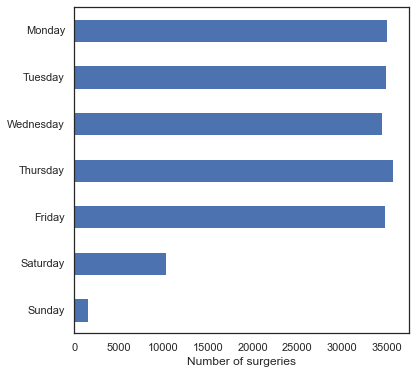

In [73]:
plt.figure(figsize=(6,6))
surgeries_by_day.plot(kind='barh')
plt.gca().invert_yaxis()
plt.xlabel('Number of surgeries')

* Programmed and Urgent surgeries distribution

In [74]:
df_urgent=df_cuf[df_cuf.FLG_PROG_URG=='U']
df_programmed=df_cuf[df_cuf.FLG_PROG_URG=='P']
df_U_P_day_of_day = pd.DataFrame({'Urgent': df_urgent['day-of-week'].value_counts(),
                   'Programmed': df_programmed['day-of-week'].value_counts()})

In [75]:
df_U_P_day_of_day

Urgent  Programmed
Monday       2795       32255
Tuesday      2990       31990
Wednesday    2479       32042
Thursday     2736       33022
Friday       2629       32224
Saturday     1714        8595
Sunday       1099         409

Text(0, 0.5, 'Weekdays')

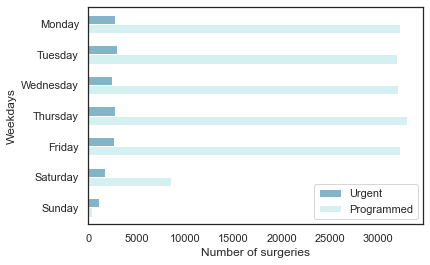

In [93]:
df_U_P_day_of_day.plot.barh(color=['#84B4C8',"#D4F0F0"], width=0.6)
plt.gca().invert_yaxis()
plt.xlabel('Number of surgeries')
plt.ylabel('Weekdays')

* Type of surgeries distribution

In [70]:
d = {}
types_of_services=df_cuf.Speciality.unique()
for name in range(len(types_of_services)):
    d[name] = df_cuf[df_cuf.Speciality==types_of_services[name]]


In [71]:
for i in range(len(types_of_services)):
    if i==0:
        result=pd.DataFrame({d[i].Speciality.unique()[0]: d[i]['day-of-week'].value_counts()})
    else:
        df_service_day_of_day = pd.DataFrame({d[i].Speciality.unique()[0]: d[i]['day-of-week'].value_counts()})
        if ((df_service_day_of_day.sum()> 1000).bool()):
            result = pd.concat([result, df_service_day_of_day], axis=1)
    

In [53]:
df_cuf=df_cuf.replace(to_replace ="PNEUMOLOGIA", value ="Pulmonology")
df_cuf=df_cuf.replace(to_replace ="CIRURGIA CARDÍACA", value ="Cardiac surgery")
df_cuf=df_cuf.replace(to_replace ="DERMATOLOGIA", value ="Dermatology")
df_cuf=df_cuf.replace(to_replace ="CIRURGIA PEDIÁTRICA", value ="Pediatric Surgery")
df_cuf=df_cuf.replace(to_replace ="MEDICINA INTERNA", value ="Internal Medicine")
df_cuf=df_cuf.replace(to_replace ="CARDIOLOGIA", value ="Cardiology")
df_cuf=df_cuf.replace(to_replace ="GINECOLOGIA OBSTETRÍCIA", value ="Obstetrics and Gynecology")
df_cuf=df_cuf.replace(to_replace ="OTORRINOLARINGOLOGIA", value ="Otorhinolaryngology")
df_cuf=df_cuf.replace(to_replace ="CIRURGIA GERAL", value ="General surgery")
df_cuf=df_cuf.replace(to_replace ="OFTALMOLOGIA", value ="Ophthalmology")
df_cuf=df_cuf.replace(to_replace ="ORTOPEDIA", value ="Orthopedics")
df_cuf=df_cuf.replace(to_replace ="CIRURGIA VASCULAR", value ="Vascular Surgery")
df_cuf=df_cuf.replace(to_replace ="UROLOGIA", value ="Urology")
df_cuf=df_cuf.replace(to_replace ="NEURO-CIRURGIA", value ="Neurosurgery")
df_cuf=df_cuf.replace(to_replace ="MEDICINA DENTÁRIA", value ="Dental Medicine")
df_cuf=df_cuf.replace(to_replace ="CIR. PLÁSTICA E RECONSTRUTIVA E ESTÉTICA", value ="Plastic, Reconstructive and Aesthetic Surgery")
df_cuf=df_cuf.replace(to_replace ="CIRURGIA MAXILO-FACIAL", value ="Maxillofacial Surgery")
df_cuf=df_cuf.replace(to_replace ="ANESTESIOLOGIA", value ="Anesthesiology")
df_cuf=df_cuf.replace(to_replace ="ANGIOGRAFIA", value ="Angiography")
df_cuf=df_cuf.replace(to_replace ="CIRURGIA TORÁCICA", value ="Thoracic Surgery")
df_cuf=df_cuf.replace(to_replace ="GASTROENTEROLOGIA", value ="Gastroenterology")
df_cuf=df_cuf.replace(to_replace ="IMAGIOLOGIA", value ="Imagiology")
df_cuf=df_cuf.replace(to_replace ="RADIOTERAPIA", value ="Radiotherapy")
df_cuf=df_cuf.replace(to_replace ="HEMATO/ONCOLOGIA", value ="Hemato/Oncology")
df_cuf=df_cuf.replace(to_replace ="NEUROLOGIA", value ="Neurology")

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\missing.py:56: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\missing.py:56: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\missing.py:56: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\missing.py:56: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\missing.py:56: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

C:\Users\Asus\a

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Monday'),
  Text(1, 0, 'Tuesday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Friday'),
  Text(5, 0, 'Saturday'),
  Text(6, 0, 'Sunday')])

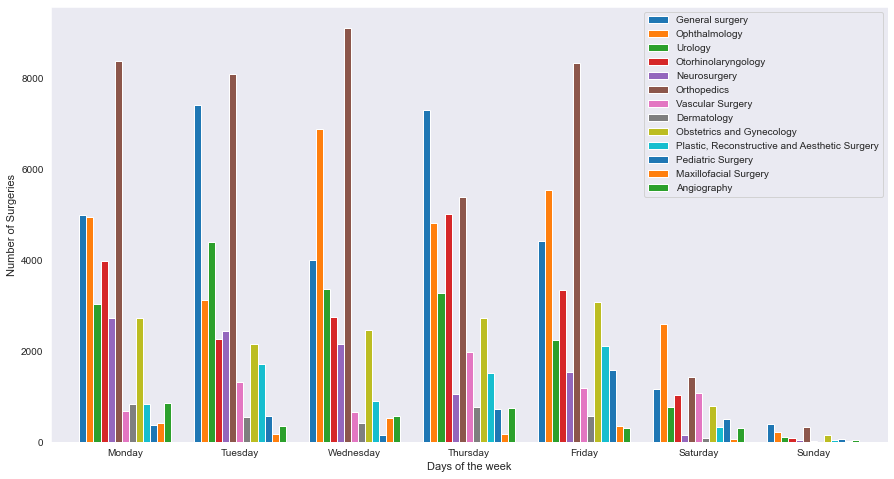

In [73]:
result.plot(kind='bar',figsize=(15, 8),width=0.8)
plt.ylabel('Number of Surgeries',fontsize=11)
plt.xlabel('Days of the week',fontsize=11)
plt.xticks(rotation = 360)

Text(0, 0.5, 'Percentage of each surgery (%)')

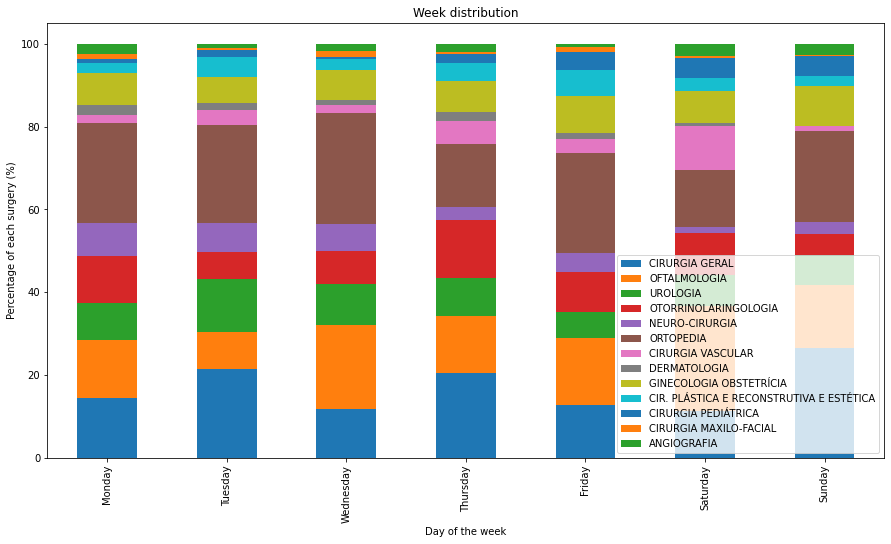

In [18]:
stacked_data = result.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="bar", stacked=True,figsize=(15, 8))
plt.title("Week distribution")
plt.xlabel("Day of the week")
plt.ylabel("Percentage of each surgery (%)")

* Type of procedures

In [19]:
D = {}

data=df_cuf[df_cuf.I1.str.len()==8]

types_proccedures=data.I1.astype(str).str[:2].unique()
for name in range(len(types_proccedures)):
    D[name] = df_cuf[df_cuf.I1.astype(str).str[:2]==types_proccedures[name]]


In [20]:
for i in range(len(types_proccedures)):
    if i==0:
        result_procedures=pd.DataFrame({D[i].I1.astype(str).str[:2].unique()[0]: D[i]['day-of-week'].value_counts()})
    else:
        df_procedures_day = pd.DataFrame({D[i].I1.astype(str).str[:2].unique()[0]: D[i]['day-of-week'].value_counts()})
        if ((df_procedures_day.sum()> 3000).bool()):
            result_procedures = pd.concat([result_procedures, df_procedures_day], axis=1)
    

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Monday'),
  Text(1, 0, 'Tuesday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Friday'),
  Text(5, 0, 'Saturday'),
  Text(6, 0, 'Sunday')])

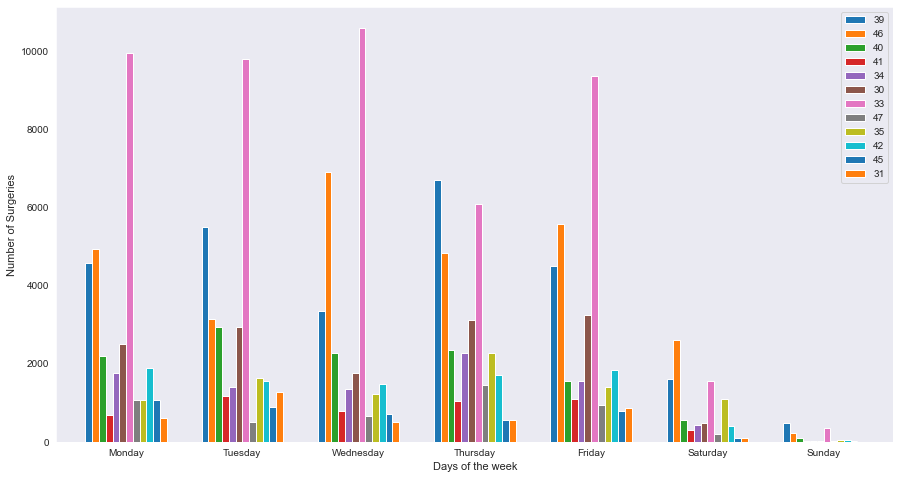

In [65]:
result_procedures.plot(kind='bar',figsize=(15, 8),width=0.7)
plt.ylabel('Number of Surgeries',fontsize=11)
plt.xlabel('Days of the week',fontsize=11)
plt.xticks(rotation = 360)


Text(0, 0.5, 'Percentage of each procedure (%)')

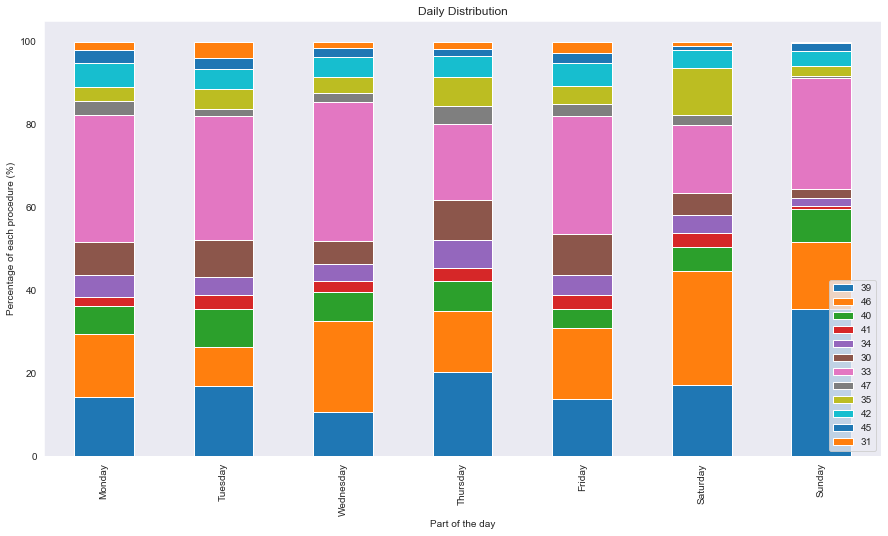

In [22]:

sns.set_style("dark")
stacked_data = result_procedures.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="bar", stacked=True,figsize=(15, 8))
plt.title("Daily Distribution")
plt.xlabel("Part of the day")
plt.ylabel("Percentage of each procedure (%)")

------


* ### 10.2. Month distribution  <a class="anchor" id="10.2"></a>


In [23]:
df_month=df_cuf['Date_Surgery'].dt.month

In [24]:
surgeries_by_month = df_month.value_counts()
surgeries_by_month = surgeries_by_month.sort_index()
surgeries_by_month

1     17819
2     16335
3     15592
4     12607
5     15424
6     14643
7     15802
8     11229
9     16138
10    18592
11    18119
12    14679
Name: Date_Surgery, dtype: int64

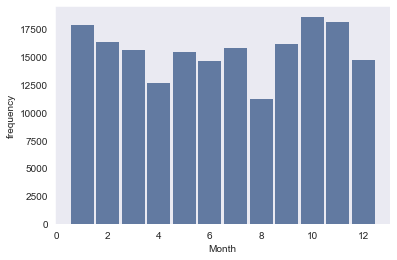

<Figure size 576x432 with 0 Axes>

In [25]:
Months=df_month
hist_per_month = thinkstats2.Hist(Months)
thinkplot.Hist(hist_per_month)
thinkplot.Show(xlabel='Month', ylabel='frequency')

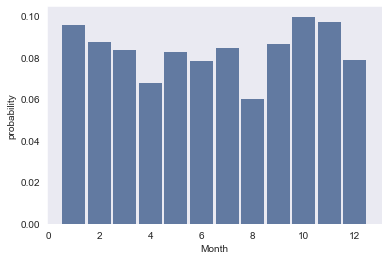

In [26]:
pmf_month = thinkstats2.Pmf(hist_per_month)
thinkplot.Hist(pmf_month)
thinkplot.Config(xlabel='Month',ylabel='probability')

* Programmed and Urgent surgeries distribution

In [27]:
df_urgent=df_cuf[df_cuf.FLG_PROG_URG=='U']
df_programmed=df_cuf[df_cuf.FLG_PROG_URG=='P']


In [28]:
surgeries_by_month_U = df_urgent['Date_Surgery'].dt.month.value_counts()
surgeries_by_month_U = surgeries_by_month_U.sort_index()
surgeries_by_month_U

1     1435
2     1311
3     1356
4     1198
5     1356
6     1361
7     1437
8     1260
9     1504
10    1559
11    1363
12    1302
Name: Date_Surgery, dtype: int64

In [29]:
surgeries_by_month_p = df_programmed['Date_Surgery'].dt.month.value_counts()
surgeries_by_month_p = surgeries_by_month_p.sort_index()
surgeries_by_month_p

1     16384
2     15024
3     14236
4     11409
5     14068
6     13282
7     14365
8      9969
9     14634
10    17033
11    16756
12    13377
Name: Date_Surgery, dtype: int64

In [30]:
df_U_P_monthly = pd.DataFrame({'Urgent': surgeries_by_month_U,
                   'Programmed': surgeries_by_month_p})

In [31]:
df_U_P_monthly

Urgent  Programmed
1     1435       16384
2     1311       15024
3     1356       14236
4     1198       11409
5     1356       14068
6     1361       13282
7     1437       14365
8     1260        9969
9     1504       14634
10    1559       17033
11    1363       16756
12    1302       13377

Text(0.5, 0, 'Number of surgeries')

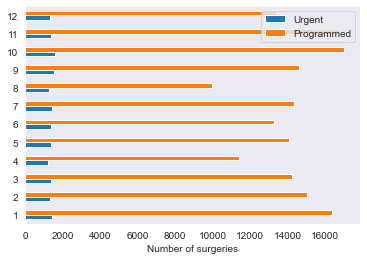

In [32]:
df_U_P_monthly.plot.barh()
plt.xlabel('Number of surgeries')

Text(0, 0.5, 'U vs P (%)')

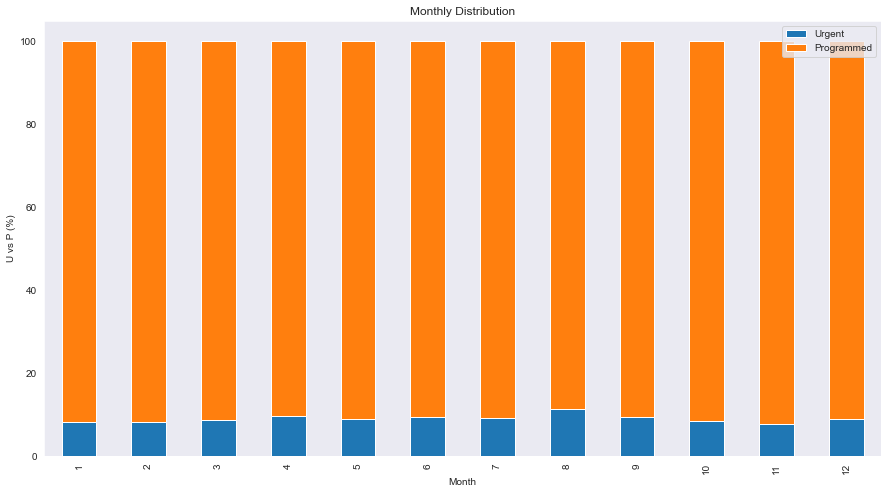

In [33]:

sns.set_style("dark")
stacked_data = df_U_P_monthly.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="bar", stacked=True,figsize=(15, 8))
plt.title("Monthly Distribution")
plt.xlabel("Month")
plt.ylabel("U vs P (%)")

-------

* ### 10.3. Daily distribution  <a class="anchor" id="10.3"></a>


In [82]:

df_cuf['HR_start_Room']=pd.to_datetime(df_cuf['HR_start_Room']) #conversion to datatime


In [83]:
df_cuf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186979 entries, 0 to 186978
Data columns (total 41 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   CUF_Unit                    183829 non-null  object        
 1   Speciality                  186979 non-null  category      
 2   N_REG_OPER                  186979 non-null  int64         
 3   Doctor                      186979 non-null  object        
 4   Local_Patient               186979 non-null  int64         
 5   ID_Patient                  186117 non-null  float64       
 6   Gender                      186061 non-null  object        
 7   Birth                       186117 non-null  datetime64[ns]
 8   Date_Surgery                186979 non-null  datetime64[ns]
 9   OR                          186979 non-null  object        
 10  Room                        186978 non-null  object        
 11  Anesthesia                  186970 non-

In [84]:
def f(x):
    if (x >= 4) and (x < 8):
        return 'Early Morning(5-8)'
    elif (x >= 8) and (x < 12 ):
        return 'Morning(9-12)'
    elif (x >= 12) and (x < 16):
        return'Noon(13-16)'
    elif (x >= 16) and (x < 20) :
        return 'Eve(17-20)'
    elif (x >= 20) and (x < 24):
        return'Night(21-24)'
    elif (x < 4):
        return'Late Night(1-4)'

In [85]:
df_cuf['part_of_day'] = df_cuf['HR_start_Room'].dt.hour.apply(f)

In [86]:
df_cuf['part_of_day'] = pd.Categorical(df_cuf.part_of_day, categories=
    ['Early Morning(5-8)','Morning(9-12)','Noon(13-16)','Eve(17-20)','Night(21-24)','Late Night(1-4)'],
    ordered=True)

In [87]:
part_of_day_counts = df_cuf['part_of_day'].value_counts()
part_of_day_counts = part_of_day_counts.sort_index()
part_of_day_counts

Early Morning(5-8)      486
Morning(9-12)         56786
Noon(13-16)           51823
Eve(17-20)            52648
Night(21-24)          24190
Late Night(1-4)        1046
Name: part_of_day, dtype: int64

Text(0.5, 0, 'Number of surgeries')

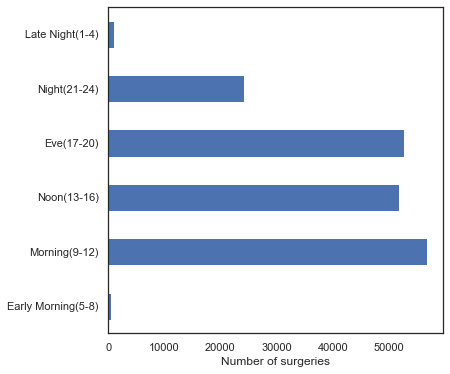

In [89]:
plt.figure(figsize=(6,6))
part_of_day_counts.plot(kind='barh')
plt.xlabel('Number of surgeries')

* Programmed and Urgent surgeries distrubution

In [90]:
df_urgent=df_cuf[df_cuf.FLG_PROG_URG=='U']
df_programmed=df_cuf[df_cuf.FLG_PROG_URG=='P']
df_U_P_part_of_day = pd.DataFrame({'Urgent': df_urgent['part_of_day'].value_counts(),
                   'Programmed': df_programmed['part_of_day'].value_counts()})

In [91]:
df_U_P_part_of_day

Urgent  Programmed
Early Morning(5-8)      98         388
Morning(9-12)         3027       53759
Noon(13-16)           3415       48408
Eve(17-20)            4239       48409
Night(21-24)          4928       19262
Late Night(1-4)        735         311

Text(0, 0.5, 'Part of the day')

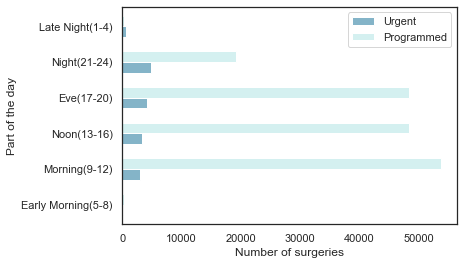

In [95]:
df_U_P_part_of_day.plot.barh(color=['#84B4C8',"#D4F0F0"], width=0.6)
plt.xlabel('Number of surgeries')
plt.ylabel('Part of the day')

* Type of surgeries distribution

In [44]:
d = {}
types_of_services=df_cuf.Speciality.unique()
for name in range(len(types_of_services)):
    d[name] = df_cuf[df_cuf.Speciality==types_of_services[name]]


In [45]:
for i in range(len(types_of_services)):
    if i==0:
        result=pd.DataFrame({d[i].Speciality.unique()[0]: d[i]['part_of_day'].value_counts()})
    else:
        df_service_day_of_day = pd.DataFrame({d[i].Speciality.unique()[0]: d[i]['part_of_day'].value_counts()})
        if ((df_service_day_of_day.sum()> 1000).bool()):
            result = pd.concat([result, df_service_day_of_day], axis=1)
    

Text(0, 0.5, 'Number of surgeries')

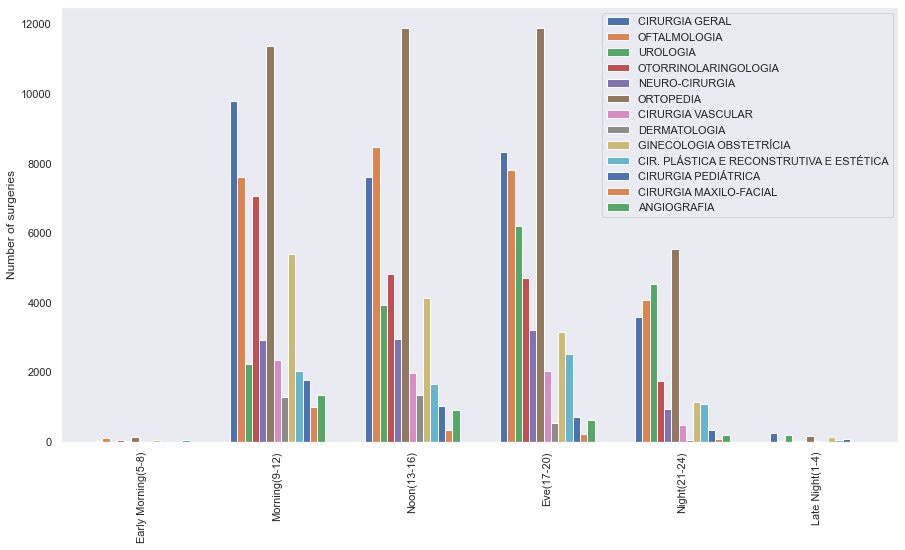

In [46]:
result.plot(kind='bar',figsize=(15, 8),width=0.7)
plt.ylabel('Number of surgeries')

Text(0, 0.5, 'Percentage of each surgery (%)')

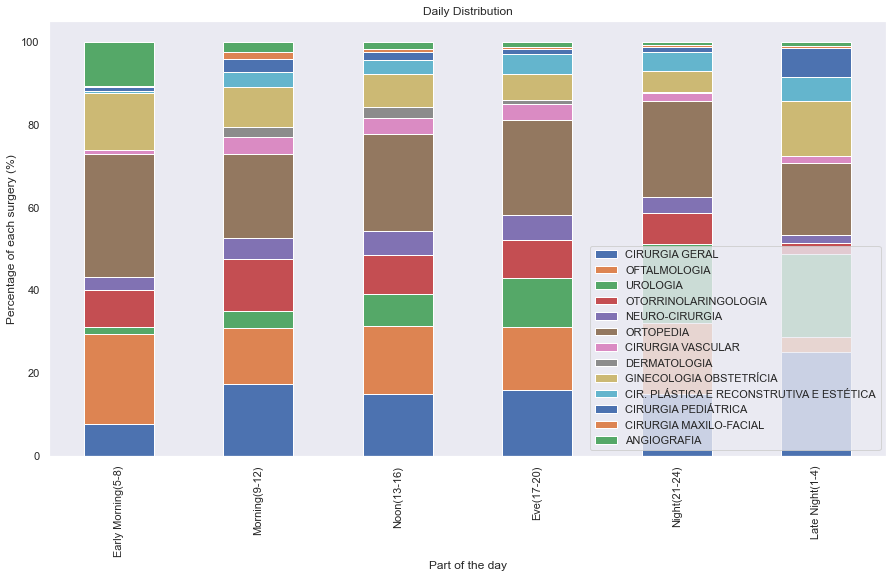

In [47]:
sns.set_style("dark")
stacked_data = result.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="bar", stacked=True,figsize=(15, 8))
plt.title("Daily Distribution")
plt.xlabel("Part of the day")
plt.ylabel("Percentage of each surgery (%)")


* Type of proccedures

In [48]:
D = {}

data=df_cuf[df_cuf.I1.str.len()==8]

types_proccedures=data.I1.astype(str).str[:2].unique()
for name in range(len(types_proccedures)):
    D[name] = df_cuf[df_cuf.I1.astype(str).str[:2]==types_proccedures[name]]


In [49]:
for i in range(len(types_proccedures)):
    if i==0:
        result_proccedures=pd.DataFrame({D[i].I1.astype(str).str[:2].unique()[0]: D[i]['part_of_day'].value_counts()})
    else:
        df_procedures_part_of_day = pd.DataFrame({D[i].I1.astype(str).str[:2].unique()[0]: D[i]['part_of_day'].value_counts()})
        if ((df_procedures_part_of_day.sum()> 3000).bool()):
            result_proccedures = pd.concat([result_proccedures, df_procedures_part_of_day], axis=1)
    

In [50]:
result_proccedures

39    46    40    41    34    30     33    47    35  \
Early Morning(5-8)    48   104     5     4     5     5    153    20    12   
Morning(9-12)       9097  7673  1569  1395  3032  4568  13446  2072  2867   
Noon(13-16)         6705  8484  2677  1254  2188  4141  13493  1229  2680   
Eve(17-20)          7060  7838  4231  1614  2397  3962  14047  1240  2518   
Night(21-24)        3474  4069  3323   791  1165  1366   6388   278   626   
Late Night(1-4)      326    38   174    23    17    60    206     0    20   

                      42    45    31  
Early Morning(5-8)     7     5     1  
Morning(9-12)       3686  1199  1455  
Noon(13-16)         2433  1412  1066  
Eve(17-20)          2034  1174  1099  
Night(21-24)         721   321   294  
Late Night(1-4)       42    13     4

Text(0, 0.5, 'Number of surgeries')

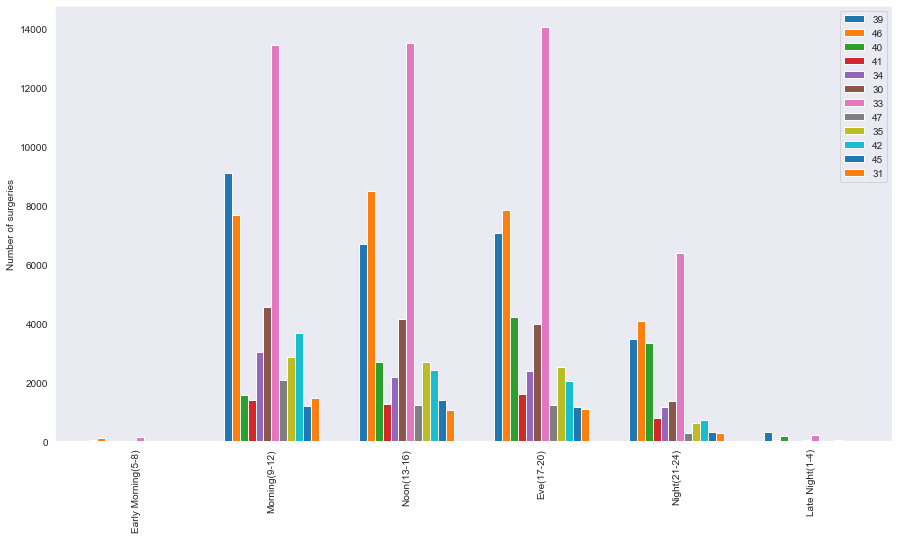

In [51]:
result_proccedures.plot(kind='bar',figsize=(15, 8),width=0.7)
plt.ylabel('Number of surgeries')

Text(0, 0.5, 'Percentage of each surgery (%)')

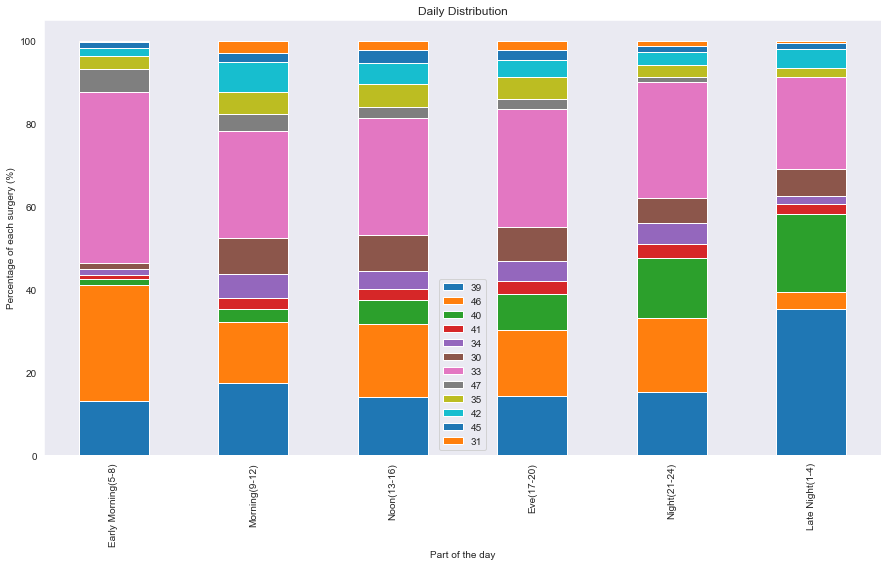

In [52]:
sns.set_style("dark")
stacked_data = result_proccedures.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="bar", stacked=True,figsize=(15, 8))
plt.title("Daily Distribution")
plt.xlabel("Part of the day")
plt.ylabel("Percentage of each surgery (%)")



----

# 11. Procedures (second part)   <a class="anchor" id="11"></a>

* ### 11.add Distribution of proccedures in units  <a class="anchor" id="11.add"></a>


In [246]:
D = {}

data=df_cuf[df_cuf.I1.str.len()==8]

types_proccedures=data.I1.astype(str).str[:4].unique()
for name in range(len(types_proccedures)):
    D[name] = df_cuf[df_cuf.I1.astype(str).str[:4]==types_proccedures[name]]


In [247]:
for i in range(len(types_proccedures)):
    if i==0:
        result_proccedures=pd.DataFrame({D[i].I1.astype(str).str[:4].unique()[0]: D[i]['CUF_Unit'].value_counts()})
    else:
        df_procedures_part_of_day = pd.DataFrame({D[i].I1.astype(str).str[:4].unique()[0]: D[i]['CUF_Unit'].value_counts()})
        if ((df_procedures_part_of_day.sum()> 3000).bool()):
            result_proccedures = pd.concat([result_proccedures, df_procedures_part_of_day], axis=1)
    

In [40]:
sns.set_style("dark")
stacked_data = result_proccedures.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="bar", stacked=True,figsize=(15, 8))
plt.title("Unit Distribution")
plt.xlabel("Units")
plt.ylabel("Percentage of each proccedure (%)")


NameError: name 'result_proccedures' is not defined

* ### 11.1. Distribution of performed surgeries by procedures  <a class="anchor" id="11.1"></a>

In [249]:
D = {}

data=df_cuf[df_cuf.I1.str.len()==8]

types_proccedures=data.I1.astype(str).str[:4].unique()
for name in range(len(types_proccedures)):
    D[name] = df_cuf[df_cuf.I1.astype(str).str[:4]==types_proccedures[name]]

    

In [250]:
for i in range(len(types_proccedures)):
    if i==0:
        result_proccedures=pd.DataFrame({D[i].I1.astype(str).str[:4].unique()[0]: D[i]['Speciality'].value_counts()})
    else:
        df_procedures_part_of_day = pd.DataFrame({D[i].I1.astype(str).str[:4].unique()[0]: D[i]['Speciality'].value_counts()})
        #if ((df_procedures_part_of_day.sum()> 1000).bool()):
        result_proccedures = pd.concat([result_proccedures, df_procedures_part_of_day], axis=1)
    

In [251]:
result_proccedures=result_proccedures.transpose()
result_proccedures['ORTOPEDIA'].sort_values(ascending=False)[0:8]

3308    13200
3304     5270
3306     4486
3307     4375
3310     3223
3309     2708
3303     2332
4509     1559
Name: ORTOPEDIA, dtype: int64

<AxesSubplot:>

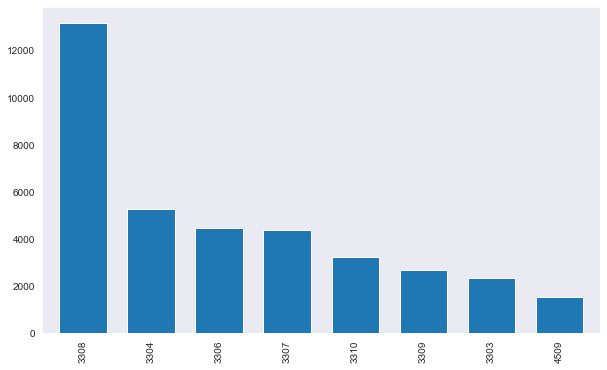

In [252]:
plt.show()
procedure_precedence=result_proccedures['ORTOPEDIA'].sort_values(ascending=False)[0:8]
number_surgeries=len(df_cuf[df_cuf.Speciality=='ORTOPEDIA'])
procedure_precedence.plot(kind='bar',figsize=(10, 6),width=0.7)


<AxesSubplot:>

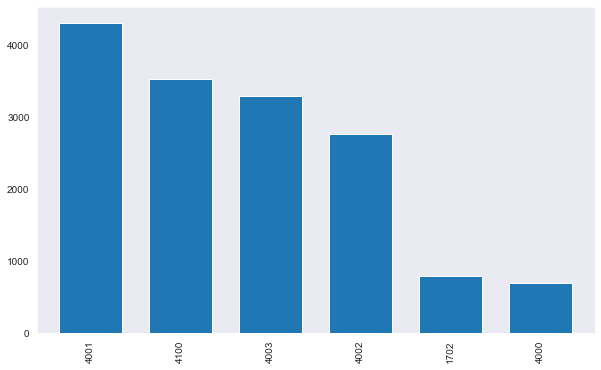

In [253]:
plt.show()
procedure_precedence=result_proccedures['UROLOGIA'].sort_values(ascending=False)[0:6]
number_surgeries=len(df_cuf[df_cuf.Speciality=='UROLOGIA'])
procedure_precedence.plot(kind='bar',figsize=(10, 6),width=0.7)

* Number of procedures in each type of surgery

In [254]:
result_proccedures=result_proccedures.transpose()
result_proccedures=result_proccedures.fillna(0)

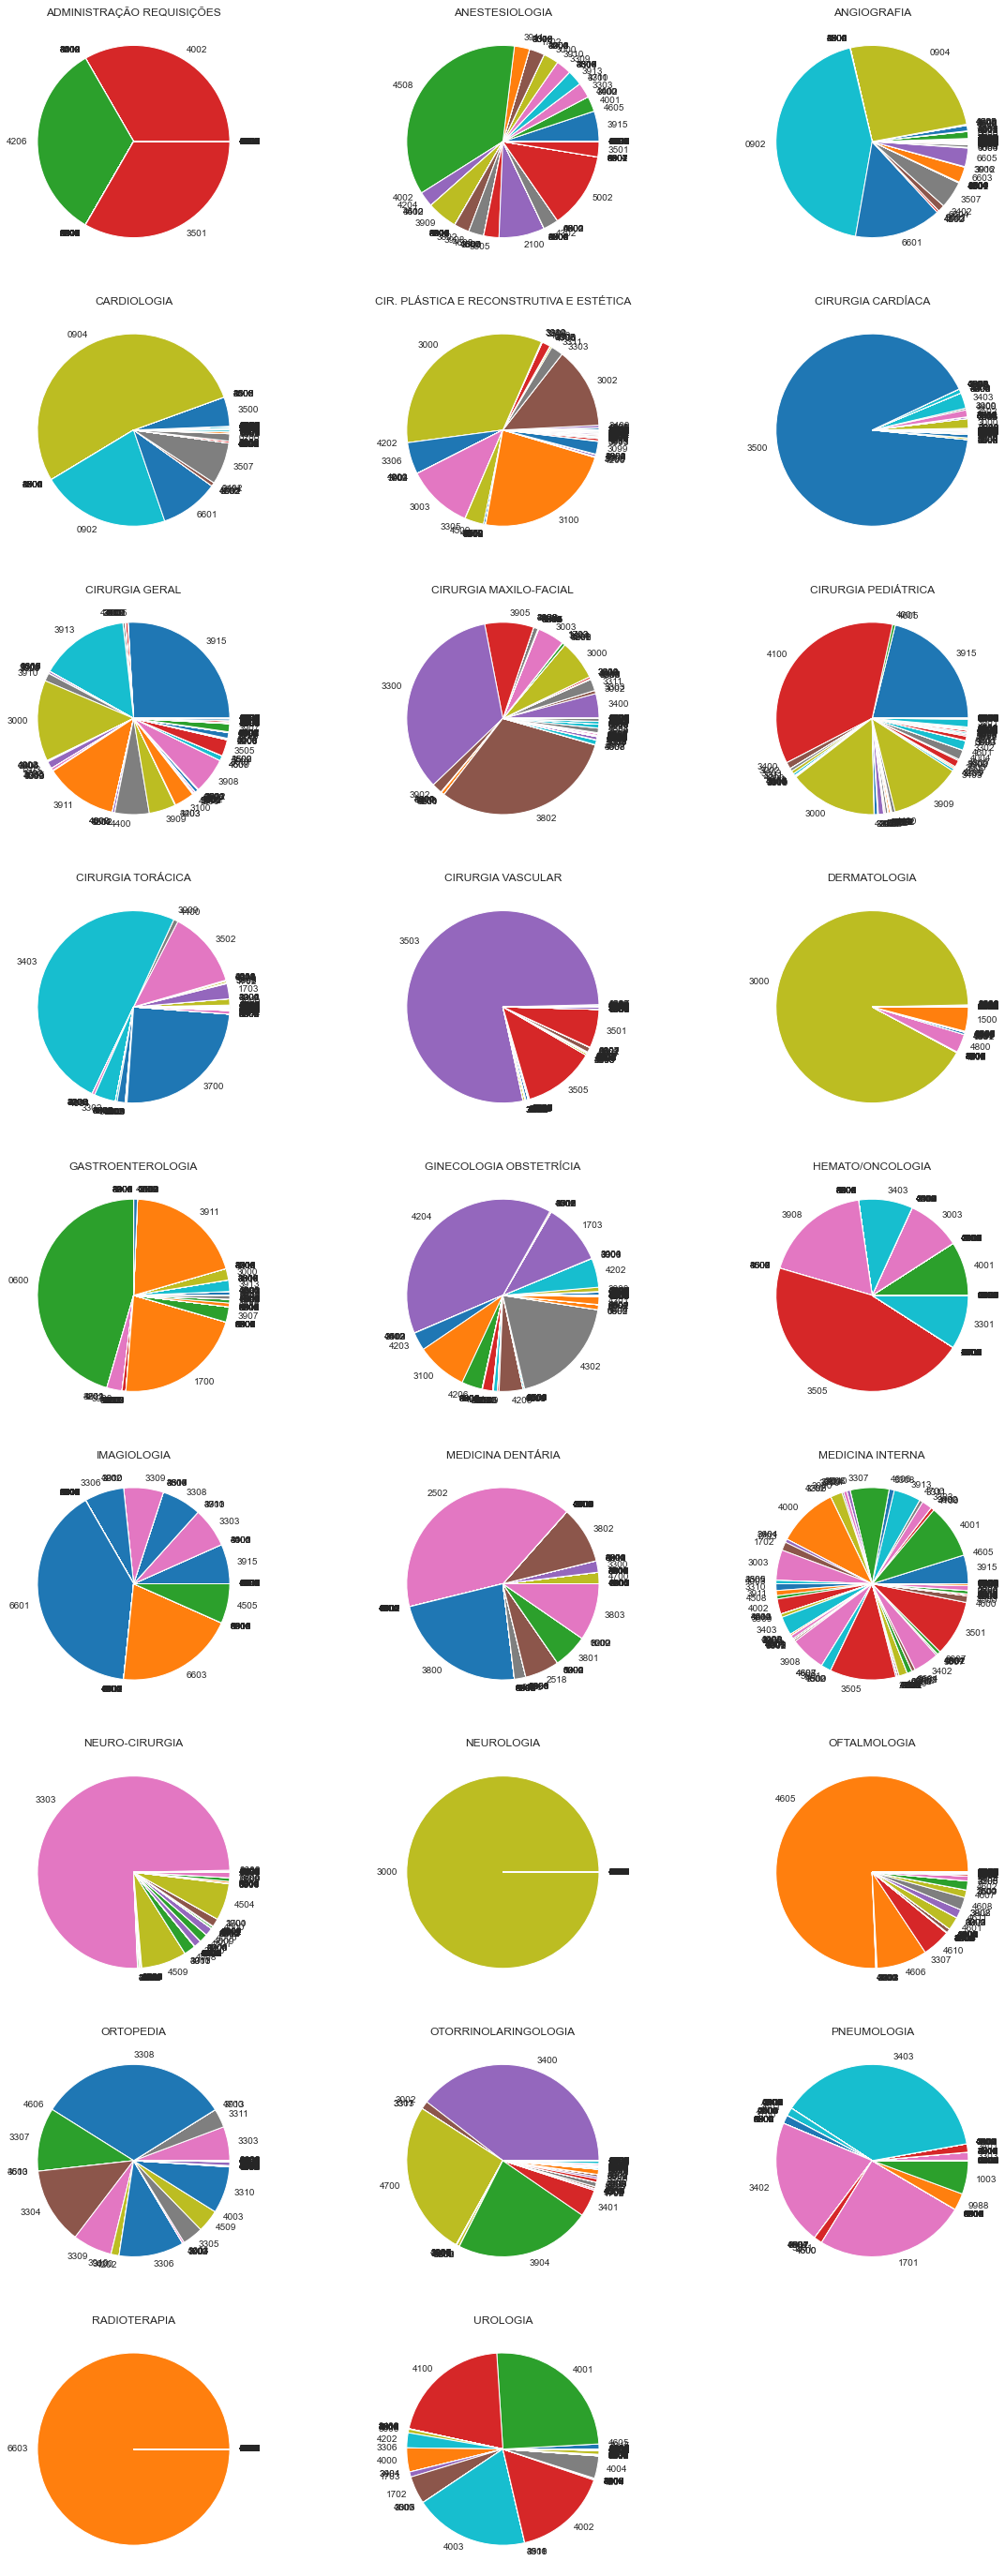

In [255]:
fig = plt.figure(figsize=(20,50))

for i, (name, row) in enumerate(result_proccedures.iterrows()):
    ax = plt.subplot(9,3, i+1)
    ax.set_title(row.name)
    ax.set_aspect('equal')
    ax.pie(row, labels=row.index)

plt.show()

* Group by the eight numbers

In [256]:
D = {}

data=df_cuf[df_cuf.I1.str.len()==8]

types_proccedures=data.I1.unique()
for name in range(len(types_proccedures)):
    D[name] = df_cuf[df_cuf.I1==types_proccedures[name]]

    

In [257]:
for i in range(len(types_proccedures)):
    if i==0:
        result_proccedures=pd.DataFrame({D[i].I1.unique()[0]: D[i]['Speciality'].value_counts()})
    else:
        df_procedures_part_of_day = pd.DataFrame({D[i].I1.unique()[0]: D[i]['Speciality'].value_counts()})
        #if ((df_procedures_part_of_day.sum()> 1000).bool()):
        result_proccedures = pd.concat([result_proccedures, df_procedures_part_of_day], axis=1)
    

In [258]:

result_proccedures=result_proccedures.fillna(0)

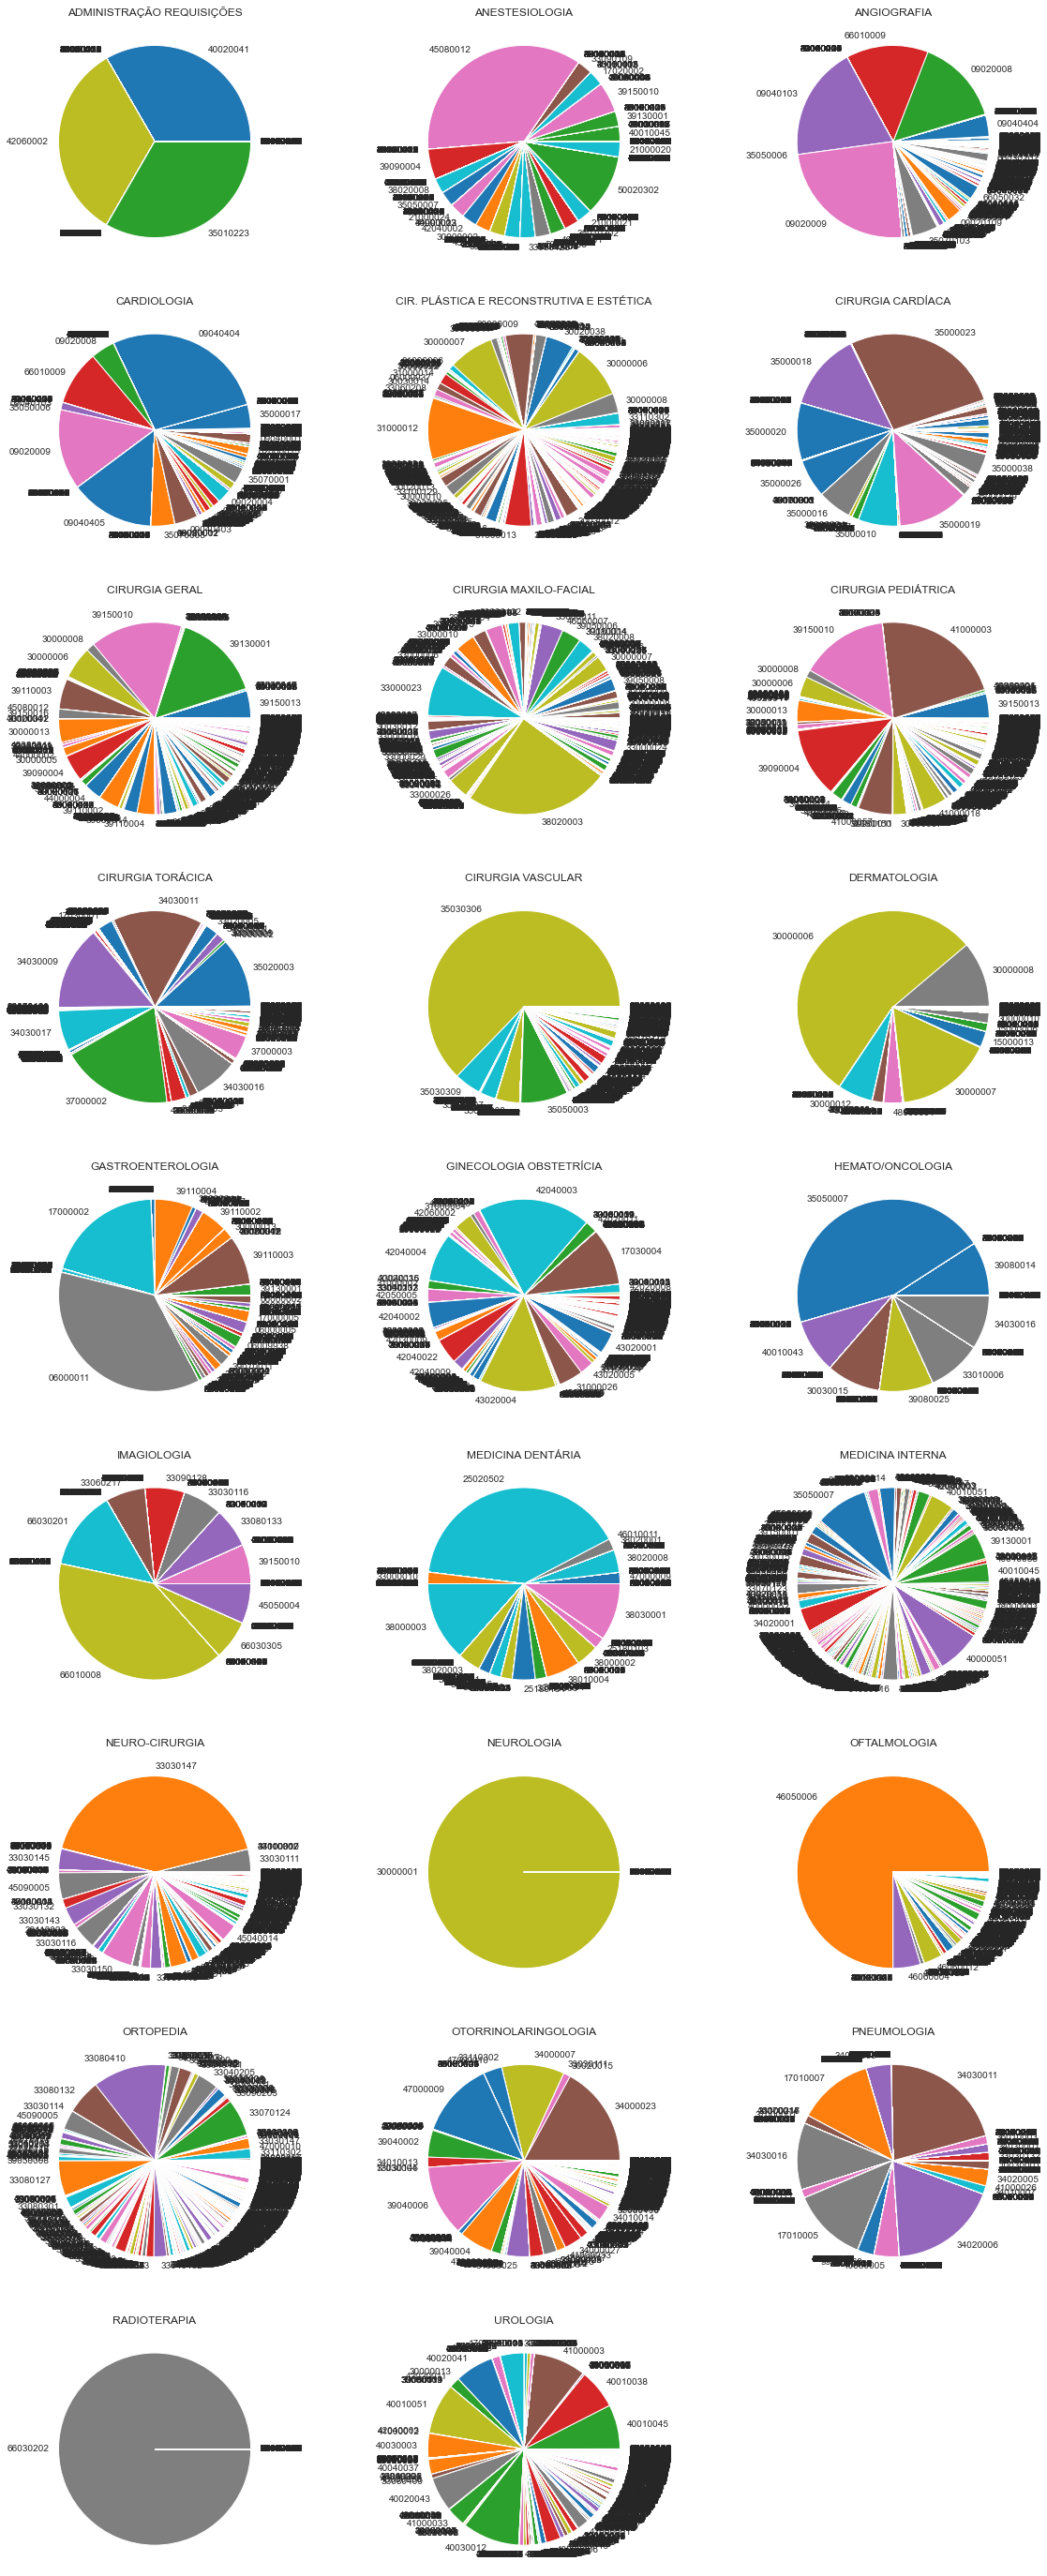

In [259]:
fig = plt.figure(figsize=(20,50))

for i, (name, row) in enumerate(result_proccedures.iterrows()):
    ax = plt.subplot(9,3, i+1)
    ax.set_title(row.name)
    ax.set_aspect('equal')
    ax.pie(row, labels=row.index)

plt.show()


------

* ### 11.2. Probability of a second procedure knowing the first  <a class="anchor" id="11.2"></a>


Create a table with all procedures for each doctor:
    * each column - type of procedure 1
    * each row a type of procedure 2

In [260]:
data=df_cuf[df_cuf.I1.str.len()==8]
data['Type_procedure_1']=df_cuf[df_cuf.I1.str.len()==8].I1.astype(str).str[:4]
data['Type_procedure_2']=df_cuf[df_cuf.I2.str.len()==8].I2.astype(str).str[:4]
data['Type_procedure_3']=df_cuf[df_cuf.I3.str.len()==8].I3.astype(str).str[:4]
data['Type_procedure_4']=df_cuf[df_cuf.I4.str.len()==8].I4.astype(str).str[:4]
data['Type_procedure_5']=df_cuf[df_cuf.I5.str.len()==8].I5.astype(str).str[:4]
data['Type_procedure_6']=df_cuf[df_cuf.I6.str.len()==8].I6.astype(str).str[:4]


<ipython-input-260-b35b3831f4fa>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-260-b35b3831f4fa>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-260-b35b3831f4fa>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-260-b35

In [261]:
Data_procedures = {"Doctors": data['Doctor'], "Procedures": data['Procedures_I'],"Procedure_1": data['Type_procedure_1'],"Procedure_2": data['Type_procedure_2'], "Procedure_3": data['Type_procedure_3'], "Procedure_4": data['Type_procedure_4'], "Procedure_5": data['Type_procedure_5'], "Procedure_6": data['Type_procedure_6']}
Data_procedures=pd.DataFrame(Data_procedures)

# 000 means nan value
Data_procedures['Procedure_1'] = Data_procedures['Procedure_1'].replace(np.nan, '0000')
Data_procedures['Procedure_2'] = Data_procedures['Procedure_2'].replace(np.nan, '0000')
Data_procedures['Procedure_3'] = Data_procedures['Procedure_3'].replace(np.nan, '0000')
Data_procedures['Procedure_4'] = Data_procedures['Procedure_4'].replace(np.nan, '0000')
Data_procedures['Procedure_5'] = Data_procedures['Procedure_5'].replace(np.nan, '0000')
Data_procedures['Procedure_6'] = Data_procedures['Procedure_6'].replace(np.nan, '0000')
Data_procedures

Doctors  Procedures Procedure_1 Procedure_2 Procedure_3 Procedure_4  \
0       132273102           1        3915        0000        0000        0000   
1       093935231           1        4605        0000        0000        0000   
2       775653212           1        4001        0000        0000        0000   
3       462002202           3        4001        4001        4001        0000   
4       462002202           1        4001        0000        0000        0000   
...           ...         ...         ...         ...         ...         ...   
186974  248562262           1        4605        0000        0000        0000   
186975  248562262           1        4605        0000        0000        0000   
186976  381371271           1        3308        0000        0000        0000   
186977  514138822           4        3304        3304        3304        3304   
186978    7310005           1        3003        0000        0000        0000   

       Procedure_5 Procedure_6  
0             0000        0000  
1             0000        0000  
2             0000        0000  
3             0000        0000  
4             0000        0000  
...            ...         ...  
186974        0000        0000  
186975        0000        0000  
186976        0000        0000  
186977        0000        0000  
186978        0000        0000  

[186902 rows x 8 columns]

* #### Probability of each second procedure knowing the first one (P(y|x))

In [262]:
D_procedimento = {}

#Data_procedures_more50=Data_procedures[Data_procedures['Procedure_1'].map(Data_procedures['Procedure_1'].value_counts()) > 50]
#procedures with more than 50 surgeries
types_proccedures=Data_procedures['Procedure_1'].unique()

for name in range(len(types_proccedures)):
    D_procedimento[name] = Data_procedures[Data_procedures.Procedure_1==types_proccedures[name]]
    

D_each={}
for i in range(len(types_proccedures)):
    
        summ=len(D_procedimento[i]['Procedure_1'])
        probability=D_procedimento[i]['Procedure_2'].value_counts()/summ
    
        
        D_each[i] = {types_proccedures[i]: probability}
        D_each[i]=pd.DataFrame(D_each[i])
        
        

In [263]:

for j in range(len(D_procedimento)):
    
    if j==0:
        procedure_after1=D_each[j]
    else:
        procedure_after1=pd.concat([procedure_after1, D_each[j]], axis=1)


In [264]:
procedure_after1=procedure_after1.fillna(0)

Text(0, 0.5, 'probability')

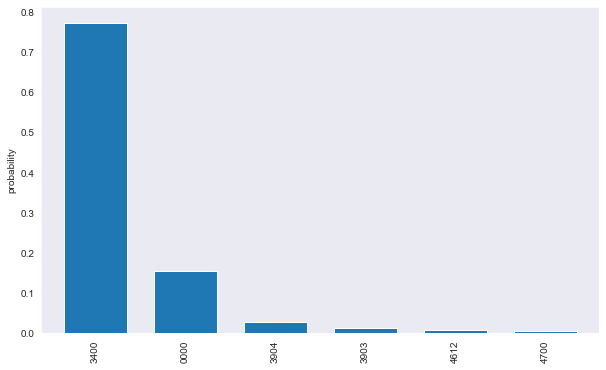

In [265]:
procedure_precedence=procedure_after1['3400'].sort_values(ascending=False)[0:6]
number_surgeries=len(Data_procedures[Data_procedures.Procedure_1=='3400'])
procedure_precedence.plot(kind='bar',figsize=(10, 6),width=0.7)
number_surgeries=len(Data_procedures[Data_procedures.Procedure_1=='3400'])
plt.ylabel('probability')

Text(0, 0.5, 'probability')

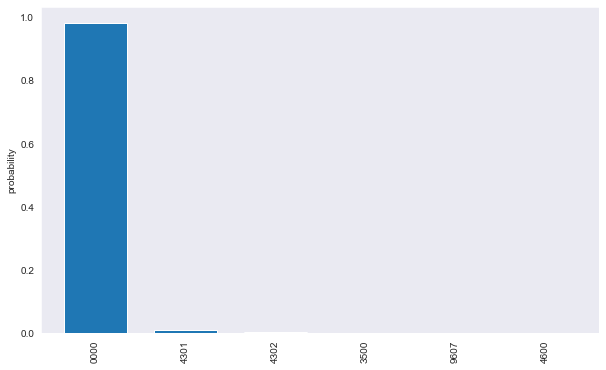

In [266]:
procedure_precedence=procedure_after1['4301'].sort_values(ascending=False)[0:6]
number_surgeries=len(Data_procedures[Data_procedures.Procedure_1=='4301'])
procedure_precedence.plot(kind='bar',figsize=(10, 6),width=0.7)
number_surgeries=len(Data_procedures[Data_procedures.Procedure_1=='4301'])
plt.ylabel('probability')

* #### 11.2.1 Some calculations with probabilities  <a class="anchor" id="11.2.1"></a>


* X is the first procedure
* Y is the second procedure

* Probability of each procedure being the first one (P(x))

In [267]:
probability_procedure1=Data_procedures['Procedure_1'].value_counts()/len(Data_procedures['Procedure_1'])


* P(Y|X)P(X)

In [268]:
indexes=probability_procedure1.index

for i in range(len(probability_procedure1)):
    if i==0:
        probability=pd.DataFrame(procedure_after1[indexes[i]]*probability_procedure1.loc[indexes[i]])
    else:
        probability_colum=pd.DataFrame(procedure_after1[indexes[i]]*probability_procedure1.loc[indexes[i]])
        probability=pd.concat([probability, probability_colum], axis=1)


* P(Y) and P(X) - P(Y)=SUM(P(Y|X)P(X))

In [269]:
probability_procedure2=probability.transpose().sum()
totalprobabilities=pd.concat([pd.DataFrame(probability_procedure1), pd.DataFrame(probability_procedure2)], axis=1)
totalprobabilities.columns = ['P_x', 'P_y']
totalprobabilities=totalprobabilities.fillna(0)

In [270]:
totalprobabilities.sort_values(by='P_y',ascending=False)

P_x       P_y
0000  0.000000  0.618046
3303  0.053258  0.046238
3400  0.039855  0.033798
3308  0.070802  0.026688
3503  0.029202  0.019021
3304  0.028239  0.017303
4001  0.023472  0.016099
3915  0.047014  0.014077
3904  0.022584  0.013344
3310  0.017608  0.012397
3000  0.059138  0.010214
3307  0.023745  0.010048
3100  0.020968  0.009984
3306  0.026335  0.009342
4700  0.025891  0.008914
4611  0.002269  0.008523
1703  0.010819  0.008427
4204  0.030583  0.008224
4100  0.027185  0.006854
3911  0.019620  0.005297
3309  0.014607  0.004173
3908  0.009855  0.004072
3003  0.006688  0.003959
0904  0.005506  0.003922
3507  0.000958  0.003713
3311  0.008657  0.003569
4509  0.013809  0.003531
4004  0.003826  0.003521
4605  0.113685  0.003151
4002  0.015035  0.003087
4202  0.006239  0.003050
3002  0.007175  0.002857
3601  0.002376  0.002825
4610  0.007940  0.002681
3501  0.002793  0.002627
4000  0.004066  0.002595
4003  0.017694  0.002253
1702  0.004355  0.002253
4608  0.003221  0.002215
3300  0.003606  0.002012
3305  0.007747  0.001969
3403  0.002338  0.001685
4205  0.003232  0.001610
6604  0.000514  0.001610
3907  0.002199  0.001568
3913  0.024077  0.001557
4606  0.012761  0.001520
3500  0.003676  0.001445
4607  0.001926  0.001386
4602  0.002279  0.001086
4601  0.003339  0.001049
0902  0.007689  0.001043
4612  0.001386  0.000958
4504  0.003344  0.000856
4800  0.001188  0.000835
3903  0.000926  0.000690
4400  0.010128  0.000599
4508  0.001327  0.000594
3502  0.000589  0.000583
4603  0.001252  0.000556
4501  0.000813  0.000519
3910  0.002146  0.000514
2100  0.002290  0.000460
4206  0.002921  0.000449
3504  0.000091  0.000423
3401  0.004526  0.000423
6601  0.002755  0.000417
3099  0.001841  0.000396
0600  0.000615  0.000391
3802  0.002932  0.000391
3700  0.002429  0.000385
4506  0.000770  0.000375
4500  0.000754  0.000364
4203  0.002311  0.000353
1800  0.000765  0.000353
3909  0.009722  0.000342
4201  0.001808  0.000332
3505  0.009358  0.000326
3912  0.000503  0.000321
6603  0.000530  0.000278
3004  0.000166  0.000273
3905  0.001782  0.000273
3902  0.000583  0.000251
1701  0.000375  0.000219
3901  0.000920  0.000214
3302  0.000631  0.000203
1500  0.000787  0.000203
4609  0.000455  0.000166
3906  0.000198  0.000161
4200  0.000647  0.000150
3001  0.000155  0.000150
3402  0.000385  0.000134
6605  0.000663  0.000134
5001  0.000016  0.000123
4604  0.000251  0.000112
3914  0.000535  0.000102
6007  0.000070  0.000086
1003  0.000043  0.000080
1600  0.000043  0.000080
5002  0.000118  0.000080
4502  0.000203  0.000070
3900  0.000246  0.000059
4505  0.000358  0.000059
3301  0.000150  0.000054
3600  0.000102  0.000054
0200  0.000027  0.000054
6602  0.000043  0.000054
3800  0.000064  0.000048
1700  0.000219  0.000048
4507  0.000519  0.000037
1900  0.000091  0.000037
6002  0.000027  0.000037
4301  0.001022  0.000032
3399  0.000005  0.000032
1200  0.000209  0.000032
6004  0.000032  0.000027
4302  0.014259  0.000027
0700  0.000134  0.000027
0809  0.000037  0.000021
4503  0.000166  0.000021
4600  0.000150  0.000011
3506  0.000005  0.000005
1004  0.000000  0.000005
2000  0.000000  0.000005
3801  0.000016  0.000005
9607  0.000011  0.000005
6200  0.000016  0.000005
6600  0.000000  0.000005
2502  0.000112  0.000005
0802  0.000096  0.000005
3808  0.000054  0.000005
9988  0.000021  0.000000
3200  0.000005  0.000000
6401  0.000070  0.000000
0601  0.000005  0.000000
3805  0.000005  0.000000
1609  0.000064  0.000000
1901  0.000005  0.000000
2518  0.000016  0.000000
1002  0.000005  0.000000
5000  0.000005  0.000000
3803  0.000027  0.000000
0900  0.000016  0.000000
1401  0.000027  0.000000
4300  0.000059  0.000000

* Regra de Bayes P(X|Y) **the posterior probability**

In [271]:
indexes=probability_procedure1.index

for i in range(len(probability_procedure1)):
    if i==0:
        posterior_probability=pd.DataFrame((procedure_after1[indexes[i]]*totalprobabilities['P_x'].loc[indexes[i]]))
        for j in range(len(posterior_probability)):
            index=posterior_probability.index[j]
            posterior_probability[indexes[i]][j]=posterior_probability[indexes[i]][j]/totalprobabilities['P_y'].loc[[index]]
        
    else:
        probability_colum=pd.DataFrame((procedure_after1[indexes[i]]*totalprobabilities['P_x'].loc[indexes[i]]))
        for j in range(len(probability_colum)):
            index=probability_colum.index[j]
            probability_colum[indexes[i]][j]=probability_colum[indexes[i]][j]/totalprobabilities['P_y'].loc[[index]]
        
        posterior_probability=pd.concat([posterior_probability, probability_colum], axis=1)


In [272]:
posterior_probability
#knowing that there is no second procedure, the probability of a first procedure be 4605 is 16%

4605      3308      3000      3303      3915      3400      4204  \
0000  0.166318  0.070918  0.075333  0.011367  0.053154  0.010033  0.039000   
3915  0.000000  0.000380  0.025846  0.000000  0.776891  0.000000  0.018624   
4100  0.000000  0.000000  0.042155  0.000000  0.147541  0.000000  0.000000   
3908  0.000000  0.000000  0.009198  0.000000  0.122208  0.000000  0.015769   
1703  0.000000  0.000635  0.001905  0.000000  0.038095  0.000000  0.365714   
3913  0.000000  0.000000  0.041237  0.000000  0.199313  0.000000  0.003436   
3000  0.000000  0.004715  0.764798  0.000000  0.027763  0.003143  0.002619   
3911  0.000000  0.000000  0.025253  0.003030  0.020202  0.000000  0.000000   
4003  0.000000  0.000000  0.002375  0.000000  0.042755  0.000000  0.000000   
4205  0.000000  0.000000  0.003322  0.000000  0.046512  0.000000  0.418605   
3909  0.000000  0.000000  0.015625  0.000000  0.140625  0.000000  0.156250   
4204  0.000000  0.000000  0.003904  0.000000  0.005205  0.000000  0.093038   
4400  0.000000  0.000000  0.044643  0.000000  0.071429  0.008929  0.000000   
4000  0.000000  0.000000  0.000000  0.000000  0.016495  0.000000  0.084536   
4001  0.000000  0.000000  0.000332  0.000000  0.002326  0.000000  0.000665   
3907  0.000000  0.000000  0.000000  0.000000  0.020478  0.000000  0.000000   
4002  0.000000  0.000000  0.000000  0.000000  0.010399  0.000000  0.020797   
4206  0.000000  0.000000  0.000000  0.000000  0.071429  0.000000  0.250000   
3601  0.000000  0.000000  0.104167  0.000000  0.009470  0.000000  0.005682   
3505  0.000000  0.000000  0.049180  0.000000  0.065574  0.000000  0.000000   
3311  0.000000  0.055472  0.106447  0.076462  0.005997  0.000000  0.000000   
3002  0.000000  0.000000  0.016854  0.000000  0.005618  0.046816  0.000000   
3003  0.000000  0.004054  0.398649  0.000000  0.004054  0.008108  0.000000   
4800  0.000000  0.019231  0.064103  0.006410  0.019231  0.000000  0.000000   
4700  0.000000  0.000000  0.007203  0.000000  0.001200  0.027611  0.000000   
3700  0.000000  0.000000  0.027778  0.000000  0.027778  0.013889  0.000000   
3912  0.000000  0.000000  0.016667  0.000000  0.033333  0.000000  0.000000   
3901  0.000000  0.000000  0.075000  0.000000  0.025000  0.025000  0.000000   
3503  0.000000  0.000000  0.000844  0.000000  0.000281  0.000000  0.000000   
1700  0.000000  0.000000  0.000000  0.000000  0.111111  0.000000  0.000000   
4004  0.000000  0.000000  0.000000  0.000000  0.001520  0.000000  0.000000   
3802  0.000000  0.000000  0.013699  0.027397  0.013699  0.027397  0.000000   
3914  0.000000  0.000000  0.000000  0.000000  0.052632  0.000000  0.000000   
3310  0.000000  0.007769  0.005611  0.000000  0.000432  0.000000  0.000000   
3309  0.000000  0.069231  0.012821  0.000000  0.001282  0.000000  0.000000   
3306  0.000000  0.002864  0.028637  0.000000  0.000573  0.000000  0.000000   
4202  0.000000  0.000000  0.003509  0.000000  0.001754  0.000000  0.236842   
4509  0.000000  0.010606  0.031818  0.003030  0.001515  0.000000  0.000000   
3501  0.000000  0.000000  0.000000  0.000000  0.002037  0.000000  0.000000   
4611  0.970496  0.000000  0.002511  0.000000  0.000000  0.000000  0.000000   
4606  0.591549  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4602  0.630542  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4605  0.129032  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4603  0.634615  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4607  0.119691  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4601  0.051020  0.000000  0.000000  0.000000  0.000000  0.005102  0.000000   
4604  0.285714  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4610  0.007984  0.000000  0.011976  0.000000  0.000000  0.001996  0.000000   
4609  0.032258  0.000000  0.064516  0.000000  0.000000  0.032258  0.000000   
1702  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
6002  0.000000  0.000000  0.0000

* Joint Probability P(X,Y)=P(Y)*P(X)

In [273]:
indexes=totalprobabilities.index

for i in range(len(totalprobabilities)):
    if i==0:
        jointprobability=pd.DataFrame(totalprobabilities['P_x']*totalprobabilities['P_y'].loc[indexes[i]])
        jointprobability = jointprobability.rename(columns = {'P_x': indexes[i]})
    else:
        jointprobability_colum=pd.DataFrame(totalprobabilities['P_x']*totalprobabilities['P_y'].loc[indexes[i]])
        jointprobability_colum = jointprobability_colum.rename(columns = {'P_x': indexes[i]})
        
        jointprobability=pd.concat([jointprobability, jointprobability_colum], axis=1)


In [274]:
jointprobability

4605          3308          3000          3303          3915  \
4605  3.582659e-04  3.034007e-03  1.161171e-03  5.256594e-03  1.600335e-03   
3308  2.231237e-04  1.889543e-03  7.231632e-04  3.273744e-03  9.966697e-04   
3000  1.863664e-04  1.578261e-03  6.040296e-04  2.734428e-03  8.324787e-04   
3303  1.678360e-04  1.421334e-03  5.439709e-04  2.462544e-03  7.497053e-04   
3915  1.481590e-04  1.254698e-03  4.801961e-04  2.173837e-03  6.618104e-04   
3400  1.255988e-04  1.063645e-03  4.070765e-04  1.842826e-03  5.610363e-04   
4204  9.637838e-05  8.161891e-04  3.123707e-04  1.414095e-03  4.305119e-04   
3503  9.202820e-05  7.793492e-04  2.982714e-04  1.350268e-03  4.110801e-04   
3304  8.899319e-05  7.536469e-04  2.884346e-04  1.305737e-03  3.975231e-04   
4100  8.567154e-05  7.255172e-04  2.776689e-04  1.257001e-03  3.826856e-04   
3306  8.299062e-05  7.028136e-04  2.689798e-04  1.217665e-03  3.707102e-04   
4700  8.159114e-05  6.909620e-04  2.644440e-04  1.197132e-03  3.644589e-04   
3913  7.587521e-05  6.425561e-04  2.459181e-04  1.113266e-03  3.389265e-04   
3307  7.482982e-05  6.337031e-04  2.425299e-04  1.097927e-03  3.342568e-04   
4001  7.396990e-05  6.264208e-04  2.397429e-04  1.085310e-03  3.304156e-04   
3904  7.117095e-05  6.027176e-04  2.306712e-04  1.044243e-03  3.179130e-04   
3100  6.607888e-05  5.595950e-04  2.141674e-04  9.695308e-04  2.951673e-04   
3911  6.182987e-05  5.236118e-04  2.003960e-04  9.071880e-04  2.761874e-04   
4003  5.575985e-05  4.722073e-04  1.807225e-04  8.181267e-04  2.490733e-04   
3310  5.549007e-05  4.699227e-04  1.798481e-04  8.141684e-04  2.478682e-04   
4002  4.737985e-05  4.012406e-04  1.535622e-04  6.951727e-04  2.116407e-04   
3309  4.603096e-05  3.898174e-04  1.491903e-04  6.753813e-04  2.056154e-04   
4302  4.493499e-05  3.805360e-04  1.456382e-04  6.593008e-04  2.007198e-04   
4509  4.351865e-05  3.685416e-04  1.410477e-04  6.385198e-04  1.943931e-04   
4606  4.021386e-05  3.405547e-04  1.303366e-04  5.900309e-04  1.796310e-04   
1703  3.409326e-05  2.887219e-04  1.104992e-04  5.002274e-04  1.522910e-04   
4400  3.191817e-05  2.703019e-04  1.034496e-04  4.683138e-04  1.425751e-04   
3908  3.105825e-05  2.630196e-04  1.006625e-04  4.556968e-04  1.387339e-04   
3909  3.063672e-05  2.594499e-04  9.929628e-05  4.495120e-04  1.368510e-04   
3505  2.949017e-05  2.497401e-04  9.558018e-05  4.326893e-04  1.317294e-04   
3311  2.728135e-05  2.310346e-04  8.842123e-05  4.002809e-04  1.218629e-04   
4610  2.502196e-05  2.119007e-04  8.109833e-05  3.671303e-04  1.117704e-04   
3305  2.441496e-05  2.067603e-04  7.913099e-05  3.582242e-04  1.090590e-04   
0902  2.422948e-05  2.051896e-04  7.852986e-05  3.555029e-04  1.082305e-04   
3002  2.261081e-05  1.914817e-04  7.328360e-05  3.317532e-04  1.010001e-04   
3003  2.107645e-05  1.784878e-04  6.831059e-05  3.092405e-04  9.414624e-05   
4202  1.966011e-05  1.664934e-04  6.372012e-05  2.884595e-04  8.781961e-05   
0904  1.735013e-05  1.469312e-04  5.623328e-05  2.545668e-04  7.750118e-05   
3401  1.426454e-05  1.208005e-04  4.623261e-05  2.092940e-04  6.371817e-05   
1702  1.372498e-05  1.162313e-04  4.448386e-05  2.013774e-04  6.130803e-05   
4000  1.281448e-05  1.085206e-04  4.153284e-05  1.880182e-04  5.724091e-05   
4004  1.205573e-05  1.020950e-04  3.907366e-05  1.768856e-04  5.385165e-05   
3500  1.158362e-05  9.809690e-05  3.754350e-05  1.699586e-04  5.174277e-05   
3300  1.136442e-05  9.624063e-05  3.683307e-05  1.667425e-04  5.076365e-05   
4504  1.053822e-05  8.924390e-05  3.415530e-05  1.546203e-04  4.707312e-05   
4601  1.052136e-05  8.910111e-05  3.410065e-05  1.543729e-04  4.699780e-05   
4205  1.018414e-05  8.624531e-05  3.300768e-05  1.494250e-04  4.549146e-05   
4608  1.015042e-05  8.595973e-05  3.289838e-05  1.489302e-04  4.534083e-05   
3802  9.239915e-06  7.824906e-05  2.994736e-05  1.355710e-04  4.127371e-05   
4206  9.206192e-06  7.796348e-05  2.983807e-05  1.350763e-04  4.112308e-05   
3501  8.801524e-06  7.453651e-05  2.

--------

* ### 11.3.  Probability of a third procedure knowing the second one  <a class="anchor" id="11.3"></a>


In [275]:
D_procedimento = {}

Data_procedures_more50=Data_procedures[Data_procedures['Procedure_2'].map(Data_procedures['Procedure_2'].value_counts()) > 50]
#procedures with more than 50 surgeries
types_proccedures=Data_procedures_more50['Procedure_2'].unique()

for name in range(len(types_proccedures)):
    D_procedimento[name] = Data_procedures_more50[Data_procedures_more50.Procedure_1==types_proccedures[name]]
    

D_each={}
for i in range(len(types_proccedures)):
    
        summ=len(D_procedimento[i]['Procedure_2'])
        probability=D_procedimento[i]['Procedure_3'].value_counts()/summ
    
        
        D_each[i] = {types_proccedures[i]: probability}
        D_each[i]=pd.DataFrame(D_each[i])
        

In [276]:
for j in range(len(D_procedimento)):
    
    if j==0:
        procedure_after2=D_each[j]
    else:
        procedure_after2=pd.concat([procedure_after2, D_each[j]], axis=1)


In [277]:
procedure_after2=procedure_after2.fillna(0)
procedure_after2

0000      4001      3400      3303      4700      3308      3307  \
0000   0.0  0.747717  0.550732  0.550809  0.947510  0.888293  0.728256   
4001   0.0  0.167352  0.000000  0.000000  0.000000  0.000000  0.000000   
4000   0.0  0.033333  0.000000  0.000000  0.000000  0.000000  0.000000   
1702   0.0  0.030822  0.000000  0.000000  0.000000  0.000000  0.000000   
4002   0.0  0.007763  0.000000  0.000000  0.000000  0.000000  0.000000   
6002   0.0  0.005479  0.000000  0.000000  0.000000  0.000000  0.000000   
4004   0.0  0.004338  0.000000  0.000000  0.000000  0.000000  0.000000   
4100   0.0  0.000913  0.000134  0.000000  0.000207  0.000000  0.000000   
4003   0.0  0.000685  0.000000  0.000000  0.000000  0.000000  0.000000   
4202   0.0  0.000457  0.000000  0.000000  0.000000  0.000000  0.000000   
3909   0.0  0.000457  0.000000  0.000000  0.000000  0.000000  0.000000   
3915   0.0  0.000457  0.000134  0.000000  0.000000  0.000000  0.000451   
3908   0.0  0.000228  0.000000  0.000000  0.000000  0.000000  0.000000   
3400   0.0  0.000000  0.292971  0.000000  0.025934  0.000000  0.000000   
3904   0.0  0.000000  0.107244  0.000000  0.012863  0.000000  0.000000   
3903   0.0  0.000000  0.022846  0.000000  0.000000  0.000000  0.000000   
4700   0.0  0.000000  0.011826  0.000000  0.010996  0.000000  0.000000   
4612   0.0  0.000000  0.004300  0.000000  0.000000  0.000000  0.000000   
3002   0.0  0.000000  0.002419  0.000000  0.000000  0.000000  0.000000   
1701   0.0  0.000000  0.001747  0.000000  0.000207  0.000000  0.000000   
3300   0.0  0.000000  0.001613  0.000000  0.000000  0.000000  0.000000   
4504   0.0  0.000000  0.000538  0.000000  0.000000  0.000000  0.000000   
3401   0.0  0.000000  0.000538  0.000000  0.000207  0.000000  0.000000   
3003   0.0  0.000000  0.000538  0.000000  0.000000  0.000076  0.000000   
1800   0.0  0.000000  0.000403  0.000101  0.000000  0.000000  0.000000   
3901   0.0  0.000000  0.000403  0.000000  0.000622  0.000000  0.000000   
4609   0.0  0.000000  0.000403  0.000000  0.000000  0.000000  0.000000   
3802   0.0  0.000000  0.000269  0.000000  0.000207  0.000000  0.000000   
3801   0.0  0.000000  0.000134  0.000000  0.000000  0.000000  0.000000   
4501   0.0  0.000000  0.000134  0.000101  0.000000  0.000000  0.000000   
4400   0.0  0.000000  0.000134  0.000000  0.000000  0.000000  0.000000   
3000   0.0  0.000000  0.000134  0.000101  0.000622  0.000151  0.000000   
3902   0.0  0.000000  0.000134  0.000000  0.000207  0.000000  0.000000   
3900   0.0  0.000000  0.000134  0.000000  0.000207  0.000000  0.000000   
4610   0.0  0.000000  0.000134  0.000000  0.000000  0.000000  0.000000   
3303   0.0  0.000000  0.000000  0.434717  0.000000  0.000151  0.000901   
3311   0.0  0.000000  0.000000  0.009147  0.000000  0.001360  0.002479   
4506   0.0  0.000000  0.000000  0.002814  0.000000  0.000000  0.000000   
3403   0.0  0.000000  0.000000  0.000704  0.000000  0.000000  0.000000   
4800   0.0  0.000000  0.000000  0.000402  0.000000  0.000000  0.000000   
4508   0.0  0.000000  0.000000  0.000402  0.000000  0.000000  0.000000   
4502   0.0  0.000000  0.000000  0.000201  0.000000  0.000000  0.000000   
4509   0.0  0.000000  0.000000  0.000201  0.000000  0.000000  0.000000   
3307   0.0  0.000000  0.000000  0.000201  0.000000  0.000453  0.262280   
3310   0.0  0.000000  0.000000  0.000101  0.000000  0.001436  0.000225   
0802   0.0  0.000000  0.000000  0.000000  0.000207  0.000000  0.000000   
3308   0.0  0.000000  0.000000  0.000000  0.000000  0.103771  0.004281   
3309   0.0  0.000000  0.000000  0.000000  0.000000  0.003477  0.000225   
3304   0.0  0.000000  0.000000  0.000000  0.000000  0.000605  0.000225   
1703   0.0  0.000000  0.000000  0.000000  0.000000  0.000151  0.000000   
3305   0.0  0.000000  0.000000  0.000000  0.000000  0.000076  0.000225   
2000   0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000225   
3306   0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000225   
3905   0.0

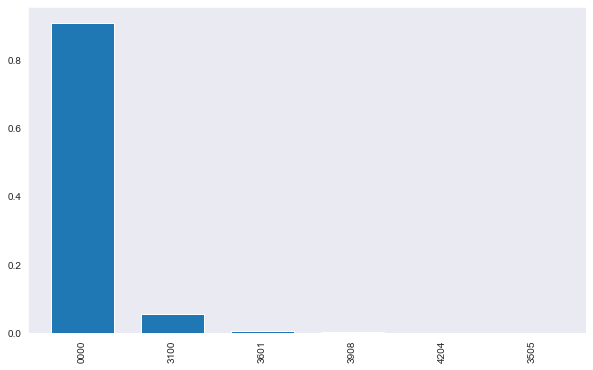

In [278]:
procedure_precedence=procedure_after2['3601'].sort_values(ascending=False)[0:6]
number_surgeries=len(Data_procedures[Data_procedures.Procedure_2=='3601'])
procedure_precedence.plot(kind='bar',figsize=(10, 6),width=0.7)
number_surgeries=len(Data_procedures[Data_procedures.Procedure_2=='3601'])

--------

* ### 11.4.   Probability of a fourth procedure knowing the third one  <a class="anchor" id="11.4"></a>


In [279]:
probability

0000    0.994186
3099    0.005814
Name: Procedure_3, dtype: float64

In [280]:
D_procedimento = {}
Data_procedures_more50=Data_procedures[Data_procedures['Procedure_3'].map(Data_procedures['Procedure_3'].value_counts()) > 50]

#procedures with more than 50 surgeries
types_proccedures=Data_procedures_more50['Procedure_3'].unique()

for name in range(len(types_proccedures)):
    D_procedimento[name] = Data_procedures_more50[Data_procedures_more50.Procedure_1==types_proccedures[name]]
    

D_each={}
for i in range(len(types_proccedures)):
    
        summ=len(D_procedimento[i]['Procedure_3'])
        probability=D_procedimento[i]['Procedure_4'].value_counts()/summ
    
        
        D_each[i] = {types_proccedures[i]: probability}
        D_each[i]=pd.DataFrame(D_each[i])
        

In [281]:
for j in range(len(D_procedimento)):
    
    if j==0:
        procedure_after3=D_each[j]
    else:
        procedure_after3=pd.concat([procedure_after3, D_each[j]], axis=1)


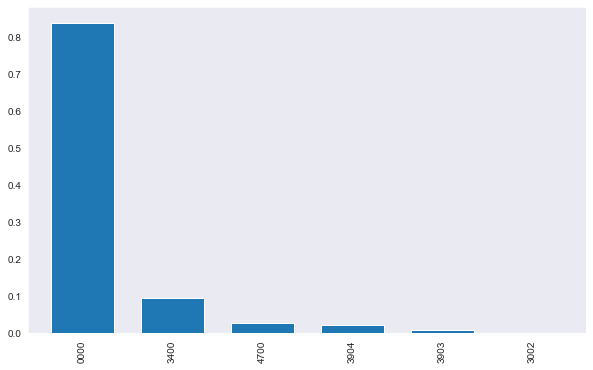

In [282]:
procedure_precedence=procedure_after3['3400'].sort_values(ascending=False)[0:6]
number_surgeries=len(Data_procedures[Data_procedures.Procedure_3=='3400'])
procedure_precedence.plot(kind='bar',figsize=(10, 6),width=0.7)
number_surgeries=len(Data_procedures[Data_procedures.Procedure_3=='3400'])

--------

* ### 11.5.   How many surgeries each doctor have with a specific procedure?  <a class="anchor" id="11.5"></a>


Create a table with all procedures for each doctor:
    * each column - a doctor
    * each row a type of procedure

In [283]:
D_procedimento = {}


doctors=Data_procedures['Doctors'].unique()

for name in range(len(doctors)):
        D_procedimento[name] = Data_procedures[Data_procedures.Doctors==doctors[name]]
    



In [284]:
D_each={}
for i in range(len(doctors)):
    
        
        counts=D_procedimento[i]['Procedure_1'].value_counts()
    
        
        D_each[i] = {doctors[i]: counts}
        D_each[i]=pd.DataFrame(D_each[i])
        

In [285]:
for j in range(len(D_procedimento)):
    
    if j==0:
        table_doctors_procedure=D_each[j]
    else:
        table_doctors_procedure=pd.concat([table_doctors_procedure, D_each[j]], axis=1)
        
table_doctors_procedure=table_doctors_procedure.fillna(0) #replace NaN values by 0

<AxesSubplot:>

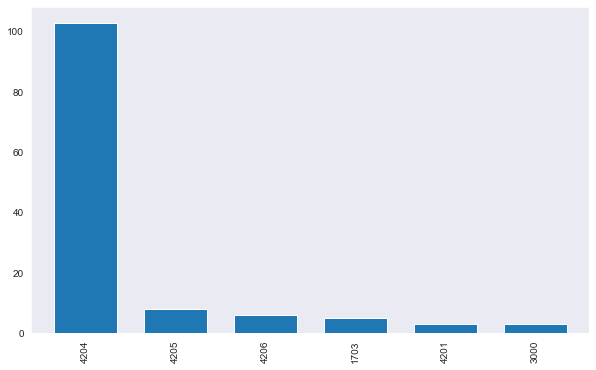

In [286]:
Number_of_procedures_doctor=table_doctors_procedure['514503712'].sort_values(ascending=False)[0:6]
Number_of_procedures_doctor.plot(kind='bar',figsize=(10, 6),width=0.7)


-----

# 12. Analyses of some columns <a class="anchor" id="12"></a>


* ### 12.1. Real Time Recovery Room  <a class="anchor" id="12.1"></a> 


In [287]:
types_of_services=df_cuf.Speciality.unique()
mean_per_service=[None] * len(types_of_services)
number_of_surgeries=[None] * len(types_of_services)


for j in range(len(types_of_services)):
    service=df_cuf.loc[df_cuf['Speciality'] == types_of_services[j]]
    time=0
    for i in range(len(service)):
        if ((service['TimeRecoveryRoom'].isnull()).iloc[i] == False):
            time=time+service['TimeRecoveryRoom'].iloc[i];
    
    sum_surgeries=service['TimeRecoveryRoom'].notnull().sum()        
    mean_time_real=time/sum_surgeries
    mean_per_service[j]=mean_time_real
    number_of_surgeries[j]=sum_surgeries

<ipython-input-287-b94b27c60573>:14: RuntimeWarning:

invalid value encountered in longlong_scalars



In [288]:
d_real_time_recovery = {"Types of Services": types_of_services, "Mean Time in recovery room(Measured)": mean_per_service, "Number of Surgeries used for mean": number_of_surgeries,}


In [289]:
pd.DataFrame(d_real_time_recovery).sort_values(by='Mean Time in recovery room(Measured)',ascending=False)

Types of Services  \
18                         CIRURGIA CARDÍACA   
24                               IMAGIOLOGIA   
12                         CIRURGIA TORÁCICA   
14                               CARDIOLOGIA   
11                    CIRURGIA MAXILO-FACIAL   
4                             NEURO-CIRURGIA   
8                    GINECOLOGIA OBSTETRÍCIA   
0                             CIRURGIA GERAL   
5                                  ORTOPEDIA   
6                          CIRURGIA VASCULAR   
21                               PNEUMOLOGIA   
2                                   UROLOGIA   
15                         MEDICINA DENTÁRIA   
3                       OTORRINOLARINGOLOGIA   
9   CIR. PLÁSTICA E RECONSTRUTIVA E ESTÉTICA   
10                       CIRURGIA PEDIÁTRICA   
17                            ANESTESIOLOGIA   
13                         GASTROENTEROLOGIA   
22                          MEDICINA INTERNA   
20                 ADMINISTRAÇÃO REQUISIÇÕES   
23                          HEMATO/ONCOLOGIA   
1                               OFTALMOLOGIA   
7                               DERMATOLOGIA   
16                               ANGIOGRAFIA   
19                                NEUROLOGIA   
25                              RADIOTERAPIA   

    Mean Time in recovery room(Measured)  Number of Surgeries used for mean  
18                            524.631282                                 65  
24                            172.000000                                  4  
12                            150.811538                                247  
14                            128.986200                                157  
11                            126.978926                               1471  
4                             116.659703                               7278  
8                             115.656909                              11833  
0                             110.403862                              23273  
5                             108.630045                              33299  
6                             106.672310                               5413  
21                            101.916667                                 12  
2                             101.787129                              13163  
15                            101.416667                                 48  
3                              94.987956                              16766  
9                              91.737789                               4953  
10                             91.194055                               3633  
17                             82.748214                                 28  
13                             77.818565                                 79  
22                             75.989362                                 94  
20                             73.000000                                  1  
23                             60.000000                                  3  
1                              57.100994                              18899  
7                              47.766667                                 90  
16                             39.806513                                412  
19                                   NaN                                  0  
25                                   NaN                                  0

#####  Distributions of Recovery Room Time 

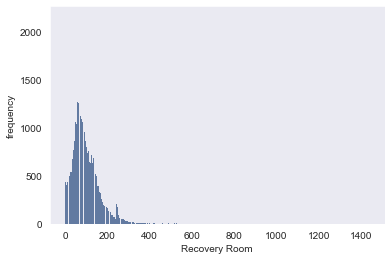

<Figure size 576x432 with 0 Axes>

In [290]:
df = df_cuf.dropna(subset=['TimeRecoveryRoom'])
df=df['TimeRecoveryRoom']
df=df.astype(int)

hist_rr = thinkstats2.Hist(df)
thinkplot.Hist(hist_rr)
thinkplot.Show(xlabel='Recovery Room', ylabel='frequency')

##### Sampling Distributions of Time in recovery rooom

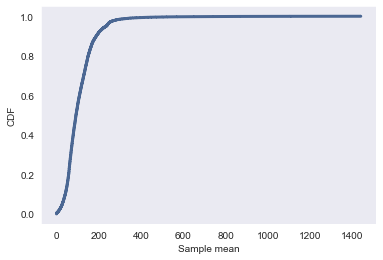

In [291]:
df = df_cuf.dropna(subset=['TimeRecoveryRoom'])
df=df['TimeRecoveryRoom'][df.Speciality=='ORTOPEDIA']


cdf = thinkstats2.Cdf(df)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Sample mean',
                 ylabel='CDF')

Here's the "sampling distribution of the mean" which shows how much we should expect $\bar{x}$ to vary from one experiment to the next.

In [292]:
def SimulateSample(mu=df.mean(), sigma=df.std(), n=9, iters=1000):
    xbars = []
    for j in range(iters):
        xs = np.random.normal(mu, sigma, n)
        xbar = np.mean(xs)
        xbars.append(xbar)
    return xbars

xbars = SimulateSample()

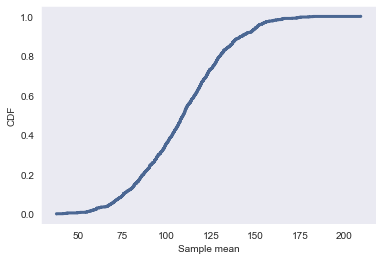

In [293]:
SimulateSample(mu=df.mean(), sigma=df.std(), n=9, iters=1000)

cdf = thinkstats2.Cdf(xbars)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Sample mean',
                 ylabel='CDF')

Confidence interval

In [294]:
ci = cdf.Percentile(5), cdf.Percentile(95)
ci

(68.45469564150008, 151.2508333337917)

-----

* ### 12.2. OR Real Time  <a class="anchor" id="12.2"></a> 


In [295]:
types_of_services=df_cuf.Speciality.unique()
number_of_surgeries=[None] * len(types_of_services)

var=[None] * len(types_of_services)
mean_per_service_real=[None] * len(types_of_services)
std=[None] * len(types_of_services)

for j in range(len(types_of_services)):
    service=df_cuf.loc[df_cuf['Speciality'] == types_of_services[j]]
    time=0
    for i in range(len(service)):
        if ((service['RealRoomDuration'].isnull()).iloc[i] == False):
            time=time+service['RealRoomDuration'].iloc[i];
    
    function=df_cuf['RealRoomDuration'][df_cuf['Speciality']==types_of_services[j]]
    mean_per_service_real[j]=function.mean()
    var[j]=function.var()
    std[j]=function.std()
    sum_surgeries=service['RealRoomDuration'].notnull().sum()        
    number_of_surgeries[j]=sum_surgeries
        



In [296]:
d_real_time = {"Types of Services": types_of_services,"Mean Real Time": mean_per_service_real,"Variance": var, "Standard Deviation": std,"Number of Surgeries":number_of_surgeries}

In [297]:
pd.DataFrame(d_real_time).sort_values(by='Mean Real Time',ascending=False)

Types of Services  Mean Real Time     Variance  \
18                         CIRURGIA CARDÍACA      259.030702  9737.701838   
15                         MEDICINA DENTÁRIA      137.000000  5000.431373   
12                         CIRURGIA TORÁCICA      134.293853  6127.357965   
11                    CIRURGIA MAXILO-FACIAL      129.080357  6394.208548   
20                 ADMINISTRAÇÃO REQUISIÇÕES      128.000000  7239.000000   
21                               PNEUMOLOGIA      123.183099  4819.323139   
4                             NEURO-CIRURGIA      120.814936  5625.527740   
9   CIR. PLÁSTICA E RECONSTRUTIVA E ESTÉTICA       98.798268  6435.973237   
5                                  ORTOPEDIA       97.749360  3301.885799   
24                               IMAGIOLOGIA       92.333333  8104.380952   
0                             CIRURGIA GERAL       87.275312  4000.229310   
22                          MEDICINA INTERNA       87.056818  6667.973970   
3                       OTORRINOLARINGOLOGIA       86.518694  3018.934192   
6                          CIRURGIA VASCULAR       86.292074  2534.237454   
8                    GINECOLOGIA OBSTETRÍCIA       86.155318  2782.261558   
13                         GASTROENTEROLOGIA       69.852564  3572.797477   
17                            ANESTESIOLOGIA       69.435897  1193.462888   
2                                   UROLOGIA       68.875613  2977.536309   
14                               CARDIOLOGIA       67.919753  1335.114284   
23                          HEMATO/ONCOLOGIA       67.272727   521.218182   
10                       CIRURGIA PEDIÁTRICA       61.312896  1106.591124   
16                               ANGIOGRAFIA       60.305662  1825.206255   
25                              RADIOTERAPIA       57.500000   377.500000   
1                               OFTALMOLOGIA       35.459173   667.897934   
7                               DERMATOLOGIA       25.382243   135.660950   
19                                NEUROLOGIA       21.000000          NaN   

    Standard Deviation  Number of Surgeries  
18           98.679794                  684  
15           70.713728                   52  
12           78.277442                  667  
11           79.963795                 1680  
20           85.082313                    3  
21           69.421345                   71  
4            75.003518                10083  
9            80.224518                 7391  
5            57.462038                40991  
24           90.024335                   15  
0            63.247366                29610  
22           81.657663                  352  
3            54.944829                18402  
6            50.341210                 6851  
8            52.747147                14055  
13           59.772882                  156  
17           34.546532                   39  
2            54.566806                17140  
14           36.539216                  324  
23           22.830203                   11  
10           33.265464                 3947  
16           42.722433                 3144  
25           19.429359                    6  
1            25.843721                28094  
7            11.647358                 3210  
19                 NaN                    1

-----

* ### 12.3. Expected Time  (Planned)   <a class="anchor" id="12.3"></a> 



In [6]:

types_of_services=df_cuf.Speciality.unique()
number_of_surgeries=[None] * len(types_of_services)


var=[None] * len(types_of_services)
mean_per_service_planned=[None] * len(types_of_services)
std=[None] * len(types_of_services)

for j in range(len(types_of_services)):
    service=df_cuf.loc[df_cuf['Speciality'] == types_of_services[j]]
    time=0
    mid_step=[]
    t=0
    for i in range(len(service)):
        if ((service['DUR_PLANEADA'].isnull()).iloc[i] == False) :
            #I did the second condition because sometimes there is data with only :, which is not a datetime type
            
            mid_step=mid_step+[service['DUR_PLANEADA'].iloc[i].minute + service['DUR_PLANEADA'].iloc[i].hour*60]
            t=t+1
    
    var[j]=np.var(mid_step)
    mean_per_service_planned[j]=np.mean(mid_step)
    std[j]=np.std(mid_step)
    sum_surgeries=np.sum(mid_step) 
    
    number_of_surgeries[j]=sum_surgeries
    

In [7]:
d_foreseen = {"Types of Services": types_of_services, "Planned Duration Mean Time": mean_per_service_planned,"Variance": var,"Standard Deviation": std, "Number of Surgeries used for mean": number_of_surgeries}

In [8]:
pd.DataFrame(d_foreseen).sort_values(by='Planned Duration Mean Time',ascending=False)

Types of Services  Planned Duration Mean Time  \
18                         CIRURGIA CARDÍACA                  275.516432   
20                 ADMINISTRAÇÃO REQUISIÇÕES                  150.000000   
15                         MEDICINA DENTÁRIA                  146.086957   
11                    CIRURGIA MAXILO-FACIAL                  141.150538   
12                         CIRURGIA TORÁCICA                  138.674825   
4                             NEURO-CIRURGIA                  124.281390   
21                               PNEUMOLOGIA                  120.434783   
5                                  ORTOPEDIA                   98.997082   
9   CIR. PLÁSTICA E RECONSTRUTIVA E ESTÉTICA                   97.435683   
6                          CIRURGIA VASCULAR                   90.217391   
0                             CIRURGIA GERAL                   88.902275   
3                       OTORRINOLARINGOLOGIA                   87.943990   
8                    GINECOLOGIA OBSTETRÍCIA                   87.156718   
24                               IMAGIOLOGIA                   85.714286   
22                          MEDICINA INTERNA                   75.796992   
2                                   UROLOGIA                   75.572456   
14                               CARDIOLOGIA                   71.451049   
10                       CIRURGIA PEDIÁTRICA                   71.124534   
17                            ANESTESIOLOGIA                   69.600000   
13                         GASTROENTEROLOGIA                   67.244275   
23                          HEMATO/ONCOLOGIA                   66.000000   
16                               ANGIOGRAFIA                   57.355921   
1                               OFTALMOLOGIA                   40.382603   
19                                NEUROLOGIA                   30.000000   
25                              RADIOTERAPIA                   30.000000   
7                               DERMATOLOGIA                   24.242481   

        Variance  Standard Deviation  Number of Surgeries used for mean  
18   4688.935176           68.475800                             176055  
20    900.000000           30.000000                                300  
15   3428.166352           58.550545                               6720  
11  14893.911557          122.040614                             223159  
12   4967.376779           70.479620                              79322  
4    3281.433717           57.283800                            1166008  
21   1780.245747           42.192958                               2770  
5    2580.908605           50.802644                            3731893  
9    4919.138428           70.136570                             606732  
6    1564.373031           39.552156                             585150  
0    3623.566056           60.196063                            2258829  
3    1953.038038           44.193190                            1505777  
8    2062.284239           45.412380                            1071679  
24   3838.775510           61.957853                               1200  
22   2101.274577           45.839662                              10081  
2    2256.572504           47.503395                            1187470  
14   1020.709142           31.948539                              20435  
10   3038.671137           55.124143                             229021  
17    627.840000           25.056736                               1740  
13   3132.031933           55.964560                               8809  
23    594.000000           24.372115                                330  
16   1045.398320           32.332620                             174362  
1     471.906448           21.723408                            1106766  
19      0.000000            0.000000                                 30  
25      0.000000            0.000000                                180  
7     155.679298           12.477151              

-----

* ### 12.4. Expected Time  vs Real Time (OR per service)  <a class="anchor" id="12.4"></a> 


In [301]:
Delta_time=np.subtract(mean_per_service_planned,mean_per_service_real)

In [302]:
d_foreseen_comp = {"Types of Services": types_of_services, "Planned Duration Mean Time": mean_per_service_planned, "Real Duration Mean Time": mean_per_service_real, "Delta":Delta_time,"Number of surgeris":number_of_surgeries}

In [303]:
pd.DataFrame(d_foreseen_comp).sort_values(by='Planned Duration Mean Time',ascending=False)

Types of Services  Planned Duration Mean Time  \
18                         CIRURGIA CARDÍACA                  275.516432   
20                 ADMINISTRAÇÃO REQUISIÇÕES                  150.000000   
15                         MEDICINA DENTÁRIA                  146.086957   
11                    CIRURGIA MAXILO-FACIAL                  141.150538   
12                         CIRURGIA TORÁCICA                  138.674825   
4                             NEURO-CIRURGIA                  124.281390   
21                               PNEUMOLOGIA                  120.434783   
5                                  ORTOPEDIA                   98.997082   
9   CIR. PLÁSTICA E RECONSTRUTIVA E ESTÉTICA                   97.435683   
6                          CIRURGIA VASCULAR                   90.217391   
0                             CIRURGIA GERAL                   88.902275   
3                       OTORRINOLARINGOLOGIA                   87.943990   
8                    GINECOLOGIA OBSTETRÍCIA                   87.156718   
24                               IMAGIOLOGIA                   85.714286   
22                          MEDICINA INTERNA                   75.796992   
2                                   UROLOGIA                   75.572456   
14                               CARDIOLOGIA                   71.451049   
10                       CIRURGIA PEDIÁTRICA                   71.124534   
17                            ANESTESIOLOGIA                   69.600000   
13                         GASTROENTEROLOGIA                   67.244275   
23                          HEMATO/ONCOLOGIA                   66.000000   
16                               ANGIOGRAFIA                   57.355921   
1                               OFTALMOLOGIA                   40.382603   
19                                NEUROLOGIA                   30.000000   
25                              RADIOTERAPIA                   30.000000   
7                               DERMATOLOGIA                   24.242481   

    Real Duration Mean Time      Delta  Number of surgeris  
18               259.030702  16.485730              176055  
20               128.000000  22.000000                 300  
15               137.000000   9.086957                6720  
11               129.080357  12.070180              223159  
12               134.293853   4.380972               79322  
4                120.814936   3.466454             1166008  
21               123.183099  -2.748316                2770  
5                 97.749360   1.247722             3731893  
9                 98.798268  -1.362585              606732  
6                 86.292074   3.925317              585150  
0                 87.275312   1.626962             2258829  
3                 86.518694   1.425297             1505777  
8                 86.155318   1.001399             1071679  
24                92.333333  -6.619048                1200  
22                87.056818 -11.259826               10081  
2                 68.875613   6.696843             1187470  
14                67.919753   3.531296               20435  
10                61.312896   9.811638              229021  
17                69.435897   0.164103                1740  
13                69.852564  -2.608289                8809  
23                67.272727  -1.272727                 330  
16                60.305662  -2.949741              174362  
1                 35.459173   4.923430             1106766  
19                21.000000   9.000000                  30  
25                57.500000 -27.500000                 180  
7                 25.382243  -1.139762               77382

-----

* ### 12.5. Variation in usage of operating room based on gender   <a class="anchor" id="12.5"></a> 


In [304]:

types_of_services=df_cuf.Speciality.unique()
M_mean_per_service=[None] * len(types_of_services)
F_mean_per_service=[None] * len(types_of_services)
M_number_of_surgeries=[None] * len(types_of_services)
F_number_of_surgeries=[None] * len(types_of_services)


for j in range(len(types_of_services)):
    service=df_cuf.loc[df_cuf['Speciality'] == types_of_services[j]]
    time1=0
    time2=0
    people1=0
    people2=0
    for i in range(len(service)):
        if ((service['RealRoomDuration'].isnull()).iloc[i] == False) and ((service['Gender'].isnull()).iloc[i] == False):
            #I did the second condition because sometimes there is data with only :, which is not a datetime type
            if (service['Gender'].iloc[i] == 'M'):
                time1=time1+service['RealRoomDuration'].iloc[i];
                people1=people1+1
            if (service['Gender'].iloc[i] == 'F'):
                time2=time2+service['RealRoomDuration'].iloc[i];
                people2=people2+1
    
    if (people1!=0):            
        mean_time_m=time1/people1
        M_mean_per_service[j]=mean_time_m
        M_number_of_surgeries[j]=people1
    if (people2!=0):
        mean_time_f=time2/people2
        F_mean_per_service[j]=mean_time_f
        F_number_of_surgeries[j]=people2

In [305]:
d_delta_gender = {"Types of Services": types_of_services, "Mean Time calculated with delta(Female)": F_mean_per_service, "Number of Surgeries (Female) ": F_number_of_surgeries, "Mean Time calculated with delta(Men)": M_mean_per_service, "Number of Surgeries (Men) ": M_number_of_surgeries}



In [306]:
pd.DataFrame(d_delta_gender).sort_values(by='Mean Time calculated with delta(Female)',ascending=False)

Types of Services  \
18                         CIRURGIA CARDÍACA   
11                    CIRURGIA MAXILO-FACIAL   
12                         CIRURGIA TORÁCICA   
15                         MEDICINA DENTÁRIA   
21                               PNEUMOLOGIA   
4                             NEURO-CIRURGIA   
9   CIR. PLÁSTICA E RECONSTRUTIVA E ESTÉTICA   
5                                  ORTOPEDIA   
24                               IMAGIOLOGIA   
20                 ADMINISTRAÇÃO REQUISIÇÕES   
0                             CIRURGIA GERAL   
22                          MEDICINA INTERNA   
8                    GINECOLOGIA OBSTETRÍCIA   
3                       OTORRINOLARINGOLOGIA   
6                          CIRURGIA VASCULAR   
13                         GASTROENTEROLOGIA   
2                                   UROLOGIA   
17                            ANESTESIOLOGIA   
14                               CARDIOLOGIA   
10                       CIRURGIA PEDIÁTRICA   
16                               ANGIOGRAFIA   
23                          HEMATO/ONCOLOGIA   
25                              RADIOTERAPIA   
1                               OFTALMOLOGIA   
7                               DERMATOLOGIA   
19                                NEUROLOGIA   

    Mean Time calculated with delta(Female)  Number of Surgeries (Female)   \
18                               246.493274                            223   
11                               132.253505                            856   
12                               131.927215                            316   
15                               129.111111                             27   
21                               121.064516                             31   
4                                118.610431                           5388   
9                                110.073335                           5059   
5                                 96.271138                          20189   
24                                95.444444                              9   
20                                93.000000                              1   
0                                 90.866396                          13525   
22                                89.497041                            169   
8                                 85.995057                          13959   
3                                 84.486981                           8142   
6                                 80.282785                           4194   
13                                68.695652                             69   
2                                 64.290643                           3623   
17                                64.259259                             27   
14                                63.241935                            124   
10                                62.640890                            944   
16                                59.222913                           1126   
23                                51.666667                              3   
25                                48.333333                              3   
1                                 34.432726                          16366   
7                                 25.388857                           1723   
19                                21.000000                              1   

    Mean Time calculated with delta(Men)  Number of Surgeries (Men)   
18                            265.095445                       461.0  
11                            125.488998                       818.0  
12                            136.690544                       349.0  
15                            148.208333                        24.0  
21                            124.825000                        40.0  
4                             123.273973                      4672.0  
9                              73.301969                      2285.0  
5                              99.130190               

-----

* ### 12.6. Variation in usage of operating room based on age    <a class="anchor" id="12.6"></a> 


In [307]:

types_of_services=df_cuf.Speciality.unique()
mean_per_service_1=[None] * len(types_of_services)
mean_per_service_2=[None] * len(types_of_services)
mean_per_service_3=[None] * len(types_of_services)
mean_per_service_4=[None] * len(types_of_services)
mean_per_service_5=[None] * len(types_of_services)
mean_per_service_6=[None] * len(types_of_services)

number_of_surgeries_1=[None] * len(types_of_services)
number_of_surgeries_2=[None] * len(types_of_services)
number_of_surgeries_3=[None] * len(types_of_services)
number_of_surgeries_4=[None] * len(types_of_services)
number_of_surgeries_5=[None] * len(types_of_services)
number_of_surgeries_6=[None] * len(types_of_services)


for j in range(len(types_of_services)):
    service=df_cuf.loc[df_cuf['Speciality'] == types_of_services[j]]
    
    time1=0
    time2=0
    time3=0
    time4=0
    time5=0
    time6=0
    
    people1=0
    people2=0
    people3=0
    people4=0
    people5=0
    people6=0
    
    for i in range(len(service)):
        if ((service['RealRoomDuration'].isnull()).iloc[i] == False) and ((service['Age'].isnull()).iloc[i] == False):
            #I did the second condition because sometimes there is data with only :, which is not a datetime type
            if 0 <=  df_cuf['Age'].iloc[i]  < 15:
                time1=time1+service['RealRoomDuration'].iloc[i]
                people1=people1+1

            if 15 <=  df_cuf['Age'].iloc[i]  < 30:
                time2=time2+service['RealRoomDuration'].iloc[i]
                people2=people2+1
            
            if 30 <=  df_cuf['Age'].iloc[i]  < 45:
                time3=time3+service['RealRoomDuration'].iloc[i]
                people3=people3+1
            
            if 45 <=  df_cuf['Age'].iloc[i]  < 60:
                time4=time4+service['RealRoomDuration'].iloc[i]
                people4=people4+1
            
            if 60 <=  df_cuf['Age'].iloc[i]  < 75:
                time5=time5+service['RealRoomDuration'].iloc[i]
                people5=people5+1
            
            if 75 <=  df_cuf['Age'].iloc[i]  < 105:
                time6=time6+service['RealRoomDuration'].iloc[i]
                people6=people6+1
            
    
    if (people1!=0):            
        mean_time_1=time1/people1
        mean_per_service_1[j]=mean_time_1
        number_of_surgeries_1[j]=people1
        
    if (people2!=0):
        mean_time_2=time2/people2
        mean_per_service_2[j]=mean_time_2
        number_of_surgeries_2[j]=people2
    
    if (people3!=0):
        mean_time_3=time3/people3
        mean_per_service_3[j]=mean_time_3
        number_of_surgeries_3[j]=people3
    
    if (people4!=0):
        mean_time_4=time4/people4
        mean_per_service_4[j]=mean_time_4
        number_of_surgeries_4[j]=people4
    
    if (people5!=0):
        mean_time_5=time5/people5
        mean_per_service_5[j]=mean_time_5
        number_of_surgeries_5[j]=people5
    
    if (people6!=0):
        mean_time_6=time6/people6
        mean_per_service_6[j]=mean_time_6
        number_of_surgeries_6[j]=people6

In [308]:
d_delta_AGE = {"Types of Services": types_of_services,
               "Mean Time AGE[0,14]": mean_per_service_1,
               "Number of Surgeries AGE[0,14]": number_of_surgeries_1,
               "Number of Surgeries AGE[15,29]": number_of_surgeries_2,
               "Mean Time AGE[30,44]": mean_per_service_3,
               "Number of Surgeries AGE[30,44]": number_of_surgeries_3,
               "Mean Time AGE [45,50]": mean_per_service_4,
               "Number of Surgeries AGE[45,59]": number_of_surgeries_4,
               "Mean Time AGE [60,74]": mean_per_service_5,
               "Number of Surgeries AGE[60,74]": number_of_surgeries_5,
               "Mean Time AGE [75,105]": mean_per_service_6,
               "Number of Surgeries AGE[75,105]": number_of_surgeries_6}

In [309]:
pd.DataFrame(d_delta_AGE).sort_values(by='Mean Time AGE [45,50]',ascending=False)

Types of Services  Mean Time AGE[0,14]  \
18                         CIRURGIA CARDÍACA           248.537037   
21                               PNEUMOLOGIA           137.750000   
15                         MEDICINA DENTÁRIA           121.333333   
11                    CIRURGIA MAXILO-FACIAL           133.391304   
12                         CIRURGIA TORÁCICA           144.132075   
4                             NEURO-CIRURGIA           123.742138   
22                          MEDICINA INTERNA            69.100000   
9   CIR. PLÁSTICA E RECONSTRUTIVA E ESTÉTICA            95.125475   
5                                  ORTOPEDIA            97.927169   
3                       OTORRINOLARINGOLOGIA            86.308498   
0                             CIRURGIA GERAL            87.442058   
8                    GINECOLOGIA OBSTETRÍCIA            86.884325   
6                          CIRURGIA VASCULAR            93.126850   
14                               CARDIOLOGIA            66.166667   
2                                   UROLOGIA            66.329357   
17                            ANESTESIOLOGIA            14.000000   
13                         GASTROENTEROLOGIA            53.333333   
10                       CIRURGIA PEDIÁTRICA            62.400763   
23                          HEMATO/ONCOLOGIA                  NaN   
16                               ANGIOGRAFIA            65.590476   
24                               IMAGIOLOGIA                  NaN   
1                               OFTALMOLOGIA            35.267928   
7                               DERMATOLOGIA            24.265700   
19                                NEUROLOGIA                  NaN   
20                 ADMINISTRAÇÃO REQUISIÇÕES                  NaN   
25                              RADIOTERAPIA                  NaN   

    Number of Surgeries AGE[0,14]  Number of Surgeries AGE[15,29]  \
18                           54.0                            62.0   
21                            4.0                             5.0   
15                            3.0                             2.0   
11                          115.0                           152.0   
12                           53.0                            60.0   
4                           795.0                           842.0   
22                           20.0                            32.0   
9                           526.0                           619.0   
5                          3515.0                          3496.0   
3                          1624.0                          1480.0   
0                          2701.0                          2525.0   
8                          1193.0                          1108.0   
6                           473.0                           568.0   
14                           18.0                            29.0   
2                          1509.0                          1366.0   
17                            1.0                             1.0   
13                            9.0                            15.0   
10                          262.0                           351.0   
23                            NaN                             NaN   
16                          210.0                           288.0   
24                            NaN                             1.0   
1                          2538.0                          2390.0   
7                           207.0                           289.0   
19                            NaN                             NaN   
20                            NaN                             NaN   
25                            NaN                             NaN   

    Mean Time AGE[30,44]  Number of Surgeries AGE[30,44]  \
18            249.738095                           126.0   
21            108.769231                            13.0   
15            123.200000                            10.0   
11            126.535714                           336.0   

-----

# 13. Correlation Map<a class="anchor" id="13"></a>



* ### 13.1. Update Metric and Non-Metric Variables: <a class="anchor" id="13.1"></a> 


In [310]:

metric_features = update_metric_feat(df_cuf)[0]
non_metric_features = update_metric_feat(df_cuf)[1]


In [311]:
def corr_heatmap(corr):    
    # Prepare figure
    fig = plt.figure(figsize=(10, 10))
    # Build annotation matrix (values above |0.8| will appear annotated in the plot)
    mask_annot = np.absolute(corr.values) >= -1
    annot = np.where(mask_annot, corr.values, np.full(corr.shape,""))
    # Plot heatmap of the correlation matrix
    sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
                fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5, annot_kws={"size": 10})
    # Layout
    fig.subplots_adjust(top=0.95)
    fig.suptitle("Correlation Matrix", fontsize=20)
    plt.show()


* ### 13.2. General Heat Map  <a class="anchor" id="13.2"></a> 


In [312]:
aux_df = df_cuf.copy()

#types_of_services=aux_df.DESCR_SERVICO.unique()

#for i in range(len(types_of_services)):
#    aux_df["DESCR_SERVICO"]= aux_df["DESCR_SERVICO"].replace(types_of_services[i], i) 
#aux_df["DESCR_SERVICO"]=aux_df["DESCR_SERVICO"].astype('int64')

aux_df=aux_df.drop(columns=['Match', 'HR_start_induction_ANEST','I1','I2','I3','I4','I5','I6','Date_Surgery','Birth'])

aux_df=aux_df.dropna()


<AxesSubplot:>

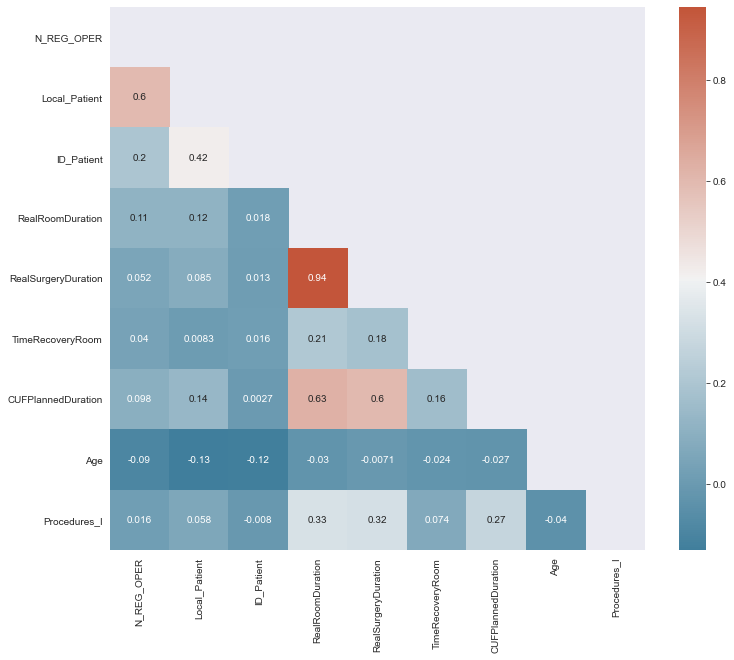

In [313]:

aux_df.columns
#
# Correlation between different variables
#
corr = aux_df.corr()
#
# Set up the matplotlib plot configuration
#
f, ax = plt.subplots(figsize=(12, 10))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

* Features with high correlation are more linearly dependent and hence have almost the same effect on the dependent variable. So, when two features have high correlation, we can drop one of the two features

In [314]:
# Creating correlation matrix with the absolute values of the corr:
corr = aux_df.corr().abs()

# Selecting upper triangle of the correlation matrix:
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))

# Finding the index of the feature's columns with correlation greater than 0.80 (>=very strong correlation)
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]

print('The features to be removed because of their high correlation are:\n',to_drop)


The features to be removed because of their high correlation are:
 ['RealSurgeryDuration']


* ### 13.3. Heat Map for a particular surgery - Ophthalmology  <a class="anchor" id="13.3"></a> 


In [315]:
aux_df = df_cuf.copy()


In [316]:


types_of_services=aux_df.Speciality.unique()

for i in range(len(types_of_services)):
    aux_df["Speciality"]= aux_df["Speciality"].replace(types_of_services[i], i) 
aux_df["Speciality"]=aux_df["Speciality"].astype('int64')

In [317]:
aux_df=aux_df[aux_df.Speciality==1]
aux_df=aux_df.drop(columns=['Match', 'HR_start_induction_ANEST','I1','I2','I3','I4','I5','I6','Date_Surgery','Birth','Speciality'])

aux_df=aux_df.dropna()


<AxesSubplot:>

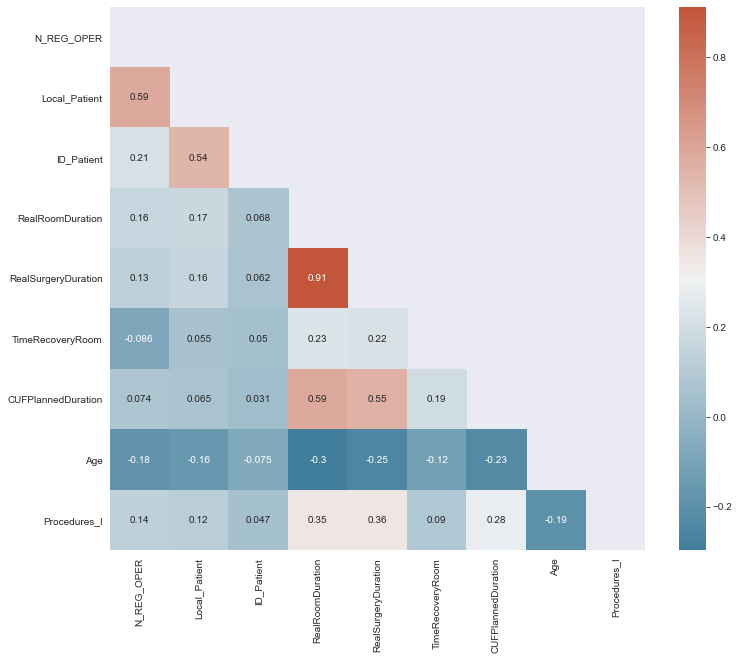

In [318]:

aux_df.columns
#
# Correlation between different variables
#
corr = aux_df.corr()
#
# Set up the matplotlib plot configuration
#
f, ax = plt.subplots(figsize=(12, 10))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

-------

# 14. Time Series Analysis - Graphs <a class="anchor" id="14"></a>

* ### 14.1. Time Series - General Overview  <a class="anchor" id="14.1"></a> 
     

 * #### Number of surgeries per year

In [61]:
opsd_daily=df_cuf.copy()
opsd_daily['Year'] = opsd_daily['Date_Surgery'].dt.year
opsd_daily['Month'] = opsd_daily['Date_Surgery'].dt.month
opsd_daily['Weekday'] = opsd_daily['Date_Surgery'].dt.day_name()
opsd_daily['Weekofyear'] = opsd_daily['Date_Surgery'].dt.weekofyear

def f(x):
    return 1
    
opsd_daily['Surgeries'] = opsd_daily['CUF_Unit'].apply(f)

<ipython-input-61-c176db1a3101>:5: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



In [62]:
opsd_daily=opsd_daily.groupby(['Year'])

In [63]:
opsd_daily['Surgeries'].sum().values

array([43456, 46945, 50805, 45773], dtype=int64)

(array([0, 1, 2, 3]),
 [Text(0, 0, '2017'),
  Text(1, 0, '2018'),
  Text(2, 0, '2019'),
  Text(3, 0, '2020')])

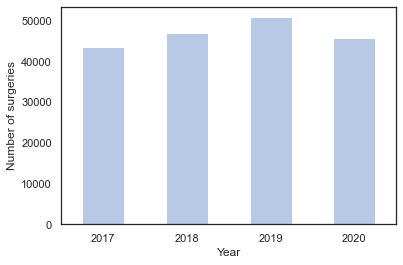

In [67]:
opsd_daily['Surgeries'].sum().plot(kind='bar',width=0.5,color='#b7c9e5')

plt.ylabel("Number of surgeries")
plt.rcParams.update({'font.size': 13})
plt.xticks(rotation = 360)



* Urgent and Progammed

In [323]:
opsd_daily=df_cuf.copy()
opsd_daily['Year'] = opsd_daily['Date_Surgery'].dt.year
opsd_daily['Month'] = opsd_daily['Date_Surgery'].dt.month
opsd_daily['Weekday'] = opsd_daily['Date_Surgery'].dt.day_name()
opsd_daily['Weekofyear'] = opsd_daily['Date_Surgery'].dt.weekofyear
opsd_daily['Surgeries'] = opsd_daily['Date_Surgery'].apply(f)


<ipython-input-323-47a4ffb3e973>:5: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



In [324]:
opsd_daily=opsd_daily.groupby(['Year','FLG_PROG_URG'])

Text(0.5, 1.0, 'Number of surgeries per year')

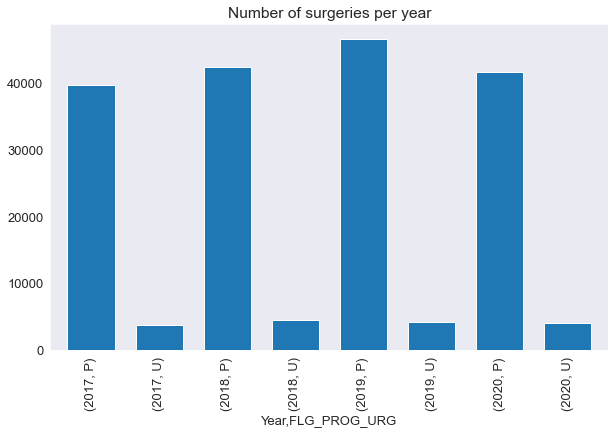

In [325]:
opsd_daily['Surgeries'].sum().plot(kind='bar',figsize=(10, 6),width=0.7)
plt.title("Number of surgeries per year")

   * #### Over Year and Week of year

In [326]:
opsd_daily=df_cuf.copy()

In [327]:
opsd_daily['Year'] = opsd_daily['Date_Surgery'].dt.year
opsd_daily['Month'] = opsd_daily['Date_Surgery'].dt.month
opsd_daily['Weekday'] = opsd_daily['Date_Surgery'].dt.day_name()
opsd_daily['Weekofyear'] = opsd_daily['Date_Surgery'].dt.weekofyear

<ipython-input-327-c42536feb4b8>:4: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



In [328]:
#count lines
def f(x):
    return 1
    
        
opsd_daily['Surgeries'] = opsd_daily['CUF_Unit'].apply(f)

In [329]:
#opsd_daily = opsd_daily[opsd_daily.columns[-3:]]
opsd_daily=opsd_daily.groupby(['Year','Weekofyear'])

* graph of the number of surgeries each week of the year

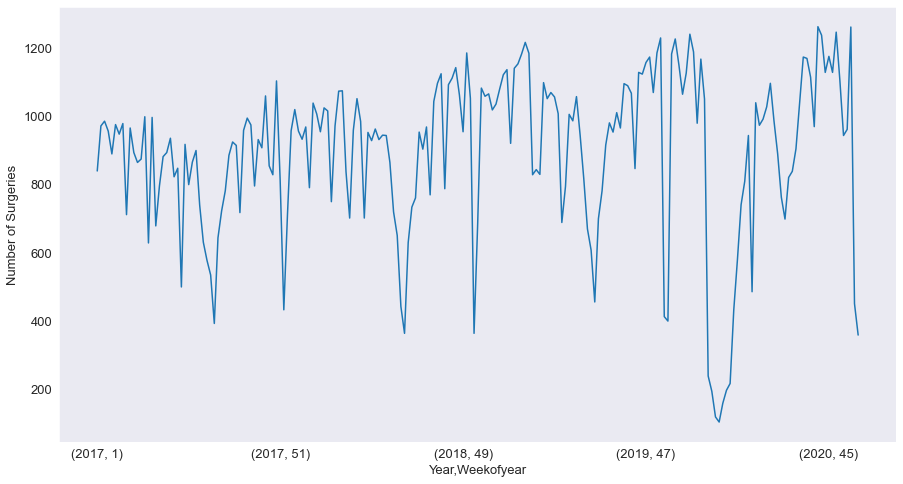

In [330]:

ax = opsd_daily['Surgeries'].sum().plot(figsize=(15, 8))
ax.set_ylabel('Number of Surgeries');

* Plot of Real duration of surgeries each week of the year

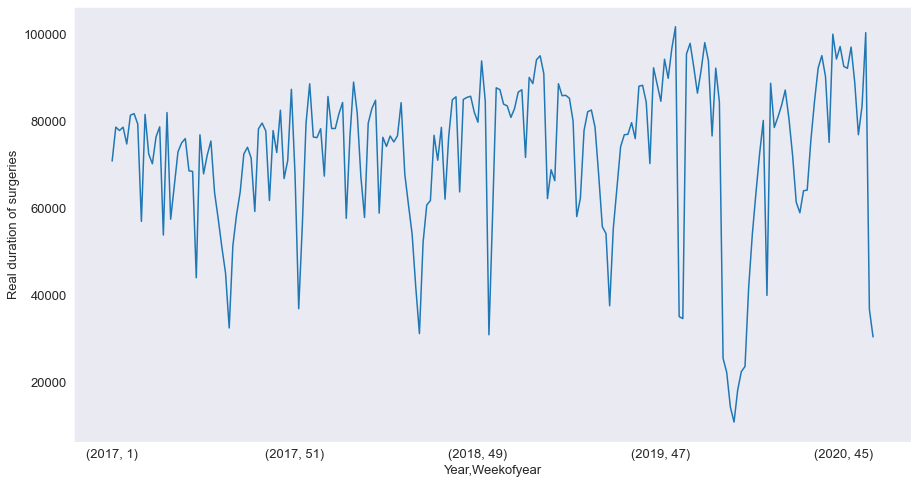

In [331]:
ax = opsd_daily['RealRoomDuration'].sum().plot(figsize=(15, 8))
ax.set_ylabel('Real duration of surgeries');

* #### Over Year and Month

In [332]:
opsd_daily=df_cuf.copy()

In [333]:
opsd_daily['Year'] = opsd_daily['Date_Surgery'].dt.year
opsd_daily['Month'] = opsd_daily['Date_Surgery'].dt.month
opsd_daily['Weekday'] = opsd_daily['Date_Surgery'].dt.day_name()
opsd_daily['Weekofyear'] = opsd_daily['Date_Surgery'].dt.weekofyear

<ipython-input-333-c42536feb4b8>:4: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



In [334]:
#count lines
def f(x):
    return 1
    
        
opsd_daily['Surgeries'] = opsd_daily['CUF_Unit'].apply(f)

In [335]:
#opsd_daily = opsd_daily[opsd_daily.columns[-3:]]
opsd_daily=opsd_daily.groupby(['Year','Month'])

* Plot of Number of surgeries each week of the year

Text(0.5, 0, 'Year, Month')

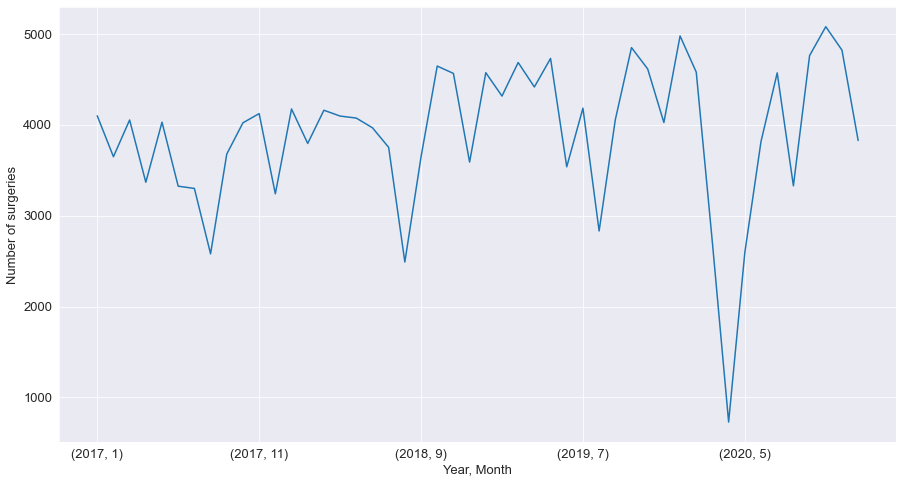

In [336]:
ax = opsd_daily['Surgeries'].sum().plot(figsize=(15, 8))
ax.set_ylabel('Number of Surgeries');
plt.grid(True)
plt.ylabel("Number of surgeries")

plt.xlabel("Year, Month")


* Plot of Real duration of surgeries each week of the year

Text(0, 0.5, 'Number of surgeries')

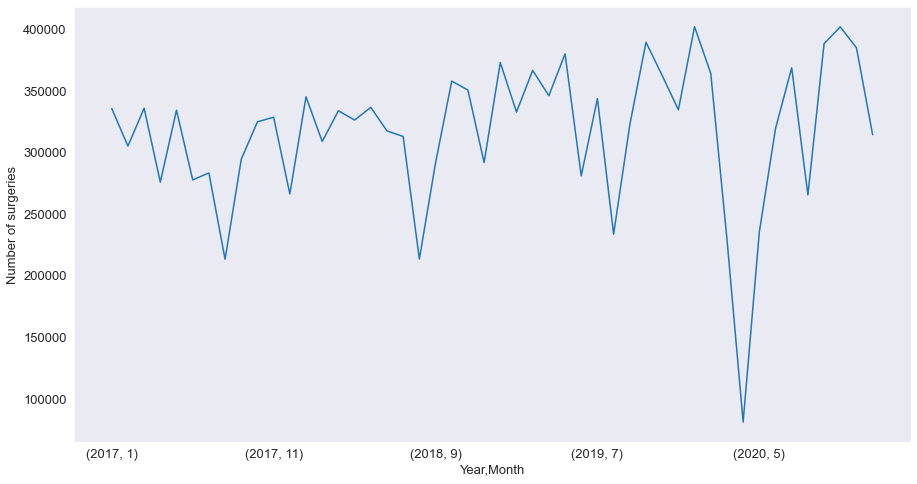

In [337]:
ax = opsd_daily['RealRoomDuration'].sum().plot(figsize=(15, 8))
ax.set_ylabel('Real duration of surgeries');

plt.ylabel("Number of surgeries")

* ### 14.2. Time Series - In a specific Unit  (Unit 14) <a class="anchor" id="14.2"></a> 

In [338]:
opsd_daily=df_cuf.copy()
opsd_daily=opsd_daily[opsd_daily['CUF_Unit']==14]

In [339]:
opsd_daily['Year'] = opsd_daily['Date_Surgery'].dt.year
opsd_daily['Month'] = opsd_daily['Date_Surgery'].dt.month
opsd_daily['Weekday'] = opsd_daily['Date_Surgery'].dt.day_name()
opsd_daily['Weekofyear'] = opsd_daily['Date_Surgery'].dt.weekofyear

<ipython-input-339-c42536feb4b8>:4: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



In [340]:
#count lines
def f(x):
    return 1

opsd_daily['Surgeries'] = opsd_daily['CUF_Unit'].apply(f)

In [341]:
#opsd_daily = opsd_daily[opsd_daily.columns[-3:]]
opsd_daily=opsd_daily.groupby(['Year','Month'])

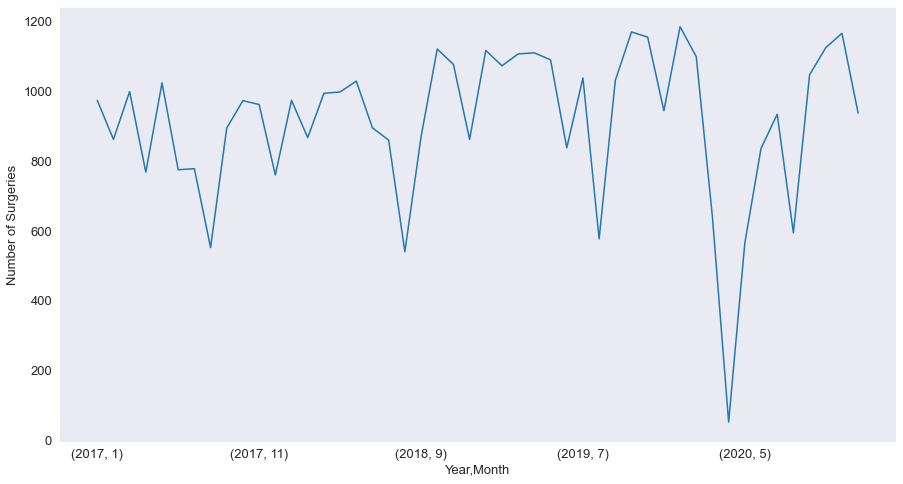

In [342]:
ax = opsd_daily['Surgeries'].sum().plot(figsize=(15, 8))
ax.set_ylabel('Number of Surgeries');

-----

# 15. Gaussian mixture models<a class="anchor" id="15"></a>

* ### 15.1. Clean data to introduce in Gaussian Mixture  <a class="anchor" id="15.1"></a> 



* Maintain only numeric values
* 'Procedures_I','COD_UNIDADE' are numeric but are like categories
* DUR_PLANEADA_m is numeric but take only some particular values

In [343]:
df=df_cuf.copy()
df=df.select_dtypes(include=['float64','int64']) #numeric values

In [344]:

df=df.drop(columns=['N_REG_OPER', 'Local_Patient','ID_Patient','Procedures_I','Procedures_I','CUFPlannedDuration'])
df=df.dropna().reset_index(drop=True)
df=df.astype('int64')

In [345]:
df

RealRoomDuration  RealSurgeryDuration  TimeRecoveryRoom  Age
0                     55                   47               134   71
1                     12                    6                97   71
2                     35                   18               153   42
3                     46                   37               126   42
4                    137                   94               253   34
...                  ...                  ...               ...  ...
140216                81                   36                52   61
140217                81                   46               103   45
140218                76                   39                89   65
140219                83                   65                61   42
140220                62                   30               132   39

[140221 rows x 4 columns]

In [346]:
X = df.values
X.shape

(140221, 4)

* ### 15.2. Take a Sample  <a class="anchor" id="15.2"></a> 


In [347]:
#if I want generate a sample

#X_sample=df.sample(10000).values
#frame_X_sample = pd.DataFrame(X_sample)
#X_sample.shape

* ### 15.3. Gaussian Mixture Model  <a class="anchor" id="15.3"></a> 

* Spheric covariance

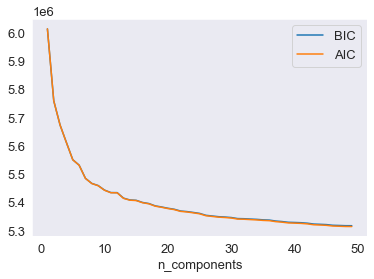

In [348]:
n_components_sph = np.arange(1, 50)
models = [GMM(n, covariance_type='spherical', random_state=0).fit(X)
          for n in n_components_sph]

plt.plot(n_components_sph, [m.bic(X) for m in models], label='BIC')
plt.plot(n_components_sph, [m.aic(X) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

* Diagonal
covariance

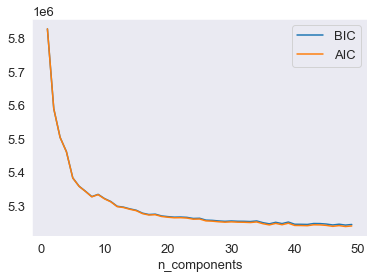

In [349]:
n_components_dig = np.arange(1, 50)
models = [GMM(n, covariance_type='diag', random_state=0).fit(X)
          for n in n_components_dig]

plt.plot(n_components_dig, [m.bic(X) for m in models], label='BIC')
plt.plot(n_components_dig, [m.aic(X) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

* Full covariance

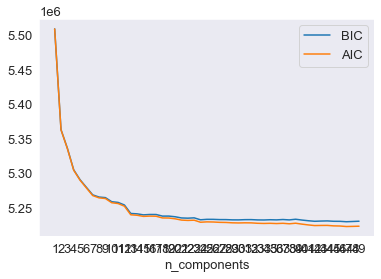

In [350]:
# Selecting number of components based on AIC and BIC
n_components = np.arange(1, 50)
models = [GMM(n, covariance_type='full',random_state=0).fit(X)
          for n in n_components]

bic_values = [m.bic(X) for m in models]
aic_values = [m.aic(X) for m in models]
plt.plot(n_components, bic_values, label='BIC')
plt.plot(n_components, aic_values, label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.xticks(n_components)
plt.show()

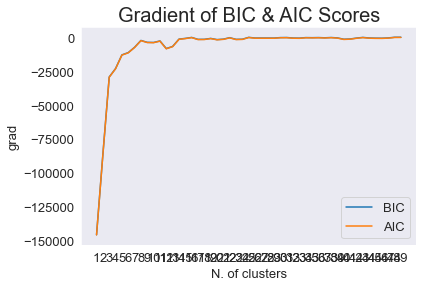

In [351]:
plt.errorbar(n_components, np.gradient(bic_values), label='BIC')
plt.errorbar(n_components, np.gradient(aic_values), label='AIC')
plt.title("Gradient of BIC & AIC Scores", fontsize=20)
plt.xticks(n_components)
plt.xlabel("N. of clusters")
plt.ylabel("grad")
plt.legend()

In [352]:
bestmodel=n_components[np.argmin([m.bic(X) for m in models])]
bestmodel

47

In [353]:
gmm = GMM(n_components=bestmodel, covariance_type='full', random_state=0)
gmm_labels = gmm.fit_predict(X)
df_concat_gmm = pd.concat([df, pd.Series(gmm_labels, index=df.index, name="gmm_labels")], axis=1)

In [354]:
df_concat_gmm

RealRoomDuration  RealSurgeryDuration  TimeRecoveryRoom  Age  \
0                     55                   47               134   71   
1                     12                    6                97   71   
2                     35                   18               153   42   
3                     46                   37               126   42   
4                    137                   94               253   34   
...                  ...                  ...               ...  ...   
140216                81                   36                52   61   
140217                81                   46               103   45   
140218                76                   39                89   65   
140219                83                   65                61   42   
140220                62                   30               132   39   

        gmm_labels  
0               45  
1               40  
2               45  
3               45  
4               41  
...            ...  
140216          23  
140217          11  
140218          23  
140219          14  
140220          45  

[140221 rows x 5 columns]

In [355]:
df_concat_gmm['gmm_labels'].value_counts()

5     9911
14    6910
11    6856
25    6557
32    6110
0     5959
23    5761
34    5660
45    5634
20    5164
19    4832
38    4508
40    4501
44    4140
6     3968
28    3657
21    3351
33    3240
27    3157
30    3095
18    3002
46    2885
17    2870
36    2653
39    2566
8     2369
24    2328
2     1933
4     1749
15    1555
41    1521
1     1462
42    1415
16    1094
35    1072
37    1054
13    1048
22    1038
9      938
7      794
10     785
29     318
12     306
43     244
3      120
26     100
31      31
Name: gmm_labels, dtype: int64

In [356]:
# ANALYSING THE GMM CLUSTERING SOLUTION FOR THE METRIC FEATURES:
df_concat_gmm.groupby('gmm_labels').mean()

RealRoomDuration  RealSurgeryDuration  TimeRecoveryRoom        Age
gmm_labels                                                                    
0                  31.470045            16.944789         58.817922  45.123678
1                 151.010944           106.484952        186.491108  53.858413
2                 145.715986            87.861355         58.197620  51.093637
3                 181.341667           129.041667        780.475000  57.375000
4                  67.640938            45.408233        242.911950  52.256718
5                  55.129654            31.719907         64.824236  44.702755
6                 104.239667            67.409778        108.597026  61.690776
7                 282.244332           216.591940        178.361461  47.173804
8                  89.872942            56.909244        131.592655  22.905445
9                  61.543710            38.168443         91.785714  20.642857
10                306.647134           263.895541         81.452229  45.864968
11                 66.733518            40.110414        107.265169  55.401546
12                144.728758           110.709150        352.421569  51.503268
13                149.458015            45.235687        128.001908  49.953244
14                 84.430391            56.420116         70.927786  39.312301
15                212.014791           167.681029         69.884887  43.070740
16                 64.781536            37.056673        302.710238  45.385740
17                 27.052265            13.038328         18.470035  49.058188
18                138.860093           105.342105        100.588608  57.041306
19                 38.025869            21.722061        104.913493  42.614031
20                 23.251936            15.774400         49.015298  71.691325
21                 74.111608            43.769919         58.426440  12.167711
22                228.823699           189.040462        129.421965  58.921002
23                 75.290575            49.003645         67.470925  68.325291
24                174.345790           132.517182        128.827749  51.799399
25                 52.149459            30.408724         74.826750   3.463932
26                326.280000           151.490000        117.720000  53.320000
27                 96.327526            62.880266        192.341147  49.243269
28                124.083128            83.602953        147.685808  48.745420
29                 67.116352            33.188679        448.393082  46.264151
30                 93.411632            39.469790         50.694992  51.155089
31                245.419355           186.838710       1310.161290  69.806452
32                 22.605401            15.814566         15.206056  70.900655
33                117.075617            87.339815         73.879938  23.268210
34                 79.194700            46.861484        146.821731  54.445583
35                200.117537           154.055037        220.863806  54.388993
36                 44.850735            23.872597        111.501696  10.594421
37                 53.453510            33.990512        196.697343  15.102467
38                110.108030            84.897737         65.233807  60.145297
39                 51.261496            30.863991        189.737334  54.149260
40                 38.040658            22.290158         85.299933  72.812264
41                126.111769            92.492439        246.553583  53.931624
42                 30.968198            20.454417        251.836749  60.089046
43                 84.286885            60.069672        718.733607  56.381148
44                 52.194928            31.737440         21.556039  59.500000
45                 47.269791            26.240859        141.900781  51.207668
46                159.793761           132.663085         68.409012  44.401040

* DUR_SALA_REAL vs DUR_CIRURGIA_REAL

<AxesSubplot:>

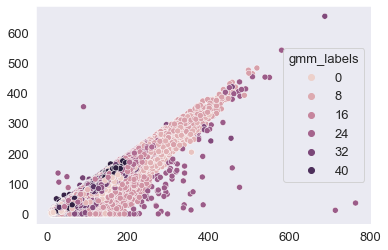

In [357]:
sns.scatterplot(x=X[:,0], y=X[:,1],hue="gmm_labels",data=df_concat_gmm)

* DUR_SALA_REAL vs TIME_RECOVERYROOM

<AxesSubplot:>

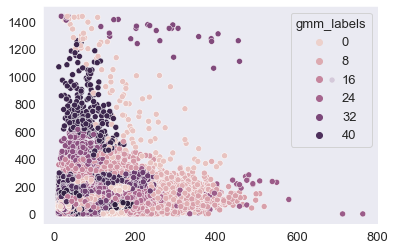

In [358]:
sns.scatterplot(x=X[:,0], y=X[:,2],hue="gmm_labels",data=df_concat_gmm)

* DUR_SALA_REAL vs AGE 

<AxesSubplot:>

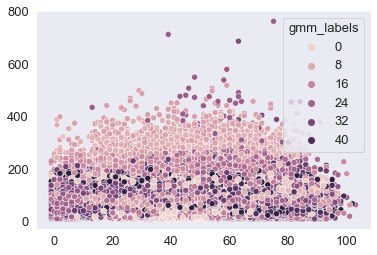

In [359]:
sns.scatterplot(x=X[:,3], y=X[:,0],hue="gmm_labels",data=df_concat_gmm)

* AGE vs TIME_RECOVERYROOM

<AxesSubplot:>

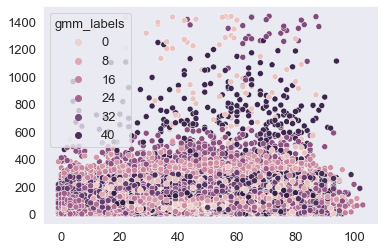

In [360]:
sns.scatterplot(x=X[:,3], y=X[:,2],hue="gmm_labels",data=df_concat_gmm)

After our model has converged, the weights, means, and covariances should be solved! 

In [361]:
means=gmm.means_
means


array([[  33.06200633,   18.11647507,   59.40844815,   46.22792412],
       [ 146.47721365,  103.74805063,  181.01223951,   52.80891836],
       [ 138.53301111,   86.42288841,   65.57586823,   50.44396051],
       [ 184.78113346,  130.1604925 ,  709.58896835,   58.62902683],
       [  67.03239458,   45.09838096,  243.03149712,   52.06365793],
       [  55.14125579,   32.0341198 ,   65.31512252,   45.55216996],
       [ 101.67570746,   66.18727198,  107.34384242,   60.11336509],
       [ 268.16526671,  206.67369064,  169.15613289,   47.6038143 ],
       [  88.19717918,   55.6879991 ,  128.99080668,   28.56465462],
       [  60.6768799 ,   36.86928357,   82.91935803,   21.91794279],
       [ 270.64109885,  229.23446496,   81.1691626 ,   45.64396736],
       [  66.50147102,   39.89749422,  105.50452478,   54.27090009],
       [ 133.79652144,   99.25363303,  313.06094827,   52.88730752],
       [ 139.37043452,   52.09092271,  135.66404589,   50.24348684],
       [  81.88941305,   54.256264

In [362]:
covariances=gmm.covariances_
covariances

array([[[ 9.97696726e+01,  6.65634878e+01,  9.81527788e+00,
         -4.99398376e+00],
        [ 6.65634878e+01,  7.35659930e+01,  3.35382443e+00,
         -8.19492081e+00],
        [ 9.81527788e+00,  3.35382443e+00,  2.17322174e+02,
         -2.68787983e+01],
        [-4.99398376e+00, -8.19492081e+00, -2.68787983e+01,
          2.54944453e+02]],

       [[ 4.54985715e+02,  3.99843401e+02,  2.31112261e+00,
         -1.30867192e+01],
        [ 3.99843401e+02,  5.97277174e+02, -8.19921899e+01,
         -2.89002731e+01],
        [ 2.31112261e+00, -8.19921899e+01,  5.03256725e+02,
          6.40840948e+00],
        [-1.30867192e+01, -2.89002731e+01,  6.40840948e+00,
          2.84590425e+02]],

       [[ 5.12957929e+02,  4.23016835e+02, -1.21514110e+02,
         -7.84896450e+01],
        [ 4.23016835e+02,  7.19423150e+02, -3.80011970e+02,
         -7.11882424e+01],
        [-1.21514110e+02, -3.80011970e+02,  1.24844817e+03,
         -1.42644832e+02],
        [-7.84896450e+01, -7.11882424e+

------

# 17. Distribution of predicting error<a class="anchor" id="17"></a>

In [100]:
prediction_error=df_cuf.copy()
prediction_error=prediction_error[["RealRoomDuration", "CUFPlannedDuration","Speciality"]]
prediction_error=prediction_error.dropna()

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Error', ylabel='Density'>

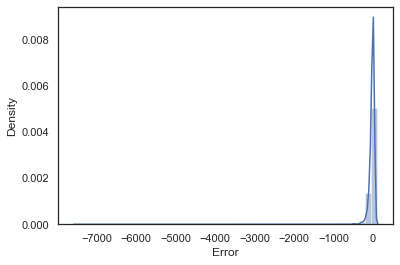

In [101]:
def percCal(x,y):
    return (x-y)*100/x

prediction_error['Error'] = percCal(prediction_error['RealRoomDuration'], prediction_error['CUFPlannedDuration'])
sns.distplot(prediction_error['Error'])

(-400.0, 400.0)

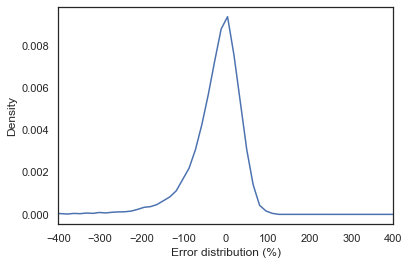

In [103]:
prediction_error['Error'].plot(kind='density')
plt.xlabel('Error distribution (%)')
plt.xlim([-400, 400])

#### Mean of error

In [366]:
Mean_error=prediction_error['Error'].mean()
Mean_error

#overestimation


-26.710767935531276

#### Mean of error per service

In [367]:
surgeries=pd.DataFrame(prediction_error.groupby("Speciality").count()['RealRoomDuration']) 
surgeries = surgeries.rename(columns = {'RealRoomDuration': 'Surgeries'}) #count number of surgeries


In [368]:
Predictions_error=pd.concat([prediction_error.groupby("Speciality").mean().abs(), surgeries], axis=1)
Predictions_error.sort_values(by='Error',ascending=False)

RealRoomDuration  \
Speciality                                                   
MEDICINA INTERNA                                 62.481203   
CIRURGIA PEDIÁTRICA                              58.199068   
NEUROLOGIA                                       21.000000   
PNEUMOLOGIA                                      95.434783   
RADIOTERAPIA                                     57.500000   
UROLOGIA                                         68.666964   
OFTALMOLOGIA                                     35.198088   
GASTROENTEROLOGIA                                69.519084   
CIRURGIA MAXILO-FACIAL                          129.504744   
CIR. PLÁSTICA E RECONSTRUTIVA E ESTÉTICA         92.161394   
CARDIOLOGIA                                      67.059441   
ANGIOGRAFIA                                      59.477961   
CIRURGIA TORÁCICA                               131.816434   
GINECOLOGIA OBSTETRÍCIA                          83.025618   
ADMINISTRAÇÃO REQUISIÇÕES                       159.000000   
ANESTESIOLOGIA                                   69.480000   
MEDICINA DENTÁRIA                               142.478261   
CIRURGIA GERAL                                   84.596190   
CIRURGIA VASCULAR                                84.507246   
ORTOPEDIA                                        96.882007   
NEURO-CIRURGIA                                  120.767107   
CIRURGIA CARDÍACA                               262.259781   
OTORRINOLARINGOLOGIA                             83.492174   
HEMATO/ONCOLOGIA                                 56.400000   
IMAGIOLOGIA                                      93.071429   
DERMATOLOGIA                                     25.327068   

                                          CUFPlannedDuration      Error  \
Speciality                                                                
MEDICINA INTERNA                                   75.796992  51.466407   
CIRURGIA PEDIÁTRICA                                71.124534  43.280191   
NEUROLOGIA                                              30.0  42.857143   
PNEUMOLOGIA                                       120.434783  42.139957   
RADIOTERAPIA                                            30.0  42.020202   
UROLOGIA                                           75.572456  40.452113   
OFTALMOLOGIA                                       40.382603   37.29046   
GASTROENTEROLOGIA                                  67.244275  36.756121   
CIRURGIA MAXILO-FACIAL                            141.150538  36.054369   
CIR. PLÁSTICA E RECONSTRUTIVA E ESTÉTICA           97.435683  33.760477   
CARDIOLOGIA                                        71.451049  32.589863   
ANGIOGRAFIA                                        57.355921  31.696857   
CIRURGIA TORÁCICA                                 138.674825  26.680962   
GINECOLOGIA OBSTETRÍCIA                            87.156718  25.174248   
ADMINISTRAÇÃO REQUISIÇÕES                              150.0   23.44086   
ANESTESIOLOGIA                                          69.6  23.170734   
MEDICINA DENTÁRIA                                 146.086957  23.051903   
CIRURGIA GERAL                                     88.902275  22.175092   
CIRURGIA VASCULAR                                  90.217391  22.027543   
ORTOPEDIA                                          98.997082   21.25881   
NEURO-CIRURGIA                                     124.28139  20.592421   
CIRURGIA CARDÍACA                                 275.516432  20.149457   
OTORRINOLARINGOLOGIA                                87.94399  19.441981   
HEMATO/ONCOLOGIA                                        66.0  13.099632   
IMAGIOLOGIA                                        85.714286   8.022989   
DERMATOLOGIA                                       24.242481   0.830057   

                                          Surgeries  
Speciality                                           
MEDICINA INTERNA                                133  
CIRURGIA PEDIÁTRICA                       

* #### “Within” - cases were categorized when the actual case-time duration fell within prediction ± 10% tolerance threshold

* Underutilization

In [369]:
prediction_error[prediction_error['Error']<-10].shape[0]/prediction_error.shape[0]

0.5197651388188967

* Overutilization

In [370]:
prediction_error[prediction_error['Error']>10].shape[0]/prediction_error.shape[0]

0.2872713209183494

* Within 

In [371]:
prediction_error[prediction_error['Error'].abs()<=10].shape[0]/prediction_error.shape[0]

0.19296354026275386

###  Daily Distribution of error

In [372]:
error=df_cuf.copy()
error=error[["RealRoomDuration", "CUFPlannedDuration","Speciality",'part_of_day']]
error=error.dropna()

In [373]:
error['Error'] = percCal(error['RealRoomDuration'], error['CUFPlannedDuration'])

In [374]:
def function(x):
    if (x > 10) :
        return 'Overutilization'
    elif (x < -10) :
        return 'Underutilization'
    elif (x >= -10) and (x <= 10):
        return'Within'

In [375]:
error['Type_of_use']=error['Error'].apply(function)


In [376]:

df_within=error[error.Type_of_use=='Within']
df_under=error[error.Type_of_use=='Underutilization']
df_over=error[error.Type_of_use=='Overutilization']

df_distribution_of_error = pd.DataFrame({'Within': df_within['part_of_day'].value_counts(),
                                 'Overutilization': df_over['part_of_day'].value_counts(),
                                        'Underutilization': df_under['part_of_day'].value_counts()})

In [377]:
df_distribution_of_error

Within  Overutilization  Underutilization
Early Morning(5-8)      75              174               140
Morning(9-12)        10536            15881             26929
Noon(13-16)           9301            13568             25535
Eve(17-20)            9617            13658             25366
Night(21-24)          3355             5673             10564
Late Night(1-4)         46               70               166

Text(0, 0.5, 'Number of surgeries')

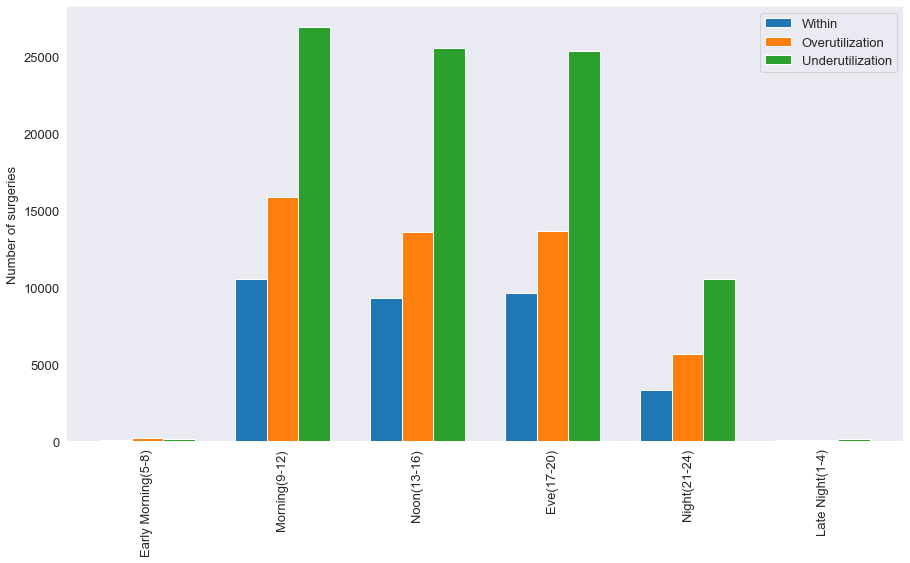

In [378]:
df_distribution_of_error.plot(kind='bar',figsize=(15, 8),width=0.7)
plt.ylabel('Number of surgeries')

Text(0, 0.5, 'Percentage of each surgery (%)')

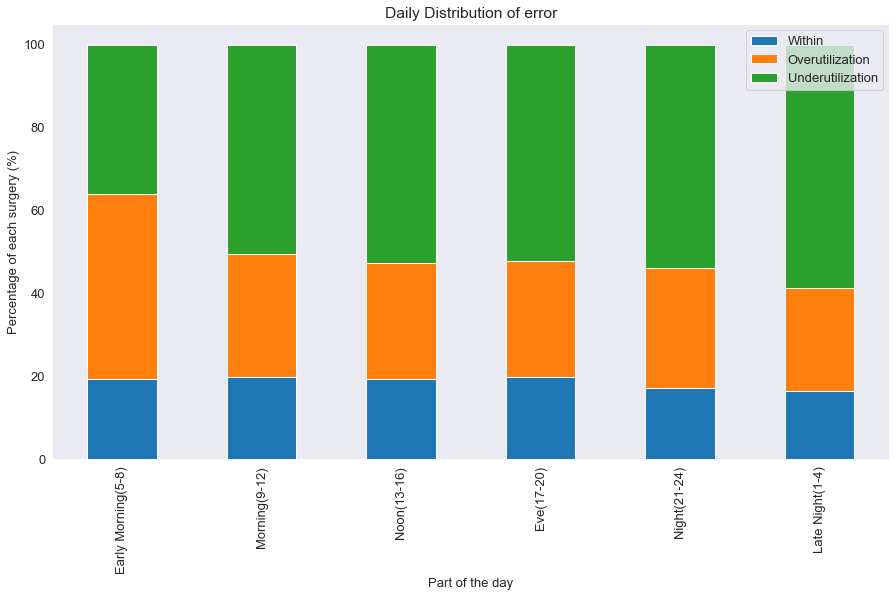

In [379]:
sns.set_style("dark")
stacked_data = df_distribution_of_error.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="bar", stacked=True,figsize=(15, 8))
plt.title("Daily Distribution of error")
plt.xlabel("Part of the day")
plt.ylabel("Percentage of each surgery (%)")

------

# 18. Visualise Data Distribution<a class="anchor" id="18"></a> 

### Preparation of data

In [380]:
prediction_error=df_cuf.copy()
prediction_error=prediction_error[["Date_Surgery","RealRoomDuration", "CUFPlannedDuration","Speciality"]]
prediction_error['Error'] = percCal(prediction_error['RealRoomDuration'], prediction_error['CUFPlannedDuration'])

prediction_error['Error']=prediction_error['Error']
prediction_error=prediction_error.dropna()
prediction_error['Error']=prediction_error['Error'].astype(np.float64)

In [381]:
prediction_error['Month'] = prediction_error['Date_Surgery'].dt.month_name()

prediction_error['Year'] = prediction_error['Date_Surgery'].dt.year
prediction_error['Year'] = prediction_error['Year'].astype(str)

In [382]:
month = CategoricalDtype(
    ['January', 'February', 'March', 'April', 'May', 'June',
     'July', 'August', 'September', 'October', 'November', 'December']
)

prediction_error['Month'] = prediction_error['Month'].astype(month)

In [383]:
year = CategoricalDtype(
    ['2017', '2018', '2019', '2020']
)

prediction_error['Year'] = prediction_error['Year'].astype(year)

* ### 18.1. Distribution of the error with month <a class="anchor" id="18.1"></a> 


<Figure size 432x288 with 0 Axes>

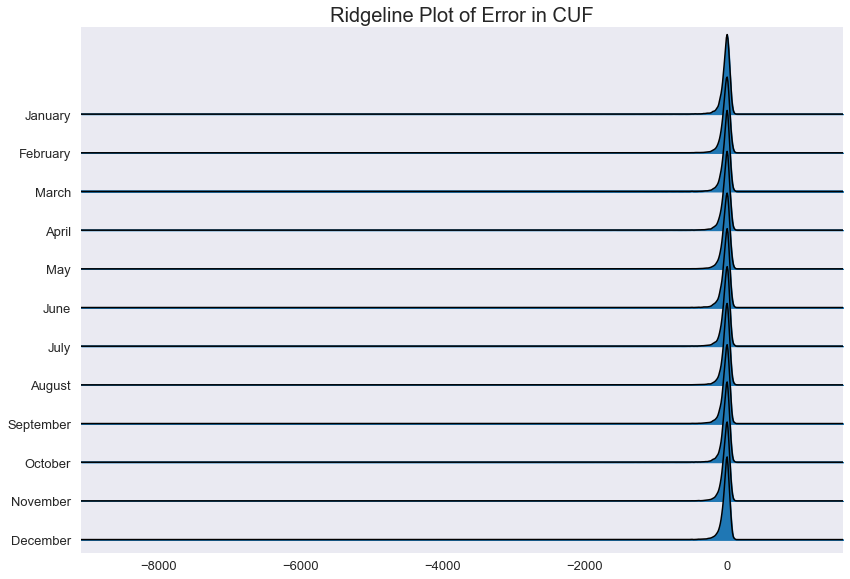

In [384]:
plt.figure()

joyplot(data=prediction_error[['Error', 'Month']], by='Month',figsize=(12, 8))

plt.title('Ridgeline Plot of Error in CUF', fontsize=20)
plt.show()

* ### 18.2. Distribution of the error with Service <a class="anchor" id="18.2"></a> 


<Figure size 432x288 with 0 Axes>

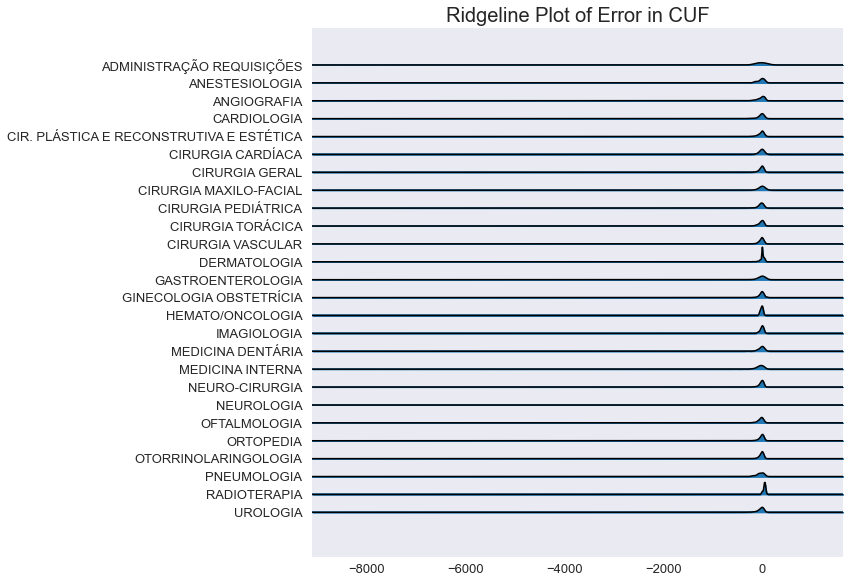

In [385]:
plt.figure()

joyplot(data=prediction_error[['Error', 'Speciality']], by='Speciality',figsize=(12, 8))

plt.title('Ridgeline Plot of Error in CUF', fontsize=20)
plt.show()


* ### 18.3. Distribution of the error with year <a class="anchor" id="18.3"></a> 


<Figure size 432x288 with 0 Axes>

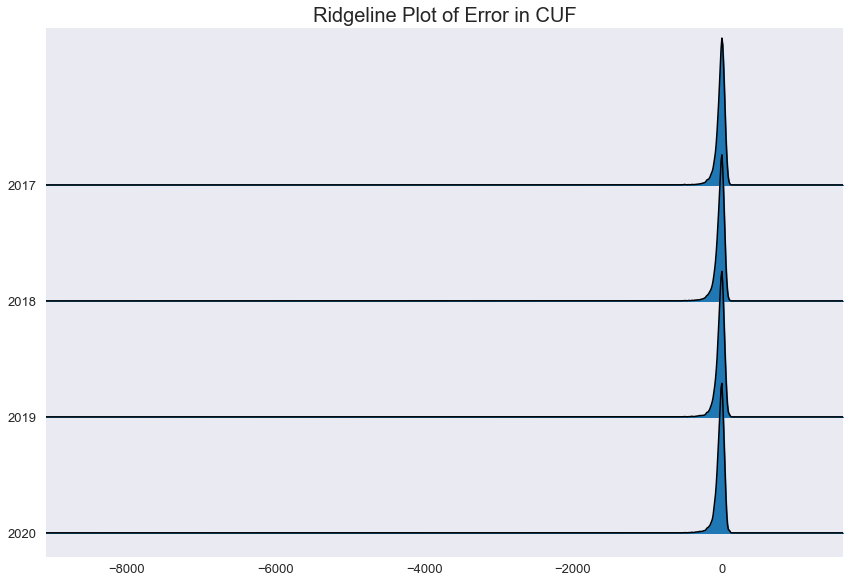

In [386]:
plt.figure()

joyplot(data=prediction_error[['Error', 'Year']], by='Year',figsize=(12, 8))

plt.title('Ridgeline Plot of Error in CUF', fontsize=20)
plt.show()

* ### 18.4. Distribution of the OR usage with month and year in a specific service (ORTOPEDIA) <a class="anchor" id="18.4"></a> 

In [387]:
ortopedia=df_cuf.copy()
ortopedia=ortopedia[["Date_Surgery","RealRoomDuration", "CUFPlannedDuration","Speciality"]]
ortopedia=ortopedia[ortopedia.Speciality=='ORTOPEDIA']

ortopedia['Error'] = percCal(ortopedia['RealRoomDuration'], ortopedia['CUFPlannedDuration'])
ortopedia['Error']=ortopedia['Error']

ortopedia['Error']=ortopedia['Error'].astype(np.float64) #it is mandaatory use float
ortopedia['RealRoomDuration']=ortopedia['RealRoomDuration'].astype(np.float64)

ortopedia=ortopedia.dropna()

In [388]:
ortopedia['Month'] = ortopedia['Date_Surgery'].dt.month_name()

ortopedia['Year'] = ortopedia['Date_Surgery'].dt.year
ortopedia['Year'] = ortopedia['Year'].astype(str)

In [389]:
month = CategoricalDtype(
    ['January', 'February', 'March', 'April', 'May', 'June',
     'July', 'August', 'September', 'October', 'November', 'December']
)

ortopedia['Month'] = ortopedia['Month'].astype(month)

In [390]:
year = CategoricalDtype(
    ['2017', '2018', '2019', '2020']
)

ortopedia['Year'] = ortopedia['Year'].astype(year)

<Figure size 432x288 with 0 Axes>

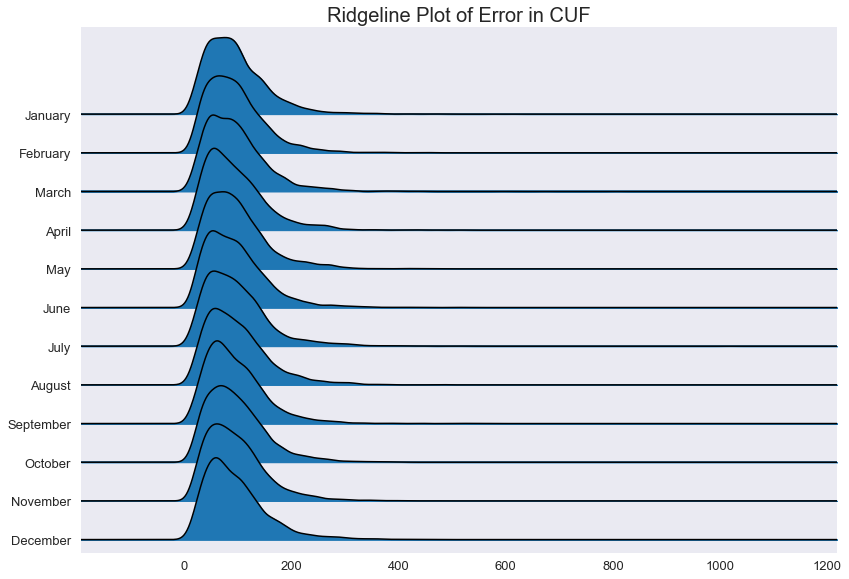

In [391]:
plt.figure()

joyplot(data=ortopedia[['RealRoomDuration', 'Month']], by='Month',figsize=(12, 8))

plt.title('Ridgeline Plot of Error in CUF', fontsize=20)
plt.show()

<Figure size 432x288 with 0 Axes>

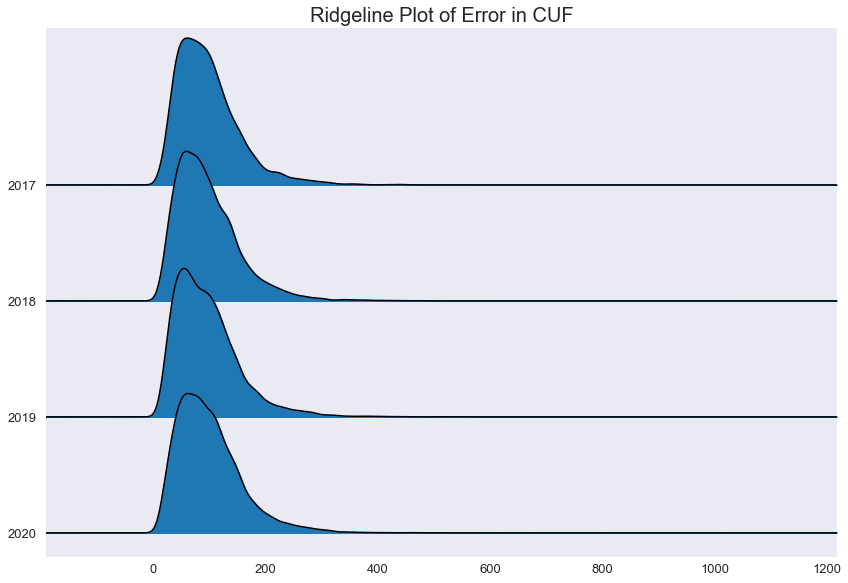

In [392]:
plt.figure()

joyplot(data=ortopedia[['RealRoomDuration', 'Year']], by='Year',figsize=(12, 8))

plt.title('Ridgeline Plot of Error in CUF', fontsize=20)
plt.show()


------